In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(9323, 20)

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

32

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['Cartoons',
 'Theater',
 'Biography',
 'Horror',
 'Detective',
 'Anime',
 'Adventure',
 'Family',
 'Crime',
 'Documentary',
 'Comedy',
 'Humor',
 'Melodrama',
 'Fantasy',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'War_movies',
 'History',
 'Drama',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'Sport',
 'Sci-Fi',
 'Music',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Thriller',
 'Show',
 'Travel',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'ArtHouse',
 'Shorts',
 'ForKids',
 'Action']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

In [20]:
prep_df = df.copy(deep=True)

In [21]:
prep_df.shape

(9323, 20)

In [22]:
prep_df.head(1).T

,0
availability,[SUBSCRIPTION]
actor,"[cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c..."
age_access_type,18
country,[usa]
average_rating,6.99
duration,3780000
type,MOVIE
name,Прожарка Чарли Шина
release_year,2011
genre,"[Comedy, Documentary]"


### ohe

In [23]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
#         df[f'{cat}_{topN[i]}'] = [item[i] for item in df[cat]]
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [24]:
prep_df.dropna(subset=['availability'], inplace=True)

In [25]:
avail, name = add_topN_feature(prep_df, 'availability', len(prep_df['availability']))
prep_df = ohe_topN_features(prep_df, avail, name)

In [26]:
prep_df.drop('FVOD', axis=1, inplace=True)

In [27]:
!pip install gensim

In [28]:
from gensim.models import Word2Vec


class Cat2Vec:
    def __init__(self, n_cat2vec_feature,
                    n_cat2vec_window):
        self.n_cat2vec_feature = n_cat2vec_feature
        self.n_cat2vec_window = n_cat2vec_window
    
    def __create_tokens(self, col_name, values):
        return [f'{col_name} {value}' for value in values]
    
    def __gen_cat2vec_sentences(self, data):
        items = []

        for i, row in data.iterrows():
            item_values = []
            for col, values in zip(row.index, row.values):
                item_values.extend(self.__create_tokens(col, values))
            # shuffle(item_values)
            items.append(item_values)
        return items
    
    def fit(self, cat_features: pd.DataFrame):
        X_w2v = self.__gen_cat2vec_sentences(cat_features)
        self.model = Word2Vec(X_w2v, vector_size=self.n_cat2vec_feature, 
                         window=self.n_cat2vec_window, epochs=5, min_count=2)
        
    def transform(self, cat_features: pd.DataFrame):
        encoded_features = pd.DataFrame()
        for col in cat_features.columns:
            tokens = [self.__create_tokens(col, row) for row in cat_features[col]]
            col_embeds = []
            for row in tokens:
                avg_embeds = np.mean([self.model.wv[token] for token in row if token in self.model.wv.key_to_index], 
                                          axis=0)
                if isinstance(avg_embeds, np.float64):
                    avg_embeds = [np.nan] * self.n_cat2vec_feature
                    
                col_embeds.append(avg_embeds)
            col_embeds = pd.DataFrame(col_embeds, columns=[f'{col}_{i}' for i in range(self.n_cat2vec_feature)])
            encoded_features = pd.concat([encoded_features, col_embeds], axis=1)

        return encoded_features

    
class Preprocesser:
    def __init__(self, 
                 mulpiple_cat_features: list,
                 skewed_num_features: list,
#                  text_features: list,
                 cat_features: list,
                 mltpl_cat_n_top: dict,
                 n_cat2vec_feature: int, 
                 n_cat2vec_window: int):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
#         self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
        self.cat_features = cat_features
        
        self.cat2vec = Cat2Vec(n_cat2vec_feature, n_cat2vec_window)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        features = self.cat2vec.transform(df_pr[self.mulpiple_cat_features])
        df_pr[features.columns] = features
        df_pr.drop(self.mulpiple_cat_features, axis=1, inplace=True)
        
        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[[f'{col}_{i}' for i in range(768)]] = self.embed_model.encode(df_pr[col].values)
            df_pr.drop(col, axis=1, inplace=True)
        return df_pr
    
    def __get_unique_values(self, feature):
        unique_values = []
        print('feature: ', feature)
        for element in feature.dropna():
            unique_values.extend(element)
        return set(unique_values)
    
    def __preprocess_cat_features(self, df_pr):
        for col in self.cat_features:
            unique_values = self.__get_unique_values(df_pr[col])
            cats_df = pd.DataFrame(np.full((len(df_pr), len(unique_values)),
                                            0),
                                   columns=list(unique_values))
            
            for i, element in enumerate(df_pr[col]):
                if isinstance(element, float):
                    cats_df.loc[i, :] = 'Na'
                    continue
                for value in element:
                    cats_df.loc[i, value] = '1'
            df_pr.drop(col, axis=1, inplace=True)
        df_pr[cats_df.columns] = cats_df
        return df_pr  
            
    def fit(self, 
            df: pd.DataFrame):
        self.cat2vec.fit(df[self.mulpiple_cat_features])
        
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
#         df_pr = self.__preprocess_cat_features(df_pr)
        
        return df_pr
        
        
class TargetTransformer:
    def __init__(self, denominator=1):
        self.scale = denominator
        
    def inverse_transform(self, feature):
        return feature.apply(lambda x: np.expm1(x))
    
    def transform(self, feature):
        return feature.apply(lambda x: np.log1p(x))

In [29]:
# types for preprocessing
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
# cat_features = ['availability']
cat_features = ['age_access_type', 'type', 'release_year',
                'subscription_only']
num_features = ['duration']
skewed_num_features = ['duration']
text_features = ['name']
mltpl_cat_n_top = {'actor': 5, 'country': 3, 'genre': 3, 'director': 1}

cat_cols = ['actor', 'genre', 'director']
n_cat2vec_feature  = len(cat_cols) * 2  # define the cat2vecs dimentions
n_cat2vec_window   = len(cat_cols) * 2

In [30]:
df_modern = prep_df[prep_df['release_year'] >= 2000]
# df_short = df_modern[df_modern['target'] < 0.02]
df_modern.reset_index(drop=True, inplace=True)

In [31]:
df_modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   actor               7719 non-null   object        
 1   age_access_type     7719 non-null   object        
 2   country             7719 non-null   object        
 3   average_rating      7259 non-null   object        
 4   duration            7719 non-null   object        
 5   type                7719 non-null   object        
 6   name                7719 non-null   object        
 7   release_year        7719 non-null   object        
 8   genre               7719 non-null   object        
 9   director            7719 non-null   object        
 10  element_uid         7719 non-null   object        
 11  subscription_only   7719 non-null   object        
 12  av_rate_x           7719 non-null   float64       
 13  av_rate_y           7719 non-null   float64     

In [32]:
prep_df['age_access_type'] = prep_df['age_access_type'].astype(str)
prep_df['type'] = prep_df['type'].astype(str)
prep_df['subscription_only'] = prep_df['subscription_only'].astype(int)

In [33]:
preprocesser = Preprocesser(mltpl_cat_features,
                            skewed_num_features,
#                             text_features,
                            cat_features,
                            mltpl_cat_n_top,
                            n_cat2vec_feature, 
                            n_cat2vec_window)

preprocesser.fit(df_modern)
df_pr = preprocesser.preprocess(df_modern)

In [34]:
df_pr.head().T

,0,1,2,3,4
age_access_type,18,18,0,6,16
average_rating,6.99,6.0,6.21,6.4,NaN
duration,15.145235,15.145235,15.396549,15.523889,15.479437
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
name,Прожарка Чарли Шина,Прожарка Уильяма Шэтнера,Большое путешествие,Пламенное сердце,Роман с кукушкой
release_year,2011,2006,2006,2022,2021
element_uid,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17,cdfa700f-122d-41e5-b8dc-9c6813bab6d2,d8b55146-dee5-4498-957c-5614414b48fb,ba6bec1a-3aa9-48c7-aa65-908c21627a12,a367ca50-ef7d-4a4c-b89a-c8692defa697
subscription_only,True,True,True,True,False
av_rate_x,0.004276,0.0,-0.043478,0.018286,0.010101
av_rate_y,0.003705,-0.004808,-0.041667,0.01722,0.006173


In [35]:
df_pr.isna().sum()

age_access_type          0
average_rating         460
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
SUBSCRIPTION             0
DTO                      0
RENT                     0
AVOD                     0
actor_0                604
actor_1                604
actor_2                604
actor_3                604
actor_4                604
actor_5                604
country_0                1
country_1                1
country_2                1
country_3                1
country_4                1
country_5                1
genre_0                  0
genre_1                  0
genre_2                  0
genre_3                  0
genre_4                  0
genre_5                  0
d

In [36]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'country_0', 'country_1', 'country_2', 'country_3', 'country_4',
       'country_5', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'genre_5', 'director_0', 'director_1', 'director_2', 'director_3',
       'director_4', 'director_5'],
      dtype='object')

In [37]:
cf = ['actor_0', 'actor_1', 'actor_2',
       'actor_3', 'actor_4', 'actor_5', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'country_5', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'genre_5', 'director_0', 'director_1',
       'director_2', 'director_3', 'director_4', 'director_5']

df_pr[cf] = df_pr[cf].replace(np.nan, 'Na')

In [38]:
df_pr['average_rating'] = df_pr['average_rating'].astype(float)

### choose features

In [39]:
df_pr.head(1).T

,0
age_access_type,18
average_rating,6.99
duration,15.145235
type,MOVIE
name,Прожарка Чарли Шина
release_year,2011
element_uid,3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only,True
av_rate_x,0.004276
av_rate_y,0.003705


In [40]:
df_pr.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'country_0', 'country_1', 'country_2', 'country_3', 'country_4',
       'country_5', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'genre_5', 'director_0', 'director_1', 'director_2', 'director_3',
       'director_4', 'director_5'],
      dtype='object')

In [41]:
data = df_pr[['age_access_type', 'average_rating', 'duration', 'type',
              'subscription_only', 'SUBSCRIPTION', 'DTO', 'RENT', 'AVOD',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'country_0', 'country_1', 'country_2', 'country_3', 'country_4',
       'country_5', 'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4',
       'genre_5', 'director_0', 'director_1', 'director_2', 'director_3']]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_access_type    7719 non-null   object 
 1   average_rating     7259 non-null   float64
 2   duration           7719 non-null   float64
 3   type               7719 non-null   object 
 4   subscription_only  7719 non-null   object 
 5   SUBSCRIPTION       7719 non-null   int64  
 6   DTO                7719 non-null   int64  
 7   RENT               7719 non-null   int64  
 8   AVOD               7719 non-null   int64  
 9   actor_0            7719 non-null   object 
 10  actor_1            7719 non-null   object 
 11  actor_2            7719 non-null   object 
 12  actor_3            7719 non-null   object 
 13  actor_4            7719 non-null   object 
 14  actor_5            7719 non-null   object 
 15  country_0          7719 non-null   object 
 16  country_1          7719 

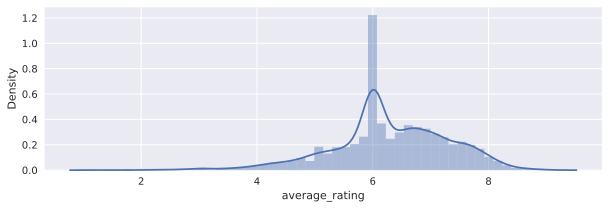

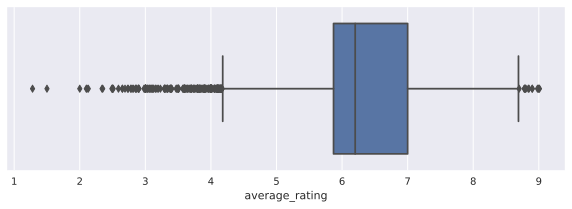

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize=(10, 3))
sns.distplot(df_pr['average_rating'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(df_pr['average_rating'], orient='h')
plt.show()

## Split

In [44]:
data.dropna(subset=['average_rating'], inplace=True)

In [45]:
data.shape

(7259, 31)

In [46]:
X, y = data.drop('average_rating', axis=1), data['average_rating']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [50]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((5879, 30), (654, 30), (726, 30), (5879,), (654,), (726,))

### Model

In [51]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [52]:
X_train.head(1)

,age_access_type,duration,type,subscription_only,SUBSCRIPTION,DTO,RENT,AVOD,actor_0,actor_1,...,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,director_0,director_1,director_2,director_3
5558,6,15.371548,MOVIE,False,1,1,1,0,0.057922,0.112395,...,-1.251429,2.392504,5.340089,-3.18624,-0.193091,4.644387,0.024078,0.121224,0.349293,-0.263975


In [53]:
cat_features = ['age_access_type',
                'type']

In [54]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, 
                       y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.067248
0:	learn: 0.7691453	test: 0.7551607	best: 0.7551607 (0)	total: 56.5ms	remaining: 56.4s
100:	learn: 0.5761498	test: 0.6143369	best: 0.6143369 (100)	total: 408ms	remaining: 3.63s
200:	learn: 0.5382569	test: 0.6028481	best: 0.6027870 (199)	total: 741ms	remaining: 2.95s
300:	learn: 0.5076729	test: 0.5986779	best: 0.5986779 (300)	total: 1.09s	remaining: 2.52s
400:	learn: 0.4813550	test: 0.5971415	best: 0.5969239 (395)	total: 1.43s	remaining: 2.14s
500:	learn: 0.4596224	test: 0.5967868	best: 0.5967305 (499)	total: 1.77s	remaining: 1.77s
600:	learn: 0.4375556	test: 0.5979898	best: 0.5967305 (499)	total: 2.12s	remaining: 1.4s
700:	learn: 0.4185562	test: 0.5979336	best: 0.5967305 (499)	total: 2.46s	remaining: 1.05s
800:	learn: 0.4013622	test: 0.5995117	best: 0.5967305 (499)	total: 2.8s	remaining: 697ms
900:	learn: 0.3839694	test: 0.6005773	best: 0.5967305 (499)	total: 3.15s	remaining: 346ms
999:	learn: 0.3680868	test: 0.6013615	best: 0.5967305 (499)	total: 3.5s	rem

In [55]:
y_pred = cat_model.predict(test_dataset)

In [56]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [57]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.5749175962602124
RMSE:  0.7582332070413511
R2:    0.40558452695559777
MAE:   0.5777991409905985
MedAE: 0.4783427520757133
------------------------------


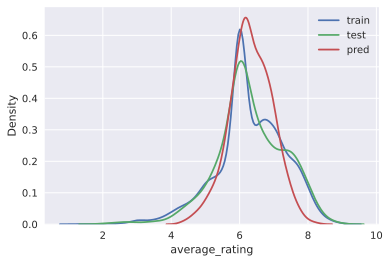

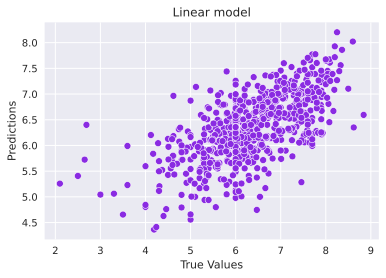

In [58]:
target_distr_linear(y_train, y_test, y_pred)   

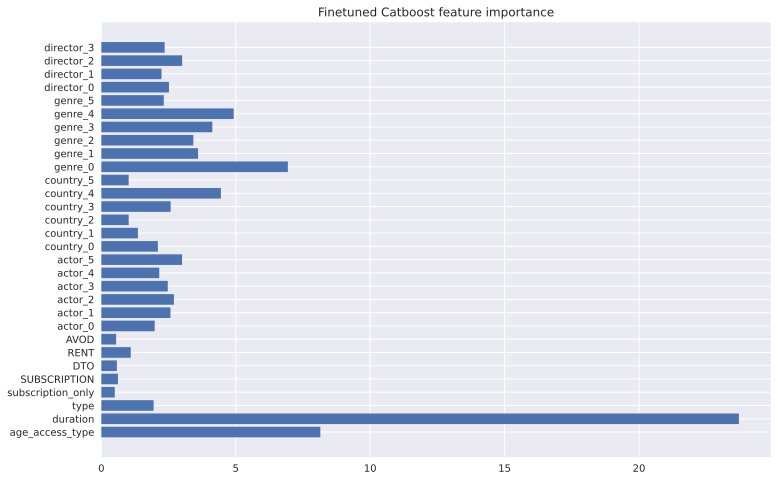

In [59]:
get_feature_imp(cat_model, train_dataset)

In [60]:
cat_model.save_model('cat_reg_kinop_ratings_cat2vec')

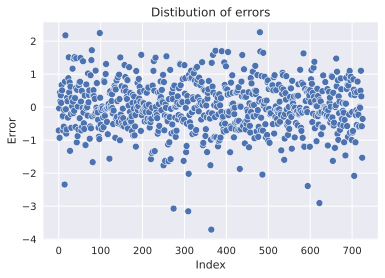

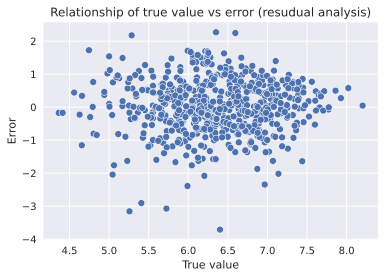

In [61]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Tuning

In [62]:
train_dataset = cat.Pool(X_train, 
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, 
                        y_test,
                        cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [63]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_kinop', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.7720474	total: 3.24ms	remaining: 3.23s
1:	learn: 0.7668420	total: 5.6ms	remaining: 2.79s
2:	learn: 0.7617398	total: 7.75ms	remaining: 2.58s
3:	learn: 0.7570010	total: 10.3ms	remaining: 2.56s
4:	learn: 0.7520080	total: 12.6ms	remaining: 2.5s
5:	learn: 0.7473296	total: 15ms	remaining: 2.48s
6:	learn: 0.7428246	total: 17.3ms	remaining: 2.45s
7:	learn: 0.7386410	total: 19.4ms	remaining: 2.4s
8:	learn: 0.7346627	total: 21.6ms	remaining: 2.38s
9:	learn: 0.7305958	total: 23.8ms	remaining: 2.36s
10:	learn: 0.7265707	total: 26.4ms	remaining: 2.37s
11:	learn: 0.7225733	total: 28.9ms	remaining: 2.38s
12:	learn: 0.7187638	total: 31.5ms	remaining: 2.39s
13:	learn: 0.7146424	total: 34ms	remaining: 2.4s
14:	learn: 0.7106815	total: 36.6ms	remaining: 2.41s
15:	learn: 0.7079494	total: 38.7ms	remaining: 2.38s
16:	learn: 0.7049143	total: 40.8ms	remaining: 2.36s
17:	learn: 0.7023986	total: 43.2ms	remaining: 2.36s
18:	learn: 0.6994025	

172:	learn: 0.6066071	total: 372ms	remaining: 1.78s
173:	learn: 0.6064828	total: 374ms	remaining: 1.78s
174:	learn: 0.6063438	total: 377ms	remaining: 1.77s
175:	learn: 0.6061041	total: 379ms	remaining: 1.77s
176:	learn: 0.6059517	total: 381ms	remaining: 1.77s
177:	learn: 0.6057815	total: 383ms	remaining: 1.77s
178:	learn: 0.6055435	total: 385ms	remaining: 1.77s
179:	learn: 0.6053729	total: 387ms	remaining: 1.76s
180:	learn: 0.6051634	total: 389ms	remaining: 1.76s
181:	learn: 0.6049246	total: 391ms	remaining: 1.76s
182:	learn: 0.6047771	total: 394ms	remaining: 1.76s
183:	learn: 0.6045593	total: 396ms	remaining: 1.75s
184:	learn: 0.6042537	total: 398ms	remaining: 1.75s
185:	learn: 0.6040127	total: 401ms	remaining: 1.75s
186:	learn: 0.6036839	total: 403ms	remaining: 1.75s
187:	learn: 0.6035917	total: 405ms	remaining: 1.75s
188:	learn: 0.6033797	total: 407ms	remaining: 1.75s
189:	learn: 0.6032162	total: 409ms	remaining: 1.74s
190:	learn: 0.6029469	total: 411ms	remaining: 1.74s
191:	learn: 

373:	learn: 0.5743261	total: 771ms	remaining: 1.29s
374:	learn: 0.5741930	total: 773ms	remaining: 1.29s
375:	learn: 0.5740214	total: 775ms	remaining: 1.29s
376:	learn: 0.5738240	total: 778ms	remaining: 1.28s
377:	learn: 0.5738157	total: 779ms	remaining: 1.28s
378:	learn: 0.5735430	total: 782ms	remaining: 1.28s
379:	learn: 0.5734516	total: 784ms	remaining: 1.28s
380:	learn: 0.5733051	total: 785ms	remaining: 1.27s
381:	learn: 0.5732091	total: 787ms	remaining: 1.27s
382:	learn: 0.5730492	total: 789ms	remaining: 1.27s
383:	learn: 0.5729550	total: 792ms	remaining: 1.27s
384:	learn: 0.5727542	total: 794ms	remaining: 1.27s
385:	learn: 0.5727273	total: 796ms	remaining: 1.26s
386:	learn: 0.5727170	total: 798ms	remaining: 1.26s
387:	learn: 0.5726670	total: 800ms	remaining: 1.26s
388:	learn: 0.5726525	total: 801ms	remaining: 1.26s
389:	learn: 0.5724986	total: 803ms	remaining: 1.26s
390:	learn: 0.5723936	total: 806ms	remaining: 1.25s
391:	learn: 0.5723865	total: 807ms	remaining: 1.25s
392:	learn: 

575:	learn: 0.5539262	total: 1.17s	remaining: 859ms
576:	learn: 0.5538343	total: 1.17s	remaining: 857ms
577:	learn: 0.5537126	total: 1.17s	remaining: 855ms
578:	learn: 0.5535871	total: 1.17s	remaining: 853ms
579:	learn: 0.5535105	total: 1.18s	remaining: 851ms
580:	learn: 0.5533351	total: 1.18s	remaining: 849ms
581:	learn: 0.5532657	total: 1.18s	remaining: 848ms
582:	learn: 0.5532509	total: 1.18s	remaining: 846ms
583:	learn: 0.5530954	total: 1.18s	remaining: 844ms
584:	learn: 0.5530284	total: 1.19s	remaining: 842ms
585:	learn: 0.5529392	total: 1.19s	remaining: 840ms
586:	learn: 0.5528494	total: 1.19s	remaining: 838ms
587:	learn: 0.5528408	total: 1.19s	remaining: 836ms
588:	learn: 0.5526825	total: 1.19s	remaining: 834ms
589:	learn: 0.5524350	total: 1.2s	remaining: 832ms
590:	learn: 0.5523333	total: 1.2s	remaining: 830ms
591:	learn: 0.5522190	total: 1.2s	remaining: 828ms
592:	learn: 0.5520426	total: 1.2s	remaining: 826ms
593:	learn: 0.5519136	total: 1.21s	remaining: 824ms
594:	learn: 0.55

768:	learn: 0.5356322	total: 1.56s	remaining: 470ms
769:	learn: 0.5355146	total: 1.57s	remaining: 468ms
770:	learn: 0.5354871	total: 1.57s	remaining: 466ms
771:	learn: 0.5353527	total: 1.57s	remaining: 464ms
772:	learn: 0.5352889	total: 1.57s	remaining: 462ms
773:	learn: 0.5351932	total: 1.57s	remaining: 460ms
774:	learn: 0.5351272	total: 1.57s	remaining: 458ms
775:	learn: 0.5350197	total: 1.58s	remaining: 456ms
776:	learn: 0.5349527	total: 1.58s	remaining: 454ms
777:	learn: 0.5348392	total: 1.58s	remaining: 452ms
778:	learn: 0.5347863	total: 1.58s	remaining: 449ms
779:	learn: 0.5346099	total: 1.59s	remaining: 447ms
780:	learn: 0.5345507	total: 1.59s	remaining: 445ms
781:	learn: 0.5344812	total: 1.59s	remaining: 443ms
782:	learn: 0.5343391	total: 1.59s	remaining: 441ms
783:	learn: 0.5341499	total: 1.59s	remaining: 439ms
784:	learn: 0.5340784	total: 1.6s	remaining: 437ms
785:	learn: 0.5340586	total: 1.6s	remaining: 435ms
786:	learn: 0.5340321	total: 1.6s	remaining: 433ms
787:	learn: 0.5

960:	learn: 0.5188761	total: 1.96s	remaining: 79.6ms
961:	learn: 0.5188427	total: 1.96s	remaining: 77.6ms
962:	learn: 0.5187404	total: 1.97s	remaining: 75.5ms
963:	learn: 0.5186753	total: 1.97s	remaining: 73.5ms
964:	learn: 0.5186525	total: 1.97s	remaining: 71.5ms
965:	learn: 0.5185619	total: 1.97s	remaining: 69.4ms
966:	learn: 0.5184490	total: 1.97s	remaining: 67.4ms
967:	learn: 0.5183976	total: 1.98s	remaining: 65.3ms
968:	learn: 0.5183422	total: 1.98s	remaining: 63.3ms
969:	learn: 0.5183238	total: 1.98s	remaining: 61.2ms
970:	learn: 0.5183144	total: 1.98s	remaining: 59.2ms
971:	learn: 0.5182385	total: 1.98s	remaining: 57.1ms
972:	learn: 0.5181703	total: 1.99s	remaining: 55.1ms
973:	learn: 0.5180082	total: 1.99s	remaining: 53.1ms
974:	learn: 0.5178981	total: 1.99s	remaining: 51ms
975:	learn: 0.5178163	total: 1.99s	remaining: 49ms
976:	learn: 0.5177298	total: 1.99s	remaining: 46.9ms
977:	learn: 0.5176322	total: 2s	remaining: 44.9ms
978:	learn: 0.5175537	total: 2s	remaining: 42.9ms
979

127:	learn: 0.6231832	total: 276ms	remaining: 1.88s
128:	learn: 0.6230106	total: 278ms	remaining: 1.88s
129:	learn: 0.6228125	total: 280ms	remaining: 1.88s
130:	learn: 0.6225676	total: 282ms	remaining: 1.87s
131:	learn: 0.6224488	total: 284ms	remaining: 1.87s
132:	learn: 0.6221997	total: 287ms	remaining: 1.87s
133:	learn: 0.6219912	total: 288ms	remaining: 1.86s
134:	learn: 0.6216815	total: 290ms	remaining: 1.86s
135:	learn: 0.6214261	total: 293ms	remaining: 1.86s
136:	learn: 0.6210572	total: 295ms	remaining: 1.85s
137:	learn: 0.6209480	total: 297ms	remaining: 1.85s
138:	learn: 0.6207930	total: 299ms	remaining: 1.85s
139:	learn: 0.6206145	total: 302ms	remaining: 1.85s
140:	learn: 0.6203073	total: 304ms	remaining: 1.85s
141:	learn: 0.6200763	total: 307ms	remaining: 1.85s
142:	learn: 0.6198631	total: 309ms	remaining: 1.85s
143:	learn: 0.6196642	total: 311ms	remaining: 1.85s
144:	learn: 0.6194810	total: 314ms	remaining: 1.85s
145:	learn: 0.6191248	total: 316ms	remaining: 1.85s
146:	learn: 

312:	learn: 0.5870922	total: 675ms	remaining: 1.48s
313:	learn: 0.5869221	total: 677ms	remaining: 1.48s
314:	learn: 0.5866792	total: 680ms	remaining: 1.48s
315:	learn: 0.5865116	total: 682ms	remaining: 1.48s
316:	learn: 0.5863857	total: 685ms	remaining: 1.48s
317:	learn: 0.5862391	total: 688ms	remaining: 1.48s
318:	learn: 0.5861071	total: 690ms	remaining: 1.47s
319:	learn: 0.5858443	total: 692ms	remaining: 1.47s
320:	learn: 0.5856822	total: 694ms	remaining: 1.47s
321:	learn: 0.5856124	total: 696ms	remaining: 1.47s
322:	learn: 0.5853974	total: 698ms	remaining: 1.46s
323:	learn: 0.5851864	total: 700ms	remaining: 1.46s
324:	learn: 0.5849586	total: 703ms	remaining: 1.46s
325:	learn: 0.5848228	total: 705ms	remaining: 1.46s
326:	learn: 0.5847526	total: 707ms	remaining: 1.45s
327:	learn: 0.5846754	total: 709ms	remaining: 1.45s
328:	learn: 0.5845671	total: 711ms	remaining: 1.45s
329:	learn: 0.5843855	total: 713ms	remaining: 1.45s
330:	learn: 0.5842357	total: 715ms	remaining: 1.44s
331:	learn: 

502:	learn: 0.5630125	total: 1.07s	remaining: 1.06s
503:	learn: 0.5628752	total: 1.07s	remaining: 1.06s
504:	learn: 0.5628008	total: 1.08s	remaining: 1.05s
505:	learn: 0.5626762	total: 1.08s	remaining: 1.05s
506:	learn: 0.5626373	total: 1.08s	remaining: 1.05s
507:	learn: 0.5625624	total: 1.08s	remaining: 1.05s
508:	learn: 0.5625245	total: 1.08s	remaining: 1.04s
509:	learn: 0.5624359	total: 1.08s	remaining: 1.04s
510:	learn: 0.5623315	total: 1.09s	remaining: 1.04s
511:	learn: 0.5621995	total: 1.09s	remaining: 1.04s
512:	learn: 0.5621640	total: 1.09s	remaining: 1.03s
513:	learn: 0.5620461	total: 1.09s	remaining: 1.03s
514:	learn: 0.5619412	total: 1.09s	remaining: 1.03s
515:	learn: 0.5618204	total: 1.1s	remaining: 1.03s
516:	learn: 0.5617746	total: 1.1s	remaining: 1.03s
517:	learn: 0.5616336	total: 1.1s	remaining: 1.02s
518:	learn: 0.5614916	total: 1.1s	remaining: 1.02s
519:	learn: 0.5613802	total: 1.1s	remaining: 1.02s
520:	learn: 0.5612933	total: 1.11s	remaining: 1.02s
521:	learn: 0.561

698:	learn: 0.5452470	total: 1.47s	remaining: 632ms
699:	learn: 0.5451620	total: 1.47s	remaining: 630ms
700:	learn: 0.5450636	total: 1.47s	remaining: 628ms
701:	learn: 0.5450265	total: 1.47s	remaining: 626ms
702:	learn: 0.5448809	total: 1.48s	remaining: 624ms
703:	learn: 0.5448803	total: 1.48s	remaining: 621ms
704:	learn: 0.5447780	total: 1.48s	remaining: 619ms
705:	learn: 0.5446599	total: 1.48s	remaining: 617ms
706:	learn: 0.5446358	total: 1.48s	remaining: 615ms
707:	learn: 0.5446006	total: 1.48s	remaining: 612ms
708:	learn: 0.5445528	total: 1.49s	remaining: 610ms
709:	learn: 0.5444347	total: 1.49s	remaining: 608ms
710:	learn: 0.5443836	total: 1.49s	remaining: 606ms
711:	learn: 0.5442804	total: 1.49s	remaining: 604ms
712:	learn: 0.5440932	total: 1.49s	remaining: 602ms
713:	learn: 0.5439580	total: 1.5s	remaining: 599ms
714:	learn: 0.5439429	total: 1.5s	remaining: 597ms
715:	learn: 0.5438239	total: 1.5s	remaining: 595ms
716:	learn: 0.5437153	total: 1.5s	remaining: 593ms
717:	learn: 0.54

893:	learn: 0.5301887	total: 1.86s	remaining: 221ms
894:	learn: 0.5301746	total: 1.86s	remaining: 219ms
895:	learn: 0.5301322	total: 1.87s	remaining: 217ms
896:	learn: 0.5300545	total: 1.87s	remaining: 215ms
897:	learn: 0.5299226	total: 1.87s	remaining: 213ms
898:	learn: 0.5298307	total: 1.87s	remaining: 211ms
899:	learn: 0.5297430	total: 1.88s	remaining: 209ms
900:	learn: 0.5296862	total: 1.88s	remaining: 206ms
901:	learn: 0.5295074	total: 1.88s	remaining: 204ms
902:	learn: 0.5294467	total: 1.88s	remaining: 202ms
903:	learn: 0.5293853	total: 1.88s	remaining: 200ms
904:	learn: 0.5293365	total: 1.89s	remaining: 198ms
905:	learn: 0.5292350	total: 1.89s	remaining: 196ms
906:	learn: 0.5291873	total: 1.89s	remaining: 194ms
907:	learn: 0.5290656	total: 1.89s	remaining: 192ms
908:	learn: 0.5289918	total: 1.89s	remaining: 190ms
909:	learn: 0.5289410	total: 1.9s	remaining: 188ms
910:	learn: 0.5288231	total: 1.9s	remaining: 186ms
911:	learn: 0.5287352	total: 1.9s	remaining: 183ms
912:	learn: 0.5

49:	learn: 0.6608981	total: 107ms	remaining: 2.03s
50:	learn: 0.6600849	total: 109ms	remaining: 2.03s
51:	learn: 0.6589916	total: 111ms	remaining: 2.02s
52:	learn: 0.6581748	total: 113ms	remaining: 2.02s
53:	learn: 0.6572910	total: 115ms	remaining: 2.02s
54:	learn: 0.6565409	total: 117ms	remaining: 2.01s
55:	learn: 0.6555746	total: 119ms	remaining: 2.01s
56:	learn: 0.6548908	total: 122ms	remaining: 2.02s
57:	learn: 0.6540236	total: 124ms	remaining: 2.01s
58:	learn: 0.6535133	total: 126ms	remaining: 2.01s
59:	learn: 0.6527029	total: 128ms	remaining: 2s
60:	learn: 0.6519459	total: 130ms	remaining: 2s
61:	learn: 0.6512356	total: 132ms	remaining: 1.99s
62:	learn: 0.6504131	total: 134ms	remaining: 1.99s
63:	learn: 0.6498048	total: 136ms	remaining: 1.98s
64:	learn: 0.6490311	total: 138ms	remaining: 1.98s
65:	learn: 0.6482345	total: 140ms	remaining: 1.98s
66:	learn: 0.6474064	total: 141ms	remaining: 1.97s
67:	learn: 0.6465609	total: 143ms	remaining: 1.96s
68:	learn: 0.6458887	total: 146ms	rem

244:	learn: 0.5956253	total: 504ms	remaining: 1.55s
245:	learn: 0.5953503	total: 507ms	remaining: 1.55s
246:	learn: 0.5951900	total: 509ms	remaining: 1.55s
247:	learn: 0.5950559	total: 511ms	remaining: 1.55s
248:	learn: 0.5949150	total: 513ms	remaining: 1.55s
249:	learn: 0.5947406	total: 515ms	remaining: 1.54s
250:	learn: 0.5944498	total: 517ms	remaining: 1.54s
251:	learn: 0.5943453	total: 520ms	remaining: 1.54s
252:	learn: 0.5941604	total: 522ms	remaining: 1.54s
253:	learn: 0.5939251	total: 524ms	remaining: 1.54s
254:	learn: 0.5937838	total: 526ms	remaining: 1.54s
255:	learn: 0.5935435	total: 528ms	remaining: 1.53s
256:	learn: 0.5932825	total: 530ms	remaining: 1.53s
257:	learn: 0.5931185	total: 532ms	remaining: 1.53s
258:	learn: 0.5929327	total: 534ms	remaining: 1.53s
259:	learn: 0.5928349	total: 536ms	remaining: 1.52s
260:	learn: 0.5926912	total: 538ms	remaining: 1.52s
261:	learn: 0.5924652	total: 540ms	remaining: 1.52s
262:	learn: 0.5923779	total: 542ms	remaining: 1.52s
263:	learn: 

443:	learn: 0.5653639	total: 902ms	remaining: 1.13s
444:	learn: 0.5651108	total: 904ms	remaining: 1.13s
445:	learn: 0.5649809	total: 907ms	remaining: 1.13s
446:	learn: 0.5648917	total: 908ms	remaining: 1.12s
447:	learn: 0.5647464	total: 911ms	remaining: 1.12s
448:	learn: 0.5645465	total: 913ms	remaining: 1.12s
449:	learn: 0.5644205	total: 915ms	remaining: 1.12s
450:	learn: 0.5642585	total: 917ms	remaining: 1.11s
451:	learn: 0.5641562	total: 918ms	remaining: 1.11s
452:	learn: 0.5640232	total: 920ms	remaining: 1.11s
453:	learn: 0.5639716	total: 922ms	remaining: 1.11s
454:	learn: 0.5638655	total: 925ms	remaining: 1.11s
455:	learn: 0.5637149	total: 927ms	remaining: 1.1s
456:	learn: 0.5636206	total: 929ms	remaining: 1.1s
457:	learn: 0.5634762	total: 931ms	remaining: 1.1s
458:	learn: 0.5633599	total: 933ms	remaining: 1.1s
459:	learn: 0.5632866	total: 935ms	remaining: 1.1s
460:	learn: 0.5631964	total: 937ms	remaining: 1.09s
461:	learn: 0.5630751	total: 939ms	remaining: 1.09s
462:	learn: 0.563

641:	learn: 0.5453165	total: 1.3s	remaining: 725ms
642:	learn: 0.5452608	total: 1.3s	remaining: 723ms
643:	learn: 0.5451538	total: 1.3s	remaining: 721ms
644:	learn: 0.5450725	total: 1.31s	remaining: 719ms
645:	learn: 0.5449900	total: 1.31s	remaining: 717ms
646:	learn: 0.5449520	total: 1.31s	remaining: 714ms
647:	learn: 0.5448071	total: 1.31s	remaining: 712ms
648:	learn: 0.5447096	total: 1.31s	remaining: 710ms
649:	learn: 0.5445873	total: 1.31s	remaining: 708ms
650:	learn: 0.5444731	total: 1.32s	remaining: 706ms
651:	learn: 0.5443971	total: 1.32s	remaining: 704ms
652:	learn: 0.5443110	total: 1.32s	remaining: 702ms
653:	learn: 0.5442615	total: 1.32s	remaining: 701ms
654:	learn: 0.5441186	total: 1.33s	remaining: 699ms
655:	learn: 0.5440013	total: 1.33s	remaining: 697ms
656:	learn: 0.5438794	total: 1.33s	remaining: 695ms
657:	learn: 0.5437734	total: 1.33s	remaining: 693ms
658:	learn: 0.5436592	total: 1.34s	remaining: 691ms
659:	learn: 0.5435627	total: 1.34s	remaining: 690ms
660:	learn: 0.5

826:	learn: 0.5270619	total: 1.7s	remaining: 355ms
827:	learn: 0.5269553	total: 1.7s	remaining: 353ms
828:	learn: 0.5268638	total: 1.7s	remaining: 351ms
829:	learn: 0.5268343	total: 1.7s	remaining: 349ms
830:	learn: 0.5266445	total: 1.71s	remaining: 347ms
831:	learn: 0.5265718	total: 1.71s	remaining: 345ms
832:	learn: 0.5264010	total: 1.71s	remaining: 343ms
833:	learn: 0.5262707	total: 1.71s	remaining: 341ms
834:	learn: 0.5261806	total: 1.71s	remaining: 339ms
835:	learn: 0.5260327	total: 1.72s	remaining: 337ms
836:	learn: 0.5259947	total: 1.72s	remaining: 334ms
837:	learn: 0.5258979	total: 1.72s	remaining: 332ms
838:	learn: 0.5258932	total: 1.72s	remaining: 330ms
839:	learn: 0.5257783	total: 1.72s	remaining: 328ms
840:	learn: 0.5257181	total: 1.73s	remaining: 326ms
841:	learn: 0.5256216	total: 1.73s	remaining: 324ms
842:	learn: 0.5256088	total: 1.73s	remaining: 322ms
843:	learn: 0.5254929	total: 1.73s	remaining: 320ms
844:	learn: 0.5254540	total: 1.73s	remaining: 318ms
845:	learn: 0.52

0:	learn: 0.7714986	total: 5.96ms	remaining: 5.95s
1:	learn: 0.7662231	total: 9.33ms	remaining: 4.66s
2:	learn: 0.7611196	total: 12ms	remaining: 3.97s
3:	learn: 0.7561990	total: 14.4ms	remaining: 3.58s
4:	learn: 0.7505555	total: 17.2ms	remaining: 3.43s
5:	learn: 0.7457528	total: 20.1ms	remaining: 3.33s
6:	learn: 0.7412750	total: 22.2ms	remaining: 3.15s
7:	learn: 0.7365815	total: 25.4ms	remaining: 3.15s
8:	learn: 0.7321185	total: 27.7ms	remaining: 3.05s
9:	learn: 0.7286138	total: 30.2ms	remaining: 2.98s
10:	learn: 0.7244705	total: 32.1ms	remaining: 2.89s
11:	learn: 0.7204482	total: 34.2ms	remaining: 2.82s
12:	learn: 0.7168138	total: 36.3ms	remaining: 2.75s
13:	learn: 0.7131657	total: 38.5ms	remaining: 2.71s
14:	learn: 0.7097039	total: 40.6ms	remaining: 2.67s
15:	learn: 0.7064807	total: 42.8ms	remaining: 2.63s
16:	learn: 0.7035997	total: 44.6ms	remaining: 2.58s
17:	learn: 0.7007570	total: 46.3ms	remaining: 2.52s
18:	learn: 0.6983604	total: 48.5ms	remaining: 2.5s
19:	learn: 0.6957751	tota

187:	learn: 0.6048191	total: 404ms	remaining: 1.74s
188:	learn: 0.6045499	total: 406ms	remaining: 1.74s
189:	learn: 0.6043672	total: 408ms	remaining: 1.74s
190:	learn: 0.6042265	total: 410ms	remaining: 1.74s
191:	learn: 0.6040127	total: 413ms	remaining: 1.74s
192:	learn: 0.6039103	total: 415ms	remaining: 1.73s
193:	learn: 0.6037062	total: 417ms	remaining: 1.73s
194:	learn: 0.6034856	total: 420ms	remaining: 1.73s
195:	learn: 0.6033410	total: 422ms	remaining: 1.73s
196:	learn: 0.6031622	total: 425ms	remaining: 1.73s
197:	learn: 0.6029444	total: 427ms	remaining: 1.73s
198:	learn: 0.6027885	total: 429ms	remaining: 1.73s
199:	learn: 0.6027021	total: 431ms	remaining: 1.72s
200:	learn: 0.6025023	total: 433ms	remaining: 1.72s
201:	learn: 0.6022755	total: 435ms	remaining: 1.72s
202:	learn: 0.6020883	total: 437ms	remaining: 1.72s
203:	learn: 0.6019825	total: 440ms	remaining: 1.72s
204:	learn: 0.6017252	total: 442ms	remaining: 1.71s
205:	learn: 0.6015210	total: 444ms	remaining: 1.71s
206:	learn: 

381:	learn: 0.5736211	total: 799ms	remaining: 1.29s
382:	learn: 0.5734235	total: 801ms	remaining: 1.29s
383:	learn: 0.5732534	total: 804ms	remaining: 1.29s
384:	learn: 0.5732294	total: 806ms	remaining: 1.29s
385:	learn: 0.5730846	total: 808ms	remaining: 1.28s
386:	learn: 0.5729389	total: 810ms	remaining: 1.28s
387:	learn: 0.5728808	total: 812ms	remaining: 1.28s
388:	learn: 0.5727280	total: 814ms	remaining: 1.28s
389:	learn: 0.5727051	total: 815ms	remaining: 1.27s
390:	learn: 0.5724102	total: 818ms	remaining: 1.27s
391:	learn: 0.5722896	total: 819ms	remaining: 1.27s
392:	learn: 0.5720584	total: 821ms	remaining: 1.27s
393:	learn: 0.5719720	total: 823ms	remaining: 1.26s
394:	learn: 0.5717041	total: 825ms	remaining: 1.26s
395:	learn: 0.5715497	total: 827ms	remaining: 1.26s
396:	learn: 0.5713829	total: 829ms	remaining: 1.26s
397:	learn: 0.5711836	total: 831ms	remaining: 1.26s
398:	learn: 0.5710924	total: 833ms	remaining: 1.25s
399:	learn: 0.5709773	total: 835ms	remaining: 1.25s
400:	learn: 

580:	learn: 0.5521256	total: 1.19s	remaining: 862ms
581:	learn: 0.5519418	total: 1.2s	remaining: 860ms
582:	learn: 0.5518560	total: 1.2s	remaining: 858ms
583:	learn: 0.5517607	total: 1.2s	remaining: 855ms
584:	learn: 0.5517407	total: 1.2s	remaining: 853ms
585:	learn: 0.5516720	total: 1.2s	remaining: 851ms
586:	learn: 0.5515274	total: 1.21s	remaining: 849ms
587:	learn: 0.5514722	total: 1.21s	remaining: 847ms
588:	learn: 0.5514246	total: 1.21s	remaining: 844ms
589:	learn: 0.5514216	total: 1.21s	remaining: 842ms
590:	learn: 0.5513724	total: 1.21s	remaining: 840ms
591:	learn: 0.5513115	total: 1.22s	remaining: 838ms
592:	learn: 0.5512022	total: 1.22s	remaining: 836ms
593:	learn: 0.5511938	total: 1.22s	remaining: 834ms
594:	learn: 0.5510753	total: 1.22s	remaining: 832ms
595:	learn: 0.5508718	total: 1.22s	remaining: 830ms
596:	learn: 0.5507758	total: 1.23s	remaining: 828ms
597:	learn: 0.5506733	total: 1.23s	remaining: 825ms
598:	learn: 0.5506079	total: 1.23s	remaining: 823ms
599:	learn: 0.550

772:	learn: 0.5354513	total: 1.59s	remaining: 467ms
773:	learn: 0.5353828	total: 1.59s	remaining: 465ms
774:	learn: 0.5352894	total: 1.6s	remaining: 463ms
775:	learn: 0.5351944	total: 1.6s	remaining: 461ms
776:	learn: 0.5351373	total: 1.6s	remaining: 459ms
777:	learn: 0.5350801	total: 1.6s	remaining: 457ms
778:	learn: 0.5350225	total: 1.6s	remaining: 455ms
779:	learn: 0.5349241	total: 1.61s	remaining: 453ms
780:	learn: 0.5348587	total: 1.61s	remaining: 451ms
781:	learn: 0.5347877	total: 1.61s	remaining: 449ms
782:	learn: 0.5347477	total: 1.61s	remaining: 447ms
783:	learn: 0.5346567	total: 1.61s	remaining: 445ms
784:	learn: 0.5345841	total: 1.62s	remaining: 443ms
785:	learn: 0.5345362	total: 1.62s	remaining: 441ms
786:	learn: 0.5344791	total: 1.62s	remaining: 439ms
787:	learn: 0.5343549	total: 1.62s	remaining: 437ms
788:	learn: 0.5343225	total: 1.63s	remaining: 435ms
789:	learn: 0.5342230	total: 1.63s	remaining: 433ms
790:	learn: 0.5340389	total: 1.63s	remaining: 431ms
791:	learn: 0.533

966:	learn: 0.5191865	total: 1.99s	remaining: 67.9ms
967:	learn: 0.5191279	total: 1.99s	remaining: 65.9ms
968:	learn: 0.5191078	total: 1.99s	remaining: 63.8ms
969:	learn: 0.5190215	total: 2s	remaining: 61.7ms
970:	learn: 0.5189191	total: 2s	remaining: 59.7ms
971:	learn: 0.5188507	total: 2s	remaining: 57.6ms
972:	learn: 0.5187231	total: 2s	remaining: 55.6ms
973:	learn: 0.5186105	total: 2s	remaining: 53.5ms
974:	learn: 0.5185740	total: 2.01s	remaining: 51.4ms
975:	learn: 0.5184432	total: 2.01s	remaining: 49.4ms
976:	learn: 0.5183293	total: 2.01s	remaining: 47.3ms
977:	learn: 0.5183259	total: 2.01s	remaining: 45.3ms
978:	learn: 0.5182743	total: 2.01s	remaining: 43.2ms
979:	learn: 0.5182157	total: 2.02s	remaining: 41.1ms
980:	learn: 0.5181050	total: 2.02s	remaining: 39.1ms
981:	learn: 0.5180234	total: 2.02s	remaining: 37ms
982:	learn: 0.5179601	total: 2.02s	remaining: 35ms
983:	learn: 0.5179476	total: 2.02s	remaining: 32.9ms
984:	learn: 0.5178767	total: 2.03s	remaining: 30.9ms
985:	learn: 

133:	learn: 0.6250214	total: 284ms	remaining: 1.83s
134:	learn: 0.6246217	total: 286ms	remaining: 1.83s
135:	learn: 0.6241465	total: 288ms	remaining: 1.83s
136:	learn: 0.6238279	total: 290ms	remaining: 1.83s
137:	learn: 0.6235381	total: 292ms	remaining: 1.82s
138:	learn: 0.6234023	total: 295ms	remaining: 1.82s
139:	learn: 0.6231410	total: 297ms	remaining: 1.82s
140:	learn: 0.6228303	total: 299ms	remaining: 1.82s
141:	learn: 0.6226473	total: 301ms	remaining: 1.82s
142:	learn: 0.6222937	total: 304ms	remaining: 1.82s
143:	learn: 0.6219984	total: 306ms	remaining: 1.82s
144:	learn: 0.6218071	total: 308ms	remaining: 1.81s
145:	learn: 0.6215699	total: 310ms	remaining: 1.81s
146:	learn: 0.6212543	total: 313ms	remaining: 1.81s
147:	learn: 0.6209466	total: 315ms	remaining: 1.81s
148:	learn: 0.6207884	total: 317ms	remaining: 1.81s
149:	learn: 0.6205793	total: 319ms	remaining: 1.81s
150:	learn: 0.6203345	total: 321ms	remaining: 1.8s
151:	learn: 0.6200287	total: 323ms	remaining: 1.8s
152:	learn: 0.

322:	learn: 0.5860505	total: 681ms	remaining: 1.43s
323:	learn: 0.5858521	total: 683ms	remaining: 1.43s
324:	learn: 0.5857598	total: 686ms	remaining: 1.42s
325:	learn: 0.5857282	total: 687ms	remaining: 1.42s
326:	learn: 0.5854104	total: 690ms	remaining: 1.42s
327:	learn: 0.5853083	total: 692ms	remaining: 1.42s
328:	learn: 0.5851276	total: 694ms	remaining: 1.42s
329:	learn: 0.5848197	total: 696ms	remaining: 1.41s
330:	learn: 0.5846574	total: 698ms	remaining: 1.41s
331:	learn: 0.5844668	total: 700ms	remaining: 1.41s
332:	learn: 0.5843170	total: 703ms	remaining: 1.41s
333:	learn: 0.5842601	total: 705ms	remaining: 1.41s
334:	learn: 0.5841619	total: 707ms	remaining: 1.4s
335:	learn: 0.5840648	total: 709ms	remaining: 1.4s
336:	learn: 0.5839602	total: 711ms	remaining: 1.4s
337:	learn: 0.5838609	total: 712ms	remaining: 1.39s
338:	learn: 0.5836326	total: 714ms	remaining: 1.39s
339:	learn: 0.5833964	total: 716ms	remaining: 1.39s
340:	learn: 0.5831830	total: 718ms	remaining: 1.39s
341:	learn: 0.5

521:	learn: 0.5601395	total: 1.08s	remaining: 987ms
522:	learn: 0.5599832	total: 1.08s	remaining: 985ms
523:	learn: 0.5598847	total: 1.08s	remaining: 983ms
524:	learn: 0.5597236	total: 1.08s	remaining: 981ms
525:	learn: 0.5595545	total: 1.09s	remaining: 979ms
526:	learn: 0.5594498	total: 1.09s	remaining: 977ms
527:	learn: 0.5594364	total: 1.09s	remaining: 974ms
528:	learn: 0.5593811	total: 1.09s	remaining: 972ms
529:	learn: 0.5593246	total: 1.09s	remaining: 970ms
530:	learn: 0.5592983	total: 1.09s	remaining: 967ms
531:	learn: 0.5592055	total: 1.1s	remaining: 965ms
532:	learn: 0.5591107	total: 1.1s	remaining: 963ms
533:	learn: 0.5590040	total: 1.1s	remaining: 961ms
534:	learn: 0.5589347	total: 1.1s	remaining: 959ms
535:	learn: 0.5589066	total: 1.1s	remaining: 957ms
536:	learn: 0.5588820	total: 1.11s	remaining: 955ms
537:	learn: 0.5588565	total: 1.11s	remaining: 952ms
538:	learn: 0.5588199	total: 1.11s	remaining: 950ms
539:	learn: 0.5587017	total: 1.11s	remaining: 948ms
540:	learn: 0.558

718:	learn: 0.5424491	total: 1.47s	remaining: 576ms
719:	learn: 0.5423372	total: 1.48s	remaining: 574ms
720:	learn: 0.5421993	total: 1.48s	remaining: 572ms
721:	learn: 0.5421822	total: 1.48s	remaining: 570ms
722:	learn: 0.5421515	total: 1.48s	remaining: 568ms
723:	learn: 0.5420610	total: 1.49s	remaining: 566ms
724:	learn: 0.5420320	total: 1.49s	remaining: 564ms
725:	learn: 0.5419783	total: 1.49s	remaining: 562ms
726:	learn: 0.5418780	total: 1.49s	remaining: 560ms
727:	learn: 0.5417836	total: 1.49s	remaining: 558ms
728:	learn: 0.5417039	total: 1.5s	remaining: 556ms
729:	learn: 0.5416050	total: 1.5s	remaining: 555ms
730:	learn: 0.5414759	total: 1.5s	remaining: 553ms
731:	learn: 0.5413960	total: 1.5s	remaining: 550ms
732:	learn: 0.5413195	total: 1.5s	remaining: 548ms
733:	learn: 0.5412021	total: 1.51s	remaining: 546ms
734:	learn: 0.5410934	total: 1.51s	remaining: 544ms
735:	learn: 0.5410163	total: 1.51s	remaining: 542ms
736:	learn: 0.5408717	total: 1.51s	remaining: 540ms
737:	learn: 0.540

914:	learn: 0.5263302	total: 1.87s	remaining: 174ms
915:	learn: 0.5262997	total: 1.87s	remaining: 172ms
916:	learn: 0.5262441	total: 1.87s	remaining: 170ms
917:	learn: 0.5262116	total: 1.88s	remaining: 168ms
918:	learn: 0.5261803	total: 1.88s	remaining: 165ms
919:	learn: 0.5260472	total: 1.88s	remaining: 163ms
920:	learn: 0.5259923	total: 1.88s	remaining: 161ms
921:	learn: 0.5259796	total: 1.88s	remaining: 159ms
922:	learn: 0.5259044	total: 1.89s	remaining: 157ms
923:	learn: 0.5257517	total: 1.89s	remaining: 155ms
924:	learn: 0.5257299	total: 1.89s	remaining: 153ms
925:	learn: 0.5256360	total: 1.89s	remaining: 151ms
926:	learn: 0.5256170	total: 1.89s	remaining: 149ms
927:	learn: 0.5255924	total: 1.89s	remaining: 147ms
928:	learn: 0.5254722	total: 1.9s	remaining: 145ms
929:	learn: 0.5254500	total: 1.9s	remaining: 143ms
930:	learn: 0.5254290	total: 1.9s	remaining: 141ms
931:	learn: 0.5253843	total: 1.9s	remaining: 139ms
932:	learn: 0.5253499	total: 1.9s	remaining: 137ms
933:	learn: 0.525

[CV 1/5] END depth=6, iterations=100, learning_rate=0.020203641071783622;, score=0.289 total time=   0.2s
0:	learn: 0.7760078	total: 2.47ms	remaining: 244ms
1:	learn: 0.7723523	total: 4.87ms	remaining: 239ms
2:	learn: 0.7686378	total: 6.85ms	remaining: 221ms
3:	learn: 0.7650192	total: 8.91ms	remaining: 214ms
4:	learn: 0.7617278	total: 10.9ms	remaining: 207ms
5:	learn: 0.7585716	total: 12.7ms	remaining: 199ms
6:	learn: 0.7555066	total: 14.9ms	remaining: 198ms
7:	learn: 0.7524460	total: 16.7ms	remaining: 193ms
8:	learn: 0.7493872	total: 18.7ms	remaining: 189ms
9:	learn: 0.7459445	total: 20.6ms	remaining: 186ms
10:	learn: 0.7427027	total: 22.5ms	remaining: 182ms
11:	learn: 0.7400909	total: 24.2ms	remaining: 178ms
12:	learn: 0.7374073	total: 26.1ms	remaining: 174ms
13:	learn: 0.7345481	total: 27.8ms	remaining: 171ms
14:	learn: 0.7319476	total: 29.6ms	remaining: 168ms
15:	learn: 0.7293378	total: 31.6ms	remaining: 166ms
16:	learn: 0.7266572	total: 33.4ms	remaining: 163ms
17:	learn: 0.7242904

56:	learn: 0.6650531	total: 155ms	remaining: 117ms
57:	learn: 0.6643193	total: 158ms	remaining: 114ms
58:	learn: 0.6630825	total: 161ms	remaining: 112ms
59:	learn: 0.6622446	total: 164ms	remaining: 109ms
60:	learn: 0.6614067	total: 167ms	remaining: 106ms
61:	learn: 0.6606944	total: 169ms	remaining: 104ms
62:	learn: 0.6598649	total: 172ms	remaining: 101ms
63:	learn: 0.6589553	total: 174ms	remaining: 98.1ms
64:	learn: 0.6582697	total: 177ms	remaining: 95.2ms
65:	learn: 0.6576500	total: 179ms	remaining: 92.4ms
66:	learn: 0.6571130	total: 182ms	remaining: 89.7ms
67:	learn: 0.6564285	total: 185ms	remaining: 86.9ms
68:	learn: 0.6557285	total: 188ms	remaining: 84.4ms
69:	learn: 0.6551410	total: 191ms	remaining: 81.7ms
70:	learn: 0.6544301	total: 194ms	remaining: 79.1ms
71:	learn: 0.6537143	total: 196ms	remaining: 76.3ms
72:	learn: 0.6531376	total: 199ms	remaining: 73.6ms
73:	learn: 0.6523687	total: 201ms	remaining: 70.8ms
74:	learn: 0.6516211	total: 204ms	remaining: 68.1ms
75:	learn: 0.651098

19:	learn: 0.7228700	total: 41.6ms	remaining: 166ms
20:	learn: 0.7205324	total: 43.3ms	remaining: 163ms
21:	learn: 0.7182187	total: 45.1ms	remaining: 160ms
22:	learn: 0.7159680	total: 47ms	remaining: 157ms
23:	learn: 0.7137454	total: 49ms	remaining: 155ms
24:	learn: 0.7114778	total: 50.8ms	remaining: 152ms
25:	learn: 0.7095688	total: 52.7ms	remaining: 150ms
26:	learn: 0.7076286	total: 54.5ms	remaining: 147ms
27:	learn: 0.7059293	total: 56.3ms	remaining: 145ms
28:	learn: 0.7040520	total: 58.1ms	remaining: 142ms
29:	learn: 0.7019706	total: 59.9ms	remaining: 140ms
30:	learn: 0.7001777	total: 61.9ms	remaining: 138ms
31:	learn: 0.6984376	total: 63.6ms	remaining: 135ms
32:	learn: 0.6966142	total: 65.5ms	remaining: 133ms
33:	learn: 0.6948436	total: 67.3ms	remaining: 131ms
34:	learn: 0.6931463	total: 69.1ms	remaining: 128ms
35:	learn: 0.6916068	total: 70.8ms	remaining: 126ms
36:	learn: 0.6897733	total: 72.6ms	remaining: 124ms
37:	learn: 0.6884797	total: 74.4ms	remaining: 121ms
38:	learn: 0.687

91:	learn: 0.5937660	total: 218ms	remaining: 2.15s
92:	learn: 0.5933514	total: 220ms	remaining: 2.15s
93:	learn: 0.5928598	total: 223ms	remaining: 2.15s
94:	learn: 0.5922998	total: 225ms	remaining: 2.14s
95:	learn: 0.5918568	total: 227ms	remaining: 2.13s
96:	learn: 0.5913033	total: 229ms	remaining: 2.13s
97:	learn: 0.5906319	total: 231ms	remaining: 2.13s
98:	learn: 0.5904690	total: 233ms	remaining: 2.12s
99:	learn: 0.5901131	total: 235ms	remaining: 2.12s
100:	learn: 0.5896945	total: 238ms	remaining: 2.12s
101:	learn: 0.5891859	total: 240ms	remaining: 2.11s
102:	learn: 0.5890529	total: 242ms	remaining: 2.1s
103:	learn: 0.5885121	total: 243ms	remaining: 2.1s
104:	learn: 0.5879673	total: 246ms	remaining: 2.09s
105:	learn: 0.5875646	total: 247ms	remaining: 2.09s
106:	learn: 0.5870686	total: 250ms	remaining: 2.08s
107:	learn: 0.5867366	total: 252ms	remaining: 2.08s
108:	learn: 0.5863209	total: 254ms	remaining: 2.07s
109:	learn: 0.5856751	total: 256ms	remaining: 2.07s
110:	learn: 0.5855613	t

287:	learn: 0.5353660	total: 616ms	remaining: 1.52s
288:	learn: 0.5349706	total: 618ms	remaining: 1.52s
289:	learn: 0.5346952	total: 620ms	remaining: 1.52s
290:	learn: 0.5346380	total: 622ms	remaining: 1.52s
291:	learn: 0.5342668	total: 624ms	remaining: 1.51s
292:	learn: 0.5339671	total: 627ms	remaining: 1.51s
293:	learn: 0.5335551	total: 629ms	remaining: 1.51s
294:	learn: 0.5333150	total: 631ms	remaining: 1.51s
295:	learn: 0.5333125	total: 633ms	remaining: 1.5s
296:	learn: 0.5330458	total: 635ms	remaining: 1.5s
297:	learn: 0.5327072	total: 637ms	remaining: 1.5s
298:	learn: 0.5324096	total: 639ms	remaining: 1.5s
299:	learn: 0.5321207	total: 641ms	remaining: 1.5s
300:	learn: 0.5319532	total: 644ms	remaining: 1.49s
301:	learn: 0.5318165	total: 646ms	remaining: 1.49s
302:	learn: 0.5317221	total: 648ms	remaining: 1.49s
303:	learn: 0.5315679	total: 650ms	remaining: 1.49s
304:	learn: 0.5314167	total: 652ms	remaining: 1.49s
305:	learn: 0.5313034	total: 654ms	remaining: 1.48s
306:	learn: 0.531

478:	learn: 0.4965818	total: 1.01s	remaining: 1.1s
479:	learn: 0.4964499	total: 1.02s	remaining: 1.1s
480:	learn: 0.4964205	total: 1.02s	remaining: 1.1s
481:	learn: 0.4962284	total: 1.02s	remaining: 1.1s
482:	learn: 0.4960121	total: 1.02s	remaining: 1.09s
483:	learn: 0.4958746	total: 1.02s	remaining: 1.09s
484:	learn: 0.4957091	total: 1.03s	remaining: 1.09s
485:	learn: 0.4955125	total: 1.03s	remaining: 1.09s
486:	learn: 0.4952622	total: 1.03s	remaining: 1.09s
487:	learn: 0.4948730	total: 1.03s	remaining: 1.08s
488:	learn: 0.4947753	total: 1.04s	remaining: 1.08s
489:	learn: 0.4946149	total: 1.04s	remaining: 1.08s
490:	learn: 0.4945863	total: 1.04s	remaining: 1.08s
491:	learn: 0.4945774	total: 1.04s	remaining: 1.08s
492:	learn: 0.4945061	total: 1.04s	remaining: 1.07s
493:	learn: 0.4942701	total: 1.05s	remaining: 1.07s
494:	learn: 0.4942689	total: 1.05s	remaining: 1.07s
495:	learn: 0.4940426	total: 1.05s	remaining: 1.07s
496:	learn: 0.4939884	total: 1.05s	remaining: 1.06s
497:	learn: 0.49

664:	learn: 0.4655938	total: 1.41s	remaining: 710ms
665:	learn: 0.4653394	total: 1.41s	remaining: 708ms
666:	learn: 0.4650909	total: 1.42s	remaining: 707ms
667:	learn: 0.4648733	total: 1.42s	remaining: 705ms
668:	learn: 0.4647435	total: 1.42s	remaining: 703ms
669:	learn: 0.4645649	total: 1.42s	remaining: 701ms
670:	learn: 0.4643897	total: 1.43s	remaining: 699ms
671:	learn: 0.4642013	total: 1.43s	remaining: 697ms
672:	learn: 0.4640558	total: 1.43s	remaining: 695ms
673:	learn: 0.4639196	total: 1.43s	remaining: 693ms
674:	learn: 0.4637392	total: 1.43s	remaining: 691ms
675:	learn: 0.4635837	total: 1.44s	remaining: 689ms
676:	learn: 0.4634430	total: 1.44s	remaining: 686ms
677:	learn: 0.4633225	total: 1.44s	remaining: 684ms
678:	learn: 0.4630994	total: 1.44s	remaining: 682ms
679:	learn: 0.4630476	total: 1.45s	remaining: 680ms
680:	learn: 0.4629994	total: 1.45s	remaining: 678ms
681:	learn: 0.4628088	total: 1.45s	remaining: 676ms
682:	learn: 0.4626886	total: 1.45s	remaining: 674ms
683:	learn: 

854:	learn: 0.4378602	total: 1.81s	remaining: 306ms
855:	learn: 0.4378386	total: 1.81s	remaining: 304ms
856:	learn: 0.4376902	total: 1.81s	remaining: 302ms
857:	learn: 0.4375911	total: 1.81s	remaining: 300ms
858:	learn: 0.4374436	total: 1.81s	remaining: 298ms
859:	learn: 0.4372494	total: 1.82s	remaining: 296ms
860:	learn: 0.4370408	total: 1.82s	remaining: 294ms
861:	learn: 0.4370404	total: 1.82s	remaining: 291ms
862:	learn: 0.4369559	total: 1.82s	remaining: 289ms
863:	learn: 0.4368575	total: 1.82s	remaining: 287ms
864:	learn: 0.4366973	total: 1.83s	remaining: 285ms
865:	learn: 0.4365521	total: 1.83s	remaining: 283ms
866:	learn: 0.4365068	total: 1.83s	remaining: 281ms
867:	learn: 0.4362492	total: 1.83s	remaining: 279ms
868:	learn: 0.4361542	total: 1.83s	remaining: 277ms
869:	learn: 0.4359794	total: 1.84s	remaining: 275ms
870:	learn: 0.4358311	total: 1.84s	remaining: 272ms
871:	learn: 0.4357413	total: 1.84s	remaining: 270ms
872:	learn: 0.4355925	total: 1.84s	remaining: 268ms
873:	learn: 

13:	learn: 0.6745660	total: 44.7ms	remaining: 3.15s
14:	learn: 0.6711748	total: 47.6ms	remaining: 3.13s
15:	learn: 0.6695427	total: 50.2ms	remaining: 3.09s
16:	learn: 0.6671970	total: 52.8ms	remaining: 3.05s
17:	learn: 0.6651420	total: 55.2ms	remaining: 3.01s
18:	learn: 0.6623490	total: 59.3ms	remaining: 3.06s
19:	learn: 0.6595432	total: 61.2ms	remaining: 3s
20:	learn: 0.6573433	total: 63.9ms	remaining: 2.98s
21:	learn: 0.6555529	total: 67.6ms	remaining: 3s
22:	learn: 0.6536621	total: 70.3ms	remaining: 2.99s
23:	learn: 0.6521489	total: 73.1ms	remaining: 2.97s
24:	learn: 0.6503679	total: 76ms	remaining: 2.96s
25:	learn: 0.6483168	total: 78.8ms	remaining: 2.95s
26:	learn: 0.6464430	total: 81.4ms	remaining: 2.93s
27:	learn: 0.6440772	total: 83.8ms	remaining: 2.91s
28:	learn: 0.6423216	total: 86.9ms	remaining: 2.91s
29:	learn: 0.6413221	total: 89.6ms	remaining: 2.9s
30:	learn: 0.6393445	total: 92.2ms	remaining: 2.88s
31:	learn: 0.6380802	total: 94.8ms	remaining: 2.87s
32:	learn: 0.6368255	

194:	learn: 0.5628821	total: 443ms	remaining: 1.83s
195:	learn: 0.5624903	total: 445ms	remaining: 1.83s
196:	learn: 0.5618625	total: 448ms	remaining: 1.82s
197:	learn: 0.5615904	total: 450ms	remaining: 1.82s
198:	learn: 0.5609306	total: 452ms	remaining: 1.82s
199:	learn: 0.5608024	total: 454ms	remaining: 1.82s
200:	learn: 0.5606766	total: 457ms	remaining: 1.81s
201:	learn: 0.5605703	total: 459ms	remaining: 1.81s
202:	learn: 0.5600389	total: 461ms	remaining: 1.81s
203:	learn: 0.5598331	total: 463ms	remaining: 1.81s
204:	learn: 0.5596599	total: 465ms	remaining: 1.8s
205:	learn: 0.5595194	total: 467ms	remaining: 1.8s
206:	learn: 0.5591320	total: 469ms	remaining: 1.8s
207:	learn: 0.5590109	total: 471ms	remaining: 1.79s
208:	learn: 0.5588903	total: 473ms	remaining: 1.79s
209:	learn: 0.5587111	total: 475ms	remaining: 1.79s
210:	learn: 0.5585683	total: 477ms	remaining: 1.78s
211:	learn: 0.5581333	total: 479ms	remaining: 1.78s
212:	learn: 0.5577814	total: 481ms	remaining: 1.78s
213:	learn: 0.5

388:	learn: 0.5179150	total: 840ms	remaining: 1.32s
389:	learn: 0.5176859	total: 842ms	remaining: 1.32s
390:	learn: 0.5174893	total: 844ms	remaining: 1.31s
391:	learn: 0.5172623	total: 846ms	remaining: 1.31s
392:	learn: 0.5170489	total: 849ms	remaining: 1.31s
393:	learn: 0.5169210	total: 851ms	remaining: 1.31s
394:	learn: 0.5165542	total: 853ms	remaining: 1.31s
395:	learn: 0.5162275	total: 855ms	remaining: 1.3s
396:	learn: 0.5160256	total: 857ms	remaining: 1.3s
397:	learn: 0.5159231	total: 859ms	remaining: 1.3s
398:	learn: 0.5158397	total: 861ms	remaining: 1.3s
399:	learn: 0.5157129	total: 863ms	remaining: 1.29s
400:	learn: 0.5153689	total: 866ms	remaining: 1.29s
401:	learn: 0.5151973	total: 868ms	remaining: 1.29s
402:	learn: 0.5151174	total: 869ms	remaining: 1.29s
403:	learn: 0.5149078	total: 872ms	remaining: 1.28s
404:	learn: 0.5146958	total: 873ms	remaining: 1.28s
405:	learn: 0.5146355	total: 875ms	remaining: 1.28s
406:	learn: 0.5145226	total: 877ms	remaining: 1.28s
407:	learn: 0.51

579:	learn: 0.4850362	total: 1.24s	remaining: 896ms
580:	learn: 0.4847868	total: 1.24s	remaining: 894ms
581:	learn: 0.4847094	total: 1.24s	remaining: 892ms
582:	learn: 0.4846300	total: 1.24s	remaining: 890ms
583:	learn: 0.4845160	total: 1.25s	remaining: 888ms
584:	learn: 0.4844716	total: 1.25s	remaining: 886ms
585:	learn: 0.4843783	total: 1.25s	remaining: 883ms
586:	learn: 0.4842904	total: 1.25s	remaining: 881ms
587:	learn: 0.4840565	total: 1.25s	remaining: 879ms
588:	learn: 0.4840424	total: 1.26s	remaining: 877ms
589:	learn: 0.4837919	total: 1.26s	remaining: 875ms
590:	learn: 0.4837203	total: 1.26s	remaining: 873ms
591:	learn: 0.4835645	total: 1.26s	remaining: 870ms
592:	learn: 0.4832905	total: 1.26s	remaining: 869ms
593:	learn: 0.4830257	total: 1.27s	remaining: 866ms
594:	learn: 0.4828653	total: 1.27s	remaining: 864ms
595:	learn: 0.4827244	total: 1.27s	remaining: 862ms
596:	learn: 0.4825275	total: 1.27s	remaining: 860ms
597:	learn: 0.4824558	total: 1.27s	remaining: 858ms
598:	learn: 

766:	learn: 0.4565342	total: 1.64s	remaining: 497ms
767:	learn: 0.4564520	total: 1.64s	remaining: 495ms
768:	learn: 0.4562141	total: 1.64s	remaining: 492ms
769:	learn: 0.4561364	total: 1.64s	remaining: 490ms
770:	learn: 0.4560746	total: 1.64s	remaining: 488ms
771:	learn: 0.4559010	total: 1.64s	remaining: 486ms
772:	learn: 0.4556784	total: 1.65s	remaining: 483ms
773:	learn: 0.4555203	total: 1.65s	remaining: 482ms
774:	learn: 0.4554458	total: 1.65s	remaining: 479ms
775:	learn: 0.4551997	total: 1.65s	remaining: 477ms
776:	learn: 0.4551772	total: 1.66s	remaining: 475ms
777:	learn: 0.4550968	total: 1.66s	remaining: 473ms
778:	learn: 0.4549002	total: 1.66s	remaining: 471ms
779:	learn: 0.4548568	total: 1.66s	remaining: 468ms
780:	learn: 0.4546957	total: 1.66s	remaining: 466ms
781:	learn: 0.4545641	total: 1.66s	remaining: 464ms
782:	learn: 0.4545312	total: 1.67s	remaining: 462ms
783:	learn: 0.4542990	total: 1.67s	remaining: 460ms
784:	learn: 0.4542379	total: 1.67s	remaining: 458ms
785:	learn: 

958:	learn: 0.4320336	total: 2.03s	remaining: 87ms
959:	learn: 0.4319133	total: 2.04s	remaining: 84.8ms
960:	learn: 0.4317415	total: 2.04s	remaining: 82.7ms
961:	learn: 0.4317144	total: 2.04s	remaining: 80.6ms
962:	learn: 0.4315395	total: 2.04s	remaining: 78.5ms
963:	learn: 0.4314463	total: 2.04s	remaining: 76.3ms
964:	learn: 0.4312450	total: 2.05s	remaining: 74.2ms
965:	learn: 0.4311927	total: 2.05s	remaining: 72.1ms
966:	learn: 0.4310322	total: 2.05s	remaining: 70ms
967:	learn: 0.4307443	total: 2.05s	remaining: 67.8ms
968:	learn: 0.4305632	total: 2.05s	remaining: 65.7ms
969:	learn: 0.4305104	total: 2.06s	remaining: 63.6ms
970:	learn: 0.4303368	total: 2.06s	remaining: 61.5ms
971:	learn: 0.4302595	total: 2.06s	remaining: 59.4ms
972:	learn: 0.4302330	total: 2.06s	remaining: 57.3ms
973:	learn: 0.4301032	total: 2.06s	remaining: 55.1ms
974:	learn: 0.4300323	total: 2.07s	remaining: 53ms
975:	learn: 0.4298477	total: 2.07s	remaining: 50.9ms
976:	learn: 0.4297545	total: 2.07s	remaining: 48.8ms

124:	learn: 0.5809971	total: 261ms	remaining: 1.82s
125:	learn: 0.5801737	total: 263ms	remaining: 1.82s
126:	learn: 0.5797520	total: 265ms	remaining: 1.82s
127:	learn: 0.5795229	total: 266ms	remaining: 1.81s
128:	learn: 0.5791330	total: 269ms	remaining: 1.81s
129:	learn: 0.5785507	total: 271ms	remaining: 1.81s
130:	learn: 0.5781085	total: 273ms	remaining: 1.81s
131:	learn: 0.5776033	total: 275ms	remaining: 1.81s
132:	learn: 0.5772932	total: 277ms	remaining: 1.81s
133:	learn: 0.5770268	total: 279ms	remaining: 1.8s
134:	learn: 0.5766141	total: 283ms	remaining: 1.81s
135:	learn: 0.5763515	total: 285ms	remaining: 1.81s
136:	learn: 0.5759348	total: 288ms	remaining: 1.81s
137:	learn: 0.5753473	total: 290ms	remaining: 1.81s
138:	learn: 0.5752627	total: 291ms	remaining: 1.8s
139:	learn: 0.5750086	total: 293ms	remaining: 1.8s
140:	learn: 0.5747902	total: 295ms	remaining: 1.8s
141:	learn: 0.5744580	total: 297ms	remaining: 1.79s
142:	learn: 0.5741936	total: 299ms	remaining: 1.79s
143:	learn: 0.57

319:	learn: 0.5260365	total: 658ms	remaining: 1.4s
320:	learn: 0.5258368	total: 660ms	remaining: 1.4s
321:	learn: 0.5256816	total: 662ms	remaining: 1.39s
322:	learn: 0.5253970	total: 664ms	remaining: 1.39s
323:	learn: 0.5251455	total: 666ms	remaining: 1.39s
324:	learn: 0.5248883	total: 668ms	remaining: 1.39s
325:	learn: 0.5245816	total: 670ms	remaining: 1.39s
326:	learn: 0.5243501	total: 673ms	remaining: 1.38s
327:	learn: 0.5243094	total: 674ms	remaining: 1.38s
328:	learn: 0.5240450	total: 676ms	remaining: 1.38s
329:	learn: 0.5239145	total: 678ms	remaining: 1.38s
330:	learn: 0.5237059	total: 680ms	remaining: 1.37s
331:	learn: 0.5234579	total: 683ms	remaining: 1.37s
332:	learn: 0.5232867	total: 685ms	remaining: 1.37s
333:	learn: 0.5228398	total: 687ms	remaining: 1.37s
334:	learn: 0.5227968	total: 689ms	remaining: 1.37s
335:	learn: 0.5225562	total: 691ms	remaining: 1.37s
336:	learn: 0.5224528	total: 694ms	remaining: 1.36s
337:	learn: 0.5223143	total: 696ms	remaining: 1.36s
338:	learn: 0.

510:	learn: 0.4855125	total: 1.05s	remaining: 1.01s
511:	learn: 0.4852122	total: 1.06s	remaining: 1.01s
512:	learn: 0.4848942	total: 1.06s	remaining: 1.01s
513:	learn: 0.4846310	total: 1.06s	remaining: 1s
514:	learn: 0.4844816	total: 1.06s	remaining: 1s
515:	learn: 0.4844592	total: 1.07s	remaining: 1s
516:	learn: 0.4841754	total: 1.07s	remaining: 999ms
517:	learn: 0.4839993	total: 1.07s	remaining: 997ms
518:	learn: 0.4838760	total: 1.07s	remaining: 995ms
519:	learn: 0.4837379	total: 1.07s	remaining: 993ms
520:	learn: 0.4835651	total: 1.08s	remaining: 991ms
521:	learn: 0.4834811	total: 1.08s	remaining: 989ms
522:	learn: 0.4832533	total: 1.08s	remaining: 987ms
523:	learn: 0.4831666	total: 1.08s	remaining: 985ms
524:	learn: 0.4830801	total: 1.09s	remaining: 983ms
525:	learn: 0.4829061	total: 1.09s	remaining: 981ms
526:	learn: 0.4827633	total: 1.09s	remaining: 979ms
527:	learn: 0.4825934	total: 1.09s	remaining: 977ms
528:	learn: 0.4825260	total: 1.09s	remaining: 974ms
529:	learn: 0.4823606

701:	learn: 0.4557368	total: 1.45s	remaining: 616ms
702:	learn: 0.4555839	total: 1.45s	remaining: 615ms
703:	learn: 0.4554319	total: 1.46s	remaining: 612ms
704:	learn: 0.4553460	total: 1.46s	remaining: 610ms
705:	learn: 0.4551248	total: 1.46s	remaining: 608ms
706:	learn: 0.4549056	total: 1.46s	remaining: 606ms
707:	learn: 0.4547469	total: 1.47s	remaining: 604ms
708:	learn: 0.4546961	total: 1.47s	remaining: 602ms
709:	learn: 0.4545557	total: 1.47s	remaining: 600ms
710:	learn: 0.4543296	total: 1.47s	remaining: 598ms
711:	learn: 0.4541723	total: 1.47s	remaining: 596ms
712:	learn: 0.4539888	total: 1.48s	remaining: 594ms
713:	learn: 0.4539174	total: 1.48s	remaining: 592ms
714:	learn: 0.4538308	total: 1.48s	remaining: 590ms
715:	learn: 0.4537483	total: 1.48s	remaining: 588ms
716:	learn: 0.4535979	total: 1.48s	remaining: 586ms
717:	learn: 0.4535103	total: 1.49s	remaining: 584ms
718:	learn: 0.4533058	total: 1.49s	remaining: 582ms
719:	learn: 0.4533003	total: 1.49s	remaining: 579ms
720:	learn: 

894:	learn: 0.4299863	total: 1.85s	remaining: 217ms
895:	learn: 0.4298773	total: 1.85s	remaining: 215ms
896:	learn: 0.4298642	total: 1.85s	remaining: 213ms
897:	learn: 0.4296560	total: 1.85s	remaining: 211ms
898:	learn: 0.4294647	total: 1.86s	remaining: 209ms
899:	learn: 0.4293339	total: 1.86s	remaining: 206ms
900:	learn: 0.4291161	total: 1.86s	remaining: 204ms
901:	learn: 0.4290970	total: 1.86s	remaining: 202ms
902:	learn: 0.4288648	total: 1.86s	remaining: 200ms
903:	learn: 0.4288595	total: 1.87s	remaining: 198ms
904:	learn: 0.4288300	total: 1.87s	remaining: 196ms
905:	learn: 0.4286841	total: 1.87s	remaining: 194ms
906:	learn: 0.4285817	total: 1.87s	remaining: 192ms
907:	learn: 0.4284745	total: 1.87s	remaining: 190ms
908:	learn: 0.4282290	total: 1.88s	remaining: 188ms
909:	learn: 0.4281533	total: 1.88s	remaining: 186ms
910:	learn: 0.4280961	total: 1.88s	remaining: 184ms
911:	learn: 0.4279974	total: 1.88s	remaining: 182ms
912:	learn: 0.4278932	total: 1.88s	remaining: 180ms
913:	learn: 

146:	learn: 0.5733419	total: 323ms	remaining: 1.87s
147:	learn: 0.5731213	total: 325ms	remaining: 1.87s
148:	learn: 0.5727756	total: 327ms	remaining: 1.87s
149:	learn: 0.5723881	total: 329ms	remaining: 1.86s
150:	learn: 0.5719554	total: 331ms	remaining: 1.86s
151:	learn: 0.5717969	total: 333ms	remaining: 1.86s
152:	learn: 0.5712956	total: 335ms	remaining: 1.85s
153:	learn: 0.5708439	total: 337ms	remaining: 1.85s
154:	learn: 0.5704641	total: 339ms	remaining: 1.85s
155:	learn: 0.5699673	total: 341ms	remaining: 1.84s
156:	learn: 0.5696115	total: 343ms	remaining: 1.84s
157:	learn: 0.5692960	total: 345ms	remaining: 1.84s
158:	learn: 0.5687789	total: 347ms	remaining: 1.84s
159:	learn: 0.5687621	total: 349ms	remaining: 1.83s
160:	learn: 0.5685550	total: 351ms	remaining: 1.83s
161:	learn: 0.5680116	total: 353ms	remaining: 1.83s
162:	learn: 0.5679559	total: 355ms	remaining: 1.82s
163:	learn: 0.5675361	total: 357ms	remaining: 1.82s
164:	learn: 0.5670862	total: 359ms	remaining: 1.82s
165:	learn: 

342:	learn: 0.5241662	total: 718ms	remaining: 1.38s
343:	learn: 0.5239232	total: 720ms	remaining: 1.37s
344:	learn: 0.5237019	total: 722ms	remaining: 1.37s
345:	learn: 0.5233423	total: 725ms	remaining: 1.37s
346:	learn: 0.5230114	total: 727ms	remaining: 1.37s
347:	learn: 0.5228058	total: 728ms	remaining: 1.36s
348:	learn: 0.5225818	total: 730ms	remaining: 1.36s
349:	learn: 0.5223345	total: 732ms	remaining: 1.36s
350:	learn: 0.5219579	total: 734ms	remaining: 1.36s
351:	learn: 0.5218018	total: 736ms	remaining: 1.35s
352:	learn: 0.5213999	total: 738ms	remaining: 1.35s
353:	learn: 0.5212382	total: 740ms	remaining: 1.35s
354:	learn: 0.5209133	total: 742ms	remaining: 1.35s
355:	learn: 0.5206452	total: 745ms	remaining: 1.35s
356:	learn: 0.5202785	total: 747ms	remaining: 1.34s
357:	learn: 0.5202242	total: 748ms	remaining: 1.34s
358:	learn: 0.5201716	total: 751ms	remaining: 1.34s
359:	learn: 0.5197971	total: 753ms	remaining: 1.34s
360:	learn: 0.5195844	total: 755ms	remaining: 1.34s
361:	learn: 

533:	learn: 0.4860577	total: 1.11s	remaining: 973ms
534:	learn: 0.4859216	total: 1.12s	remaining: 971ms
535:	learn: 0.4857372	total: 1.12s	remaining: 969ms
536:	learn: 0.4854219	total: 1.12s	remaining: 967ms
537:	learn: 0.4851482	total: 1.12s	remaining: 965ms
538:	learn: 0.4851468	total: 1.13s	remaining: 963ms
539:	learn: 0.4849742	total: 1.13s	remaining: 960ms
540:	learn: 0.4847202	total: 1.13s	remaining: 958ms
541:	learn: 0.4845648	total: 1.13s	remaining: 956ms
542:	learn: 0.4844187	total: 1.13s	remaining: 954ms
543:	learn: 0.4844115	total: 1.14s	remaining: 952ms
544:	learn: 0.4842242	total: 1.14s	remaining: 950ms
545:	learn: 0.4840539	total: 1.14s	remaining: 948ms
546:	learn: 0.4838857	total: 1.14s	remaining: 946ms
547:	learn: 0.4838592	total: 1.14s	remaining: 944ms
548:	learn: 0.4838186	total: 1.15s	remaining: 941ms
549:	learn: 0.4837932	total: 1.15s	remaining: 939ms
550:	learn: 0.4837080	total: 1.15s	remaining: 937ms
551:	learn: 0.4835565	total: 1.15s	remaining: 935ms
552:	learn: 

720:	learn: 0.4554674	total: 1.51s	remaining: 585ms
721:	learn: 0.4552736	total: 1.51s	remaining: 583ms
722:	learn: 0.4550235	total: 1.52s	remaining: 581ms
723:	learn: 0.4547698	total: 1.52s	remaining: 579ms
724:	learn: 0.4547427	total: 1.52s	remaining: 577ms
725:	learn: 0.4544890	total: 1.52s	remaining: 575ms
726:	learn: 0.4543515	total: 1.52s	remaining: 572ms
727:	learn: 0.4541584	total: 1.53s	remaining: 570ms
728:	learn: 0.4539433	total: 1.53s	remaining: 568ms
729:	learn: 0.4538405	total: 1.53s	remaining: 566ms
730:	learn: 0.4537724	total: 1.53s	remaining: 564ms
731:	learn: 0.4536800	total: 1.53s	remaining: 562ms
732:	learn: 0.4536011	total: 1.54s	remaining: 560ms
733:	learn: 0.4532830	total: 1.54s	remaining: 558ms
734:	learn: 0.4530152	total: 1.54s	remaining: 556ms
735:	learn: 0.4528305	total: 1.54s	remaining: 554ms
736:	learn: 0.4526499	total: 1.54s	remaining: 551ms
737:	learn: 0.4526371	total: 1.55s	remaining: 549ms
738:	learn: 0.4524266	total: 1.55s	remaining: 547ms
739:	learn: 

910:	learn: 0.4291436	total: 1.91s	remaining: 186ms
911:	learn: 0.4289920	total: 1.91s	remaining: 184ms
912:	learn: 0.4289508	total: 1.91s	remaining: 182ms
913:	learn: 0.4287785	total: 1.91s	remaining: 180ms
914:	learn: 0.4286659	total: 1.92s	remaining: 178ms
915:	learn: 0.4284972	total: 1.92s	remaining: 176ms
916:	learn: 0.4284828	total: 1.92s	remaining: 174ms
917:	learn: 0.4283587	total: 1.92s	remaining: 172ms
918:	learn: 0.4282914	total: 1.92s	remaining: 170ms
919:	learn: 0.4281130	total: 1.93s	remaining: 168ms
920:	learn: 0.4280268	total: 1.93s	remaining: 165ms
921:	learn: 0.4278848	total: 1.93s	remaining: 163ms
922:	learn: 0.4278726	total: 1.93s	remaining: 161ms
923:	learn: 0.4277797	total: 1.94s	remaining: 159ms
924:	learn: 0.4276812	total: 1.94s	remaining: 157ms
925:	learn: 0.4275874	total: 1.94s	remaining: 155ms
926:	learn: 0.4275550	total: 1.94s	remaining: 153ms
927:	learn: 0.4274514	total: 1.94s	remaining: 151ms
928:	learn: 0.4273929	total: 1.94s	remaining: 149ms
929:	learn: 

71:	learn: 0.6096622	total: 155ms	remaining: 2s
72:	learn: 0.6089297	total: 158ms	remaining: 2s
73:	learn: 0.6081611	total: 159ms	remaining: 1.99s
74:	learn: 0.6075782	total: 162ms	remaining: 2s
75:	learn: 0.6072386	total: 164ms	remaining: 1.99s
76:	learn: 0.6068138	total: 166ms	remaining: 1.99s
77:	learn: 0.6063713	total: 168ms	remaining: 1.99s
78:	learn: 0.6058936	total: 170ms	remaining: 1.99s
79:	learn: 0.6049168	total: 172ms	remaining: 1.98s
80:	learn: 0.6047747	total: 174ms	remaining: 1.98s
81:	learn: 0.6042398	total: 177ms	remaining: 1.98s
82:	learn: 0.6038424	total: 179ms	remaining: 1.97s
83:	learn: 0.6034830	total: 181ms	remaining: 1.97s
84:	learn: 0.6027477	total: 183ms	remaining: 1.97s
85:	learn: 0.6026175	total: 185ms	remaining: 1.97s
86:	learn: 0.6022501	total: 187ms	remaining: 1.96s
87:	learn: 0.6017836	total: 189ms	remaining: 1.96s
88:	learn: 0.6011915	total: 191ms	remaining: 1.95s
89:	learn: 0.6007689	total: 193ms	remaining: 1.95s
90:	learn: 0.6001505	total: 195ms	remain

266:	learn: 0.5421405	total: 552ms	remaining: 1.51s
267:	learn: 0.5420499	total: 553ms	remaining: 1.51s
268:	learn: 0.5416828	total: 555ms	remaining: 1.51s
269:	learn: 0.5415564	total: 557ms	remaining: 1.51s
270:	learn: 0.5412051	total: 559ms	remaining: 1.5s
271:	learn: 0.5411378	total: 561ms	remaining: 1.5s
272:	learn: 0.5408935	total: 563ms	remaining: 1.5s
273:	learn: 0.5407374	total: 565ms	remaining: 1.5s
274:	learn: 0.5404964	total: 567ms	remaining: 1.49s
275:	learn: 0.5404708	total: 569ms	remaining: 1.49s
276:	learn: 0.5403744	total: 571ms	remaining: 1.49s
277:	learn: 0.5401872	total: 573ms	remaining: 1.49s
278:	learn: 0.5400447	total: 575ms	remaining: 1.49s
279:	learn: 0.5397689	total: 577ms	remaining: 1.48s
280:	learn: 0.5396416	total: 578ms	remaining: 1.48s
281:	learn: 0.5393287	total: 581ms	remaining: 1.48s
282:	learn: 0.5393090	total: 582ms	remaining: 1.48s
283:	learn: 0.5391845	total: 584ms	remaining: 1.47s
284:	learn: 0.5388646	total: 586ms	remaining: 1.47s
285:	learn: 0.53

459:	learn: 0.5032632	total: 946ms	remaining: 1.11s
460:	learn: 0.5030735	total: 949ms	remaining: 1.11s
461:	learn: 0.5027470	total: 951ms	remaining: 1.11s
462:	learn: 0.5026636	total: 953ms	remaining: 1.1s
463:	learn: 0.5024906	total: 956ms	remaining: 1.1s
464:	learn: 0.5021629	total: 958ms	remaining: 1.1s
465:	learn: 0.5019710	total: 960ms	remaining: 1.1s
466:	learn: 0.5018329	total: 962ms	remaining: 1.1s
467:	learn: 0.5017879	total: 964ms	remaining: 1.1s
468:	learn: 0.5015317	total: 967ms	remaining: 1.09s
469:	learn: 0.5015007	total: 968ms	remaining: 1.09s
470:	learn: 0.5011782	total: 970ms	remaining: 1.09s
471:	learn: 0.5009421	total: 972ms	remaining: 1.09s
472:	learn: 0.5005733	total: 975ms	remaining: 1.09s
473:	learn: 0.5005239	total: 976ms	remaining: 1.08s
474:	learn: 0.5000754	total: 979ms	remaining: 1.08s
475:	learn: 0.4999171	total: 981ms	remaining: 1.08s
476:	learn: 0.4998767	total: 983ms	remaining: 1.08s
477:	learn: 0.4998306	total: 984ms	remaining: 1.07s
478:	learn: 0.4996

648:	learn: 0.4708612	total: 1.34s	remaining: 727ms
649:	learn: 0.4706331	total: 1.35s	remaining: 725ms
650:	learn: 0.4705518	total: 1.35s	remaining: 723ms
651:	learn: 0.4703661	total: 1.35s	remaining: 721ms
652:	learn: 0.4703051	total: 1.35s	remaining: 719ms
653:	learn: 0.4700600	total: 1.35s	remaining: 717ms
654:	learn: 0.4699421	total: 1.36s	remaining: 715ms
655:	learn: 0.4698801	total: 1.36s	remaining: 712ms
656:	learn: 0.4698648	total: 1.36s	remaining: 710ms
657:	learn: 0.4697251	total: 1.36s	remaining: 708ms
658:	learn: 0.4695478	total: 1.36s	remaining: 706ms
659:	learn: 0.4694465	total: 1.36s	remaining: 704ms
660:	learn: 0.4693268	total: 1.37s	remaining: 702ms
661:	learn: 0.4692471	total: 1.37s	remaining: 700ms
662:	learn: 0.4690069	total: 1.37s	remaining: 698ms
663:	learn: 0.4689274	total: 1.37s	remaining: 696ms
664:	learn: 0.4687185	total: 1.38s	remaining: 694ms
665:	learn: 0.4687101	total: 1.38s	remaining: 692ms
666:	learn: 0.4686717	total: 1.38s	remaining: 689ms
667:	learn: 

840:	learn: 0.4453396	total: 1.74s	remaining: 329ms
841:	learn: 0.4451820	total: 1.74s	remaining: 327ms
842:	learn: 0.4450834	total: 1.75s	remaining: 325ms
843:	learn: 0.4449826	total: 1.75s	remaining: 323ms
844:	learn: 0.4449261	total: 1.75s	remaining: 321ms
845:	learn: 0.4448091	total: 1.75s	remaining: 319ms
846:	learn: 0.4447449	total: 1.75s	remaining: 317ms
847:	learn: 0.4446011	total: 1.75s	remaining: 315ms
848:	learn: 0.4445956	total: 1.76s	remaining: 313ms
849:	learn: 0.4443722	total: 1.76s	remaining: 310ms
850:	learn: 0.4441804	total: 1.76s	remaining: 308ms
851:	learn: 0.4439774	total: 1.76s	remaining: 306ms
852:	learn: 0.4438570	total: 1.77s	remaining: 304ms
853:	learn: 0.4437460	total: 1.77s	remaining: 302ms
854:	learn: 0.4437361	total: 1.77s	remaining: 300ms
855:	learn: 0.4436185	total: 1.77s	remaining: 298ms
856:	learn: 0.4434918	total: 1.77s	remaining: 296ms
857:	learn: 0.4434550	total: 1.78s	remaining: 294ms
858:	learn: 0.4433791	total: 1.78s	remaining: 292ms
859:	learn: 

10:	learn: 0.6975904	total: 20.4ms	remaining: 1.83s
11:	learn: 0.6943935	total: 22.2ms	remaining: 1.82s
12:	learn: 0.6912653	total: 23.5ms	remaining: 1.78s
13:	learn: 0.6889150	total: 25ms	remaining: 1.76s
14:	learn: 0.6864560	total: 26.8ms	remaining: 1.76s
15:	learn: 0.6833046	total: 28.2ms	remaining: 1.74s
16:	learn: 0.6805751	total: 30ms	remaining: 1.73s
17:	learn: 0.6781149	total: 31.6ms	remaining: 1.72s
18:	learn: 0.6760361	total: 32.9ms	remaining: 1.7s
19:	learn: 0.6747062	total: 34.5ms	remaining: 1.69s
20:	learn: 0.6727341	total: 36.2ms	remaining: 1.69s
21:	learn: 0.6707888	total: 38ms	remaining: 1.69s
22:	learn: 0.6693287	total: 39.5ms	remaining: 1.68s
23:	learn: 0.6676554	total: 41.2ms	remaining: 1.68s
24:	learn: 0.6659849	total: 42.8ms	remaining: 1.67s
25:	learn: 0.6644040	total: 44.3ms	remaining: 1.66s
26:	learn: 0.6630833	total: 45.9ms	remaining: 1.66s
27:	learn: 0.6617098	total: 47.8ms	remaining: 1.66s
28:	learn: 0.6603263	total: 49.3ms	remaining: 1.65s
29:	learn: 0.659243

267:	learn: 0.5787966	total: 418ms	remaining: 1.14s
268:	learn: 0.5786248	total: 420ms	remaining: 1.14s
269:	learn: 0.5785064	total: 421ms	remaining: 1.14s
270:	learn: 0.5784633	total: 423ms	remaining: 1.14s
271:	learn: 0.5782360	total: 424ms	remaining: 1.14s
272:	learn: 0.5780099	total: 426ms	remaining: 1.14s
273:	learn: 0.5778009	total: 428ms	remaining: 1.13s
274:	learn: 0.5774097	total: 429ms	remaining: 1.13s
275:	learn: 0.5772776	total: 431ms	remaining: 1.13s
276:	learn: 0.5772721	total: 432ms	remaining: 1.13s
277:	learn: 0.5772403	total: 433ms	remaining: 1.13s
278:	learn: 0.5772409	total: 435ms	remaining: 1.12s
279:	learn: 0.5772090	total: 436ms	remaining: 1.12s
280:	learn: 0.5771553	total: 437ms	remaining: 1.12s
281:	learn: 0.5770041	total: 439ms	remaining: 1.12s
282:	learn: 0.5769464	total: 441ms	remaining: 1.12s
283:	learn: 0.5768514	total: 442ms	remaining: 1.11s
284:	learn: 0.5768459	total: 443ms	remaining: 1.11s
285:	learn: 0.5767692	total: 445ms	remaining: 1.11s
286:	learn: 

524:	learn: 0.5483821	total: 812ms	remaining: 735ms
525:	learn: 0.5482138	total: 814ms	remaining: 733ms
526:	learn: 0.5481264	total: 815ms	remaining: 732ms
527:	learn: 0.5480560	total: 817ms	remaining: 730ms
528:	learn: 0.5478322	total: 819ms	remaining: 729ms
529:	learn: 0.5477044	total: 820ms	remaining: 727ms
530:	learn: 0.5476447	total: 821ms	remaining: 726ms
531:	learn: 0.5476441	total: 823ms	remaining: 724ms
532:	learn: 0.5474377	total: 824ms	remaining: 722ms
533:	learn: 0.5473016	total: 826ms	remaining: 721ms
534:	learn: 0.5472066	total: 827ms	remaining: 719ms
535:	learn: 0.5471856	total: 828ms	remaining: 717ms
536:	learn: 0.5469978	total: 830ms	remaining: 716ms
537:	learn: 0.5468499	total: 832ms	remaining: 714ms
538:	learn: 0.5468294	total: 833ms	remaining: 712ms
539:	learn: 0.5467114	total: 835ms	remaining: 711ms
540:	learn: 0.5466071	total: 836ms	remaining: 709ms
541:	learn: 0.5463556	total: 837ms	remaining: 708ms
542:	learn: 0.5463540	total: 839ms	remaining: 706ms
543:	learn: 

770:	learn: 0.5243677	total: 1.21s	remaining: 358ms
771:	learn: 0.5242128	total: 1.21s	remaining: 357ms
772:	learn: 0.5241059	total: 1.21s	remaining: 355ms
773:	learn: 0.5240240	total: 1.21s	remaining: 354ms
774:	learn: 0.5239674	total: 1.21s	remaining: 352ms
775:	learn: 0.5239627	total: 1.21s	remaining: 351ms
776:	learn: 0.5238557	total: 1.22s	remaining: 349ms
777:	learn: 0.5237394	total: 1.22s	remaining: 347ms
778:	learn: 0.5236707	total: 1.22s	remaining: 346ms
779:	learn: 0.5235698	total: 1.22s	remaining: 344ms
780:	learn: 0.5234540	total: 1.22s	remaining: 343ms
781:	learn: 0.5233145	total: 1.22s	remaining: 341ms
782:	learn: 0.5232422	total: 1.23s	remaining: 340ms
783:	learn: 0.5232260	total: 1.23s	remaining: 338ms
784:	learn: 0.5230021	total: 1.23s	remaining: 337ms
785:	learn: 0.5229007	total: 1.23s	remaining: 335ms
786:	learn: 0.5228895	total: 1.23s	remaining: 334ms
787:	learn: 0.5228153	total: 1.23s	remaining: 332ms
788:	learn: 0.5226233	total: 1.24s	remaining: 331ms
789:	learn: 

[CV 1/5] END depth=3, iterations=1000, learning_rate=0.07110665107100082;, score=0.412 total time=   1.7s
0:	learn: 0.7686659	total: 2.54ms	remaining: 2.54s
1:	learn: 0.7580697	total: 4.5ms	remaining: 2.25s
2:	learn: 0.7493409	total: 6.18ms	remaining: 2.05s
3:	learn: 0.7409142	total: 8.15ms	remaining: 2.03s
4:	learn: 0.7342500	total: 9.8ms	remaining: 1.95s
5:	learn: 0.7278870	total: 11.5ms	remaining: 1.91s
6:	learn: 0.7224836	total: 13.3ms	remaining: 1.88s
7:	learn: 0.7169403	total: 14.9ms	remaining: 1.84s
8:	learn: 0.7120410	total: 16.3ms	remaining: 1.79s
9:	learn: 0.7065687	total: 18ms	remaining: 1.78s
10:	learn: 0.7025832	total: 19.7ms	remaining: 1.77s
11:	learn: 0.6993878	total: 21.4ms	remaining: 1.76s
12:	learn: 0.6962107	total: 22.9ms	remaining: 1.74s
13:	learn: 0.6929190	total: 25.2ms	remaining: 1.77s
14:	learn: 0.6904958	total: 27ms	remaining: 1.77s
15:	learn: 0.6874281	total: 28.5ms	remaining: 1.75s
16:	learn: 0.6849173	total: 30ms	remaining: 1.74s
17:	learn: 0.6818768	total: 

230:	learn: 0.5893228	total: 372ms	remaining: 1.24s
231:	learn: 0.5889870	total: 374ms	remaining: 1.24s
232:	learn: 0.5888225	total: 376ms	remaining: 1.24s
233:	learn: 0.5886736	total: 377ms	remaining: 1.24s
234:	learn: 0.5884467	total: 379ms	remaining: 1.23s
235:	learn: 0.5882852	total: 381ms	remaining: 1.23s
236:	learn: 0.5880339	total: 382ms	remaining: 1.23s
237:	learn: 0.5879756	total: 383ms	remaining: 1.23s
238:	learn: 0.5877271	total: 385ms	remaining: 1.23s
239:	learn: 0.5873807	total: 387ms	remaining: 1.23s
240:	learn: 0.5873450	total: 388ms	remaining: 1.22s
241:	learn: 0.5871498	total: 390ms	remaining: 1.22s
242:	learn: 0.5866785	total: 391ms	remaining: 1.22s
243:	learn: 0.5863744	total: 394ms	remaining: 1.22s
244:	learn: 0.5861467	total: 395ms	remaining: 1.22s
245:	learn: 0.5861134	total: 396ms	remaining: 1.21s
246:	learn: 0.5859675	total: 397ms	remaining: 1.21s
247:	learn: 0.5857870	total: 399ms	remaining: 1.21s
248:	learn: 0.5853869	total: 400ms	remaining: 1.21s
249:	learn: 

485:	learn: 0.5528694	total: 767ms	remaining: 811ms
486:	learn: 0.5528482	total: 768ms	remaining: 809ms
487:	learn: 0.5526716	total: 770ms	remaining: 808ms
488:	learn: 0.5524949	total: 772ms	remaining: 806ms
489:	learn: 0.5524077	total: 773ms	remaining: 805ms
490:	learn: 0.5522887	total: 775ms	remaining: 803ms
491:	learn: 0.5522381	total: 776ms	remaining: 802ms
492:	learn: 0.5520497	total: 778ms	remaining: 800ms
493:	learn: 0.5519498	total: 779ms	remaining: 798ms
494:	learn: 0.5519138	total: 781ms	remaining: 797ms
495:	learn: 0.5519191	total: 782ms	remaining: 794ms
496:	learn: 0.5517787	total: 783ms	remaining: 793ms
497:	learn: 0.5517051	total: 785ms	remaining: 791ms
498:	learn: 0.5517037	total: 786ms	remaining: 789ms
499:	learn: 0.5515068	total: 788ms	remaining: 788ms
500:	learn: 0.5514409	total: 789ms	remaining: 786ms
501:	learn: 0.5512474	total: 791ms	remaining: 785ms
502:	learn: 0.5511770	total: 792ms	remaining: 783ms
503:	learn: 0.5510863	total: 794ms	remaining: 781ms
504:	learn: 

738:	learn: 0.5291904	total: 1.16s	remaining: 410ms
739:	learn: 0.5291731	total: 1.16s	remaining: 408ms
740:	learn: 0.5291217	total: 1.16s	remaining: 407ms
741:	learn: 0.5290455	total: 1.17s	remaining: 405ms
742:	learn: 0.5288813	total: 1.17s	remaining: 404ms
743:	learn: 0.5287322	total: 1.17s	remaining: 402ms
744:	learn: 0.5287152	total: 1.17s	remaining: 400ms
745:	learn: 0.5287076	total: 1.17s	remaining: 399ms
746:	learn: 0.5285673	total: 1.17s	remaining: 397ms
747:	learn: 0.5284433	total: 1.17s	remaining: 396ms
748:	learn: 0.5283577	total: 1.18s	remaining: 394ms
749:	learn: 0.5282695	total: 1.18s	remaining: 393ms
750:	learn: 0.5280976	total: 1.18s	remaining: 391ms
751:	learn: 0.5280788	total: 1.18s	remaining: 389ms
752:	learn: 0.5280110	total: 1.18s	remaining: 388ms
753:	learn: 0.5278581	total: 1.18s	remaining: 386ms
754:	learn: 0.5277707	total: 1.19s	remaining: 385ms
755:	learn: 0.5277359	total: 1.19s	remaining: 383ms
756:	learn: 0.5277251	total: 1.19s	remaining: 381ms
757:	learn: 

984:	learn: 0.5093253	total: 1.55s	remaining: 23.7ms
985:	learn: 0.5092149	total: 1.56s	remaining: 22.1ms
986:	learn: 0.5091809	total: 1.56s	remaining: 20.5ms
987:	learn: 0.5091377	total: 1.56s	remaining: 19ms
988:	learn: 0.5090857	total: 1.56s	remaining: 17.4ms
989:	learn: 0.5090389	total: 1.56s	remaining: 15.8ms
990:	learn: 0.5089650	total: 1.56s	remaining: 14.2ms
991:	learn: 0.5088538	total: 1.57s	remaining: 12.6ms
992:	learn: 0.5087777	total: 1.57s	remaining: 11.1ms
993:	learn: 0.5086361	total: 1.57s	remaining: 9.48ms
994:	learn: 0.5085237	total: 1.57s	remaining: 7.9ms
995:	learn: 0.5085307	total: 1.57s	remaining: 6.32ms
996:	learn: 0.5084863	total: 1.57s	remaining: 4.74ms
997:	learn: 0.5082778	total: 1.57s	remaining: 3.16ms
998:	learn: 0.5082623	total: 1.58s	remaining: 1.58ms
999:	learn: 0.5082309	total: 1.58s	remaining: 0us
[CV 2/5] END depth=3, iterations=1000, learning_rate=0.07110665107100082;, score=0.438 total time=   1.7s
0:	learn: 0.7770724	total: 2.36ms	remaining: 2.36s
1

208:	learn: 0.5901979	total: 336ms	remaining: 1.27s
209:	learn: 0.5900870	total: 337ms	remaining: 1.27s
210:	learn: 0.5898238	total: 339ms	remaining: 1.27s
211:	learn: 0.5896028	total: 340ms	remaining: 1.26s
212:	learn: 0.5892470	total: 342ms	remaining: 1.26s
213:	learn: 0.5891004	total: 344ms	remaining: 1.26s
214:	learn: 0.5890273	total: 345ms	remaining: 1.26s
215:	learn: 0.5888141	total: 347ms	remaining: 1.26s
216:	learn: 0.5886110	total: 349ms	remaining: 1.26s
217:	learn: 0.5883013	total: 350ms	remaining: 1.25s
218:	learn: 0.5882095	total: 351ms	remaining: 1.25s
219:	learn: 0.5879839	total: 354ms	remaining: 1.25s
220:	learn: 0.5876503	total: 355ms	remaining: 1.25s
221:	learn: 0.5874724	total: 356ms	remaining: 1.25s
222:	learn: 0.5873869	total: 358ms	remaining: 1.25s
223:	learn: 0.5872129	total: 360ms	remaining: 1.25s
224:	learn: 0.5870036	total: 361ms	remaining: 1.25s
225:	learn: 0.5867867	total: 363ms	remaining: 1.24s
226:	learn: 0.5866388	total: 365ms	remaining: 1.24s
227:	learn: 

464:	learn: 0.5521028	total: 730ms	remaining: 840ms
465:	learn: 0.5520923	total: 731ms	remaining: 838ms
466:	learn: 0.5519688	total: 733ms	remaining: 837ms
467:	learn: 0.5517412	total: 735ms	remaining: 835ms
468:	learn: 0.5515706	total: 737ms	remaining: 834ms
469:	learn: 0.5514485	total: 738ms	remaining: 833ms
470:	learn: 0.5511909	total: 740ms	remaining: 831ms
471:	learn: 0.5509644	total: 742ms	remaining: 830ms
472:	learn: 0.5508654	total: 743ms	remaining: 828ms
473:	learn: 0.5506473	total: 745ms	remaining: 826ms
474:	learn: 0.5505340	total: 746ms	remaining: 825ms
475:	learn: 0.5503587	total: 748ms	remaining: 823ms
476:	learn: 0.5502880	total: 749ms	remaining: 822ms
477:	learn: 0.5499927	total: 751ms	remaining: 820ms
478:	learn: 0.5499526	total: 752ms	remaining: 818ms
479:	learn: 0.5499007	total: 754ms	remaining: 817ms
480:	learn: 0.5498395	total: 755ms	remaining: 815ms
481:	learn: 0.5497053	total: 758ms	remaining: 814ms
482:	learn: 0.5496307	total: 759ms	remaining: 813ms
483:	learn: 

713:	learn: 0.5232423	total: 1.13s	remaining: 451ms
714:	learn: 0.5231374	total: 1.13s	remaining: 449ms
715:	learn: 0.5229657	total: 1.13s	remaining: 448ms
716:	learn: 0.5229067	total: 1.13s	remaining: 446ms
717:	learn: 0.5227876	total: 1.13s	remaining: 445ms
718:	learn: 0.5226960	total: 1.13s	remaining: 443ms
719:	learn: 0.5225684	total: 1.13s	remaining: 441ms
720:	learn: 0.5225172	total: 1.14s	remaining: 440ms
721:	learn: 0.5224535	total: 1.14s	remaining: 438ms
722:	learn: 0.5223553	total: 1.14s	remaining: 436ms
723:	learn: 0.5221607	total: 1.14s	remaining: 435ms
724:	learn: 0.5220667	total: 1.14s	remaining: 433ms
725:	learn: 0.5219275	total: 1.14s	remaining: 432ms
726:	learn: 0.5218905	total: 1.15s	remaining: 430ms
727:	learn: 0.5218456	total: 1.15s	remaining: 429ms
728:	learn: 0.5217039	total: 1.15s	remaining: 427ms
729:	learn: 0.5215547	total: 1.15s	remaining: 425ms
730:	learn: 0.5215082	total: 1.15s	remaining: 424ms
731:	learn: 0.5214045	total: 1.15s	remaining: 422ms
732:	learn: 

932:	learn: 0.5027259	total: 1.52s	remaining: 109ms
933:	learn: 0.5026035	total: 1.52s	remaining: 108ms
934:	learn: 0.5025566	total: 1.52s	remaining: 106ms
935:	learn: 0.5025508	total: 1.53s	remaining: 104ms
936:	learn: 0.5025033	total: 1.53s	remaining: 103ms
937:	learn: 0.5024380	total: 1.53s	remaining: 101ms
938:	learn: 0.5023892	total: 1.53s	remaining: 99.4ms
939:	learn: 0.5022831	total: 1.53s	remaining: 97.8ms
940:	learn: 0.5021490	total: 1.53s	remaining: 96.1ms
941:	learn: 0.5020015	total: 1.53s	remaining: 94.5ms
942:	learn: 0.5019854	total: 1.53s	remaining: 92.8ms
943:	learn: 0.5019659	total: 1.54s	remaining: 91.2ms
944:	learn: 0.5018881	total: 1.54s	remaining: 89.6ms
945:	learn: 0.5017886	total: 1.54s	remaining: 87.9ms
946:	learn: 0.5016691	total: 1.54s	remaining: 86.3ms
947:	learn: 0.5015083	total: 1.54s	remaining: 84.7ms
948:	learn: 0.5014012	total: 1.54s	remaining: 83ms
949:	learn: 0.5012927	total: 1.55s	remaining: 81.4ms
950:	learn: 0.5012453	total: 1.55s	remaining: 79.8ms
9

149:	learn: 0.6027104	total: 240ms	remaining: 1.36s
150:	learn: 0.6025138	total: 242ms	remaining: 1.36s
151:	learn: 0.6022995	total: 243ms	remaining: 1.36s
152:	learn: 0.6020608	total: 245ms	remaining: 1.35s
153:	learn: 0.6018766	total: 246ms	remaining: 1.35s
154:	learn: 0.6016692	total: 247ms	remaining: 1.35s
155:	learn: 0.6013306	total: 249ms	remaining: 1.34s
156:	learn: 0.6011958	total: 250ms	remaining: 1.34s
157:	learn: 0.6008599	total: 251ms	remaining: 1.34s
158:	learn: 0.6005534	total: 253ms	remaining: 1.34s
159:	learn: 0.6003158	total: 254ms	remaining: 1.33s
160:	learn: 0.5999497	total: 256ms	remaining: 1.33s
161:	learn: 0.5995915	total: 257ms	remaining: 1.33s
162:	learn: 0.5991053	total: 259ms	remaining: 1.33s
163:	learn: 0.5989973	total: 260ms	remaining: 1.33s
164:	learn: 0.5986379	total: 262ms	remaining: 1.33s
165:	learn: 0.5983989	total: 264ms	remaining: 1.32s
166:	learn: 0.5981538	total: 265ms	remaining: 1.32s
167:	learn: 0.5979842	total: 266ms	remaining: 1.32s
168:	learn: 

406:	learn: 0.5593892	total: 635ms	remaining: 925ms
407:	learn: 0.5592326	total: 637ms	remaining: 924ms
408:	learn: 0.5592255	total: 638ms	remaining: 921ms
409:	learn: 0.5590917	total: 639ms	remaining: 920ms
410:	learn: 0.5588593	total: 641ms	remaining: 919ms
411:	learn: 0.5587854	total: 643ms	remaining: 917ms
412:	learn: 0.5584823	total: 645ms	remaining: 916ms
413:	learn: 0.5583845	total: 646ms	remaining: 914ms
414:	learn: 0.5582983	total: 648ms	remaining: 913ms
415:	learn: 0.5582420	total: 649ms	remaining: 911ms
416:	learn: 0.5579562	total: 651ms	remaining: 910ms
417:	learn: 0.5578627	total: 652ms	remaining: 908ms
418:	learn: 0.5577661	total: 654ms	remaining: 907ms
419:	learn: 0.5576223	total: 656ms	remaining: 906ms
420:	learn: 0.5573420	total: 657ms	remaining: 904ms
421:	learn: 0.5571685	total: 659ms	remaining: 903ms
422:	learn: 0.5569433	total: 661ms	remaining: 901ms
423:	learn: 0.5567846	total: 662ms	remaining: 900ms
424:	learn: 0.5566967	total: 664ms	remaining: 898ms
425:	learn: 

657:	learn: 0.5316025	total: 1.03s	remaining: 535ms
658:	learn: 0.5315005	total: 1.03s	remaining: 534ms
659:	learn: 0.5313364	total: 1.03s	remaining: 532ms
660:	learn: 0.5312869	total: 1.03s	remaining: 531ms
661:	learn: 0.5311833	total: 1.04s	remaining: 530ms
662:	learn: 0.5310650	total: 1.04s	remaining: 528ms
663:	learn: 0.5308993	total: 1.04s	remaining: 527ms
664:	learn: 0.5306740	total: 1.04s	remaining: 525ms
665:	learn: 0.5305646	total: 1.04s	remaining: 523ms
666:	learn: 0.5303830	total: 1.05s	remaining: 522ms
667:	learn: 0.5302326	total: 1.05s	remaining: 521ms
668:	learn: 0.5301098	total: 1.05s	remaining: 519ms
669:	learn: 0.5300267	total: 1.05s	remaining: 518ms
670:	learn: 0.5299106	total: 1.05s	remaining: 516ms
671:	learn: 0.5298279	total: 1.05s	remaining: 515ms
672:	learn: 0.5297537	total: 1.05s	remaining: 513ms
673:	learn: 0.5296315	total: 1.06s	remaining: 511ms
674:	learn: 0.5295899	total: 1.06s	remaining: 510ms
675:	learn: 0.5295702	total: 1.06s	remaining: 508ms
676:	learn: 

910:	learn: 0.5088681	total: 1.42s	remaining: 139ms
911:	learn: 0.5088055	total: 1.43s	remaining: 138ms
912:	learn: 0.5087655	total: 1.43s	remaining: 136ms
913:	learn: 0.5087344	total: 1.43s	remaining: 135ms
914:	learn: 0.5087247	total: 1.43s	remaining: 133ms
915:	learn: 0.5085885	total: 1.43s	remaining: 131ms
916:	learn: 0.5085846	total: 1.43s	remaining: 130ms
917:	learn: 0.5084478	total: 1.44s	remaining: 128ms
918:	learn: 0.5083639	total: 1.44s	remaining: 127ms
919:	learn: 0.5082400	total: 1.44s	remaining: 125ms
920:	learn: 0.5080855	total: 1.44s	remaining: 124ms
921:	learn: 0.5080011	total: 1.44s	remaining: 122ms
922:	learn: 0.5079051	total: 1.45s	remaining: 121ms
923:	learn: 0.5078414	total: 1.45s	remaining: 119ms
924:	learn: 0.5077566	total: 1.45s	remaining: 117ms
925:	learn: 0.5076669	total: 1.45s	remaining: 116ms
926:	learn: 0.5075754	total: 1.45s	remaining: 114ms
927:	learn: 0.5074174	total: 1.45s	remaining: 113ms
928:	learn: 0.5073392	total: 1.46s	remaining: 111ms
929:	learn: 

122:	learn: 0.6181327	total: 201ms	remaining: 1.43s
123:	learn: 0.6178969	total: 202ms	remaining: 1.43s
124:	learn: 0.6176490	total: 204ms	remaining: 1.43s
125:	learn: 0.6172778	total: 206ms	remaining: 1.43s
126:	learn: 0.6167664	total: 207ms	remaining: 1.42s
127:	learn: 0.6165561	total: 209ms	remaining: 1.42s
128:	learn: 0.6162010	total: 210ms	remaining: 1.42s
129:	learn: 0.6159245	total: 212ms	remaining: 1.42s
130:	learn: 0.6155065	total: 214ms	remaining: 1.42s
131:	learn: 0.6153409	total: 215ms	remaining: 1.41s
132:	learn: 0.6150694	total: 216ms	remaining: 1.41s
133:	learn: 0.6146989	total: 218ms	remaining: 1.41s
134:	learn: 0.6145198	total: 220ms	remaining: 1.41s
135:	learn: 0.6141443	total: 221ms	remaining: 1.41s
136:	learn: 0.6135621	total: 223ms	remaining: 1.4s
137:	learn: 0.6132586	total: 224ms	remaining: 1.4s
138:	learn: 0.6127898	total: 226ms	remaining: 1.4s
139:	learn: 0.6124396	total: 228ms	remaining: 1.4s
140:	learn: 0.6122061	total: 230ms	remaining: 1.4s
141:	learn: 0.612

382:	learn: 0.5683383	total: 595ms	remaining: 959ms
383:	learn: 0.5683303	total: 596ms	remaining: 956ms
384:	learn: 0.5682380	total: 597ms	remaining: 954ms
385:	learn: 0.5682322	total: 598ms	remaining: 951ms
386:	learn: 0.5681536	total: 599ms	remaining: 949ms
387:	learn: 0.5679270	total: 601ms	remaining: 948ms
388:	learn: 0.5678785	total: 602ms	remaining: 946ms
389:	learn: 0.5677744	total: 604ms	remaining: 944ms
390:	learn: 0.5675655	total: 605ms	remaining: 943ms
391:	learn: 0.5674813	total: 606ms	remaining: 941ms
392:	learn: 0.5672632	total: 608ms	remaining: 939ms
393:	learn: 0.5671066	total: 610ms	remaining: 938ms
394:	learn: 0.5668934	total: 612ms	remaining: 937ms
395:	learn: 0.5668492	total: 613ms	remaining: 935ms
396:	learn: 0.5668146	total: 615ms	remaining: 934ms
397:	learn: 0.5667545	total: 616ms	remaining: 932ms
398:	learn: 0.5667387	total: 617ms	remaining: 930ms
399:	learn: 0.5666012	total: 619ms	remaining: 928ms
400:	learn: 0.5665872	total: 620ms	remaining: 926ms
401:	learn: 

623:	learn: 0.5412590	total: 990ms	remaining: 596ms
624:	learn: 0.5411453	total: 992ms	remaining: 595ms
625:	learn: 0.5410548	total: 993ms	remaining: 593ms
626:	learn: 0.5410030	total: 995ms	remaining: 592ms
627:	learn: 0.5408604	total: 997ms	remaining: 590ms
628:	learn: 0.5407942	total: 998ms	remaining: 589ms
629:	learn: 0.5407729	total: 999ms	remaining: 587ms
630:	learn: 0.5406613	total: 1s	remaining: 585ms
631:	learn: 0.5406405	total: 1s	remaining: 583ms
632:	learn: 0.5404039	total: 1s	remaining: 582ms
633:	learn: 0.5402682	total: 1s	remaining: 580ms
634:	learn: 0.5401394	total: 1.01s	remaining: 579ms
635:	learn: 0.5400609	total: 1.01s	remaining: 577ms
636:	learn: 0.5399337	total: 1.01s	remaining: 576ms
637:	learn: 0.5399072	total: 1.01s	remaining: 574ms
638:	learn: 0.5397558	total: 1.01s	remaining: 573ms
639:	learn: 0.5396661	total: 1.01s	remaining: 571ms
640:	learn: 0.5396416	total: 1.02s	remaining: 569ms
641:	learn: 0.5395410	total: 1.02s	remaining: 568ms
642:	learn: 0.5394640	to

873:	learn: 0.5177537	total: 1.38s	remaining: 200ms
874:	learn: 0.5177634	total: 1.39s	remaining: 198ms
875:	learn: 0.5176979	total: 1.39s	remaining: 196ms
876:	learn: 0.5176537	total: 1.39s	remaining: 195ms
877:	learn: 0.5175297	total: 1.39s	remaining: 193ms
878:	learn: 0.5174268	total: 1.39s	remaining: 192ms
879:	learn: 0.5173144	total: 1.39s	remaining: 190ms
880:	learn: 0.5171972	total: 1.4s	remaining: 189ms
881:	learn: 0.5170971	total: 1.4s	remaining: 187ms
882:	learn: 0.5169450	total: 1.4s	remaining: 185ms
883:	learn: 0.5168386	total: 1.4s	remaining: 184ms
884:	learn: 0.5167135	total: 1.4s	remaining: 182ms
885:	learn: 0.5166516	total: 1.4s	remaining: 181ms
886:	learn: 0.5165517	total: 1.41s	remaining: 179ms
887:	learn: 0.5164086	total: 1.41s	remaining: 178ms
888:	learn: 0.5163811	total: 1.41s	remaining: 176ms
889:	learn: 0.5163700	total: 1.41s	remaining: 174ms
890:	learn: 0.5163010	total: 1.41s	remaining: 173ms
891:	learn: 0.5162274	total: 1.41s	remaining: 171ms
892:	learn: 0.5161

88:	learn: 0.6463826	total: 154ms	remaining: 1.58s
89:	learn: 0.6461310	total: 156ms	remaining: 1.57s
90:	learn: 0.6457323	total: 157ms	remaining: 1.57s
91:	learn: 0.6452111	total: 159ms	remaining: 1.57s
92:	learn: 0.6448297	total: 160ms	remaining: 1.56s
93:	learn: 0.6444785	total: 162ms	remaining: 1.56s
94:	learn: 0.6440695	total: 163ms	remaining: 1.55s
95:	learn: 0.6435892	total: 165ms	remaining: 1.56s
96:	learn: 0.6431610	total: 167ms	remaining: 1.55s
97:	learn: 0.6427949	total: 168ms	remaining: 1.55s
98:	learn: 0.6423984	total: 170ms	remaining: 1.55s
99:	learn: 0.6420825	total: 172ms	remaining: 1.55s
100:	learn: 0.6418680	total: 173ms	remaining: 1.54s
101:	learn: 0.6415701	total: 175ms	remaining: 1.54s
102:	learn: 0.6413492	total: 176ms	remaining: 1.54s
103:	learn: 0.6410178	total: 178ms	remaining: 1.53s
104:	learn: 0.6407139	total: 180ms	remaining: 1.53s
105:	learn: 0.6400002	total: 181ms	remaining: 1.53s
106:	learn: 0.6397130	total: 182ms	remaining: 1.52s
107:	learn: 0.6394364	to

343:	learn: 0.5960580	total: 551ms	remaining: 1.05s
344:	learn: 0.5959074	total: 552ms	remaining: 1.05s
345:	learn: 0.5958713	total: 554ms	remaining: 1.05s
346:	learn: 0.5958164	total: 555ms	remaining: 1.04s
347:	learn: 0.5956747	total: 557ms	remaining: 1.04s
348:	learn: 0.5955835	total: 558ms	remaining: 1.04s
349:	learn: 0.5954189	total: 559ms	remaining: 1.04s
350:	learn: 0.5953175	total: 561ms	remaining: 1.04s
351:	learn: 0.5950891	total: 563ms	remaining: 1.03s
352:	learn: 0.5950397	total: 564ms	remaining: 1.03s
353:	learn: 0.5948684	total: 566ms	remaining: 1.03s
354:	learn: 0.5948463	total: 567ms	remaining: 1.03s
355:	learn: 0.5948424	total: 568ms	remaining: 1.03s
356:	learn: 0.5947303	total: 570ms	remaining: 1.03s
357:	learn: 0.5945463	total: 571ms	remaining: 1.02s
358:	learn: 0.5943637	total: 573ms	remaining: 1.02s
359:	learn: 0.5943624	total: 574ms	remaining: 1.02s
360:	learn: 0.5943325	total: 575ms	remaining: 1.02s
361:	learn: 0.5942428	total: 576ms	remaining: 1.01s
362:	learn: 

609:	learn: 0.5729122	total: 945ms	remaining: 604ms
610:	learn: 0.5728200	total: 946ms	remaining: 603ms
611:	learn: 0.5727915	total: 948ms	remaining: 601ms
612:	learn: 0.5726407	total: 950ms	remaining: 599ms
613:	learn: 0.5725769	total: 951ms	remaining: 598ms
614:	learn: 0.5724950	total: 952ms	remaining: 596ms
615:	learn: 0.5724685	total: 954ms	remaining: 595ms
616:	learn: 0.5724521	total: 955ms	remaining: 593ms
617:	learn: 0.5724444	total: 957ms	remaining: 591ms
618:	learn: 0.5723124	total: 958ms	remaining: 590ms
619:	learn: 0.5722754	total: 960ms	remaining: 588ms
620:	learn: 0.5722257	total: 961ms	remaining: 587ms
621:	learn: 0.5721044	total: 963ms	remaining: 585ms
622:	learn: 0.5720788	total: 964ms	remaining: 584ms
623:	learn: 0.5720684	total: 966ms	remaining: 582ms
624:	learn: 0.5719877	total: 967ms	remaining: 580ms
625:	learn: 0.5718651	total: 968ms	remaining: 579ms
626:	learn: 0.5717364	total: 970ms	remaining: 577ms
627:	learn: 0.5716620	total: 972ms	remaining: 576ms
628:	learn: 

870:	learn: 0.5561486	total: 1.34s	remaining: 198ms
871:	learn: 0.5560365	total: 1.34s	remaining: 197ms
872:	learn: 0.5559890	total: 1.34s	remaining: 195ms
873:	learn: 0.5559914	total: 1.34s	remaining: 194ms
874:	learn: 0.5559443	total: 1.34s	remaining: 192ms
875:	learn: 0.5558149	total: 1.35s	remaining: 191ms
876:	learn: 0.5557868	total: 1.35s	remaining: 189ms
877:	learn: 0.5557690	total: 1.35s	remaining: 188ms
878:	learn: 0.5557278	total: 1.35s	remaining: 186ms
879:	learn: 0.5556197	total: 1.35s	remaining: 185ms
880:	learn: 0.5555661	total: 1.35s	remaining: 183ms
881:	learn: 0.5555001	total: 1.36s	remaining: 182ms
882:	learn: 0.5554788	total: 1.36s	remaining: 180ms
883:	learn: 0.5554682	total: 1.36s	remaining: 179ms
884:	learn: 0.5554604	total: 1.36s	remaining: 177ms
885:	learn: 0.5554166	total: 1.36s	remaining: 175ms
886:	learn: 0.5553734	total: 1.36s	remaining: 174ms
887:	learn: 0.5551866	total: 1.37s	remaining: 172ms
888:	learn: 0.5551670	total: 1.37s	remaining: 171ms
889:	learn: 

91:	learn: 0.6482968	total: 149ms	remaining: 1.47s
92:	learn: 0.6477382	total: 151ms	remaining: 1.47s
93:	learn: 0.6473027	total: 152ms	remaining: 1.47s
94:	learn: 0.6470679	total: 154ms	remaining: 1.46s
95:	learn: 0.6467919	total: 156ms	remaining: 1.47s
96:	learn: 0.6464221	total: 157ms	remaining: 1.46s
97:	learn: 0.6459548	total: 159ms	remaining: 1.46s
98:	learn: 0.6455080	total: 160ms	remaining: 1.46s
99:	learn: 0.6452267	total: 162ms	remaining: 1.46s
100:	learn: 0.6449205	total: 163ms	remaining: 1.45s
101:	learn: 0.6446088	total: 165ms	remaining: 1.45s
102:	learn: 0.6442046	total: 167ms	remaining: 1.45s
103:	learn: 0.6439874	total: 168ms	remaining: 1.45s
104:	learn: 0.6437033	total: 170ms	remaining: 1.45s
105:	learn: 0.6434434	total: 171ms	remaining: 1.44s
106:	learn: 0.6430631	total: 172ms	remaining: 1.44s
107:	learn: 0.6427717	total: 174ms	remaining: 1.44s
108:	learn: 0.6424374	total: 176ms	remaining: 1.44s
109:	learn: 0.6421251	total: 177ms	remaining: 1.43s
110:	learn: 0.6418383

349:	learn: 0.6009167	total: 545ms	remaining: 1.01s
350:	learn: 0.6007973	total: 547ms	remaining: 1.01s
351:	learn: 0.6007139	total: 549ms	remaining: 1.01s
352:	learn: 0.6005829	total: 551ms	remaining: 1.01s
353:	learn: 0.6005002	total: 552ms	remaining: 1.01s
354:	learn: 0.6003332	total: 554ms	remaining: 1.01s
355:	learn: 0.6002811	total: 556ms	remaining: 1s
356:	learn: 0.6002207	total: 557ms	remaining: 1s
357:	learn: 0.6000573	total: 559ms	remaining: 1s
358:	learn: 0.5998921	total: 560ms	remaining: 1s
359:	learn: 0.5996864	total: 562ms	remaining: 999ms
360:	learn: 0.5995094	total: 563ms	remaining: 996ms
361:	learn: 0.5993083	total: 564ms	remaining: 995ms
362:	learn: 0.5992577	total: 566ms	remaining: 992ms
363:	learn: 0.5992316	total: 567ms	remaining: 990ms
364:	learn: 0.5990976	total: 568ms	remaining: 989ms
365:	learn: 0.5989738	total: 570ms	remaining: 987ms
366:	learn: 0.5988393	total: 571ms	remaining: 986ms
367:	learn: 0.5987098	total: 573ms	remaining: 984ms
368:	learn: 0.5985901	to

604:	learn: 0.5769254	total: 941ms	remaining: 614ms
605:	learn: 0.5769043	total: 942ms	remaining: 612ms
606:	learn: 0.5767745	total: 944ms	remaining: 611ms
607:	learn: 0.5766972	total: 945ms	remaining: 609ms
608:	learn: 0.5765423	total: 947ms	remaining: 608ms
609:	learn: 0.5764493	total: 949ms	remaining: 607ms
610:	learn: 0.5764187	total: 950ms	remaining: 605ms
611:	learn: 0.5763683	total: 952ms	remaining: 603ms
612:	learn: 0.5763491	total: 953ms	remaining: 601ms
613:	learn: 0.5761738	total: 954ms	remaining: 600ms
614:	learn: 0.5761126	total: 956ms	remaining: 598ms
615:	learn: 0.5760365	total: 958ms	remaining: 597ms
616:	learn: 0.5759755	total: 959ms	remaining: 595ms
617:	learn: 0.5759045	total: 961ms	remaining: 594ms
618:	learn: 0.5757826	total: 963ms	remaining: 593ms
619:	learn: 0.5757157	total: 964ms	remaining: 591ms
620:	learn: 0.5756636	total: 965ms	remaining: 589ms
621:	learn: 0.5756625	total: 967ms	remaining: 587ms
622:	learn: 0.5756570	total: 968ms	remaining: 586ms
623:	learn: 

859:	learn: 0.5613971	total: 1.33s	remaining: 217ms
860:	learn: 0.5613561	total: 1.34s	remaining: 216ms
861:	learn: 0.5613209	total: 1.34s	remaining: 214ms
862:	learn: 0.5612822	total: 1.34s	remaining: 213ms
863:	learn: 0.5611559	total: 1.34s	remaining: 211ms
864:	learn: 0.5610997	total: 1.34s	remaining: 210ms
865:	learn: 0.5610753	total: 1.34s	remaining: 208ms
866:	learn: 0.5610572	total: 1.34s	remaining: 206ms
867:	learn: 0.5609862	total: 1.35s	remaining: 205ms
868:	learn: 0.5608675	total: 1.35s	remaining: 203ms
869:	learn: 0.5607794	total: 1.35s	remaining: 202ms
870:	learn: 0.5607486	total: 1.35s	remaining: 200ms
871:	learn: 0.5607297	total: 1.35s	remaining: 199ms
872:	learn: 0.5606759	total: 1.35s	remaining: 197ms
873:	learn: 0.5606161	total: 1.35s	remaining: 195ms
874:	learn: 0.5605846	total: 1.35s	remaining: 194ms
875:	learn: 0.5605187	total: 1.36s	remaining: 192ms
876:	learn: 0.5604638	total: 1.36s	remaining: 191ms
877:	learn: 0.5603733	total: 1.36s	remaining: 189ms
878:	learn: 

86:	learn: 0.6515133	total: 143ms	remaining: 1.5s
87:	learn: 0.6511861	total: 145ms	remaining: 1.5s
88:	learn: 0.6506881	total: 146ms	remaining: 1.5s
89:	learn: 0.6502100	total: 148ms	remaining: 1.5s
90:	learn: 0.6498147	total: 150ms	remaining: 1.5s
91:	learn: 0.6495405	total: 151ms	remaining: 1.49s
92:	learn: 0.6490615	total: 152ms	remaining: 1.49s
93:	learn: 0.6488318	total: 154ms	remaining: 1.48s
94:	learn: 0.6485015	total: 156ms	remaining: 1.48s
95:	learn: 0.6481664	total: 157ms	remaining: 1.48s
96:	learn: 0.6477511	total: 159ms	remaining: 1.48s
97:	learn: 0.6472426	total: 161ms	remaining: 1.48s
98:	learn: 0.6469438	total: 162ms	remaining: 1.48s
99:	learn: 0.6465769	total: 164ms	remaining: 1.48s
100:	learn: 0.6461205	total: 166ms	remaining: 1.48s
101:	learn: 0.6458143	total: 167ms	remaining: 1.47s
102:	learn: 0.6454254	total: 169ms	remaining: 1.47s
103:	learn: 0.6451167	total: 171ms	remaining: 1.47s
104:	learn: 0.6447817	total: 172ms	remaining: 1.47s
105:	learn: 0.6444839	total: 17

339:	learn: 0.5987757	total: 538ms	remaining: 1.04s
340:	learn: 0.5985999	total: 540ms	remaining: 1.04s
341:	learn: 0.5985040	total: 541ms	remaining: 1.04s
342:	learn: 0.5983936	total: 543ms	remaining: 1.04s
343:	learn: 0.5983049	total: 544ms	remaining: 1.04s
344:	learn: 0.5981653	total: 545ms	remaining: 1.03s
345:	learn: 0.5980120	total: 546ms	remaining: 1.03s
346:	learn: 0.5979052	total: 548ms	remaining: 1.03s
347:	learn: 0.5978138	total: 549ms	remaining: 1.03s
348:	learn: 0.5975945	total: 550ms	remaining: 1.02s
349:	learn: 0.5974839	total: 552ms	remaining: 1.02s
350:	learn: 0.5973481	total: 553ms	remaining: 1.02s
351:	learn: 0.5972425	total: 555ms	remaining: 1.02s
352:	learn: 0.5971316	total: 556ms	remaining: 1.02s
353:	learn: 0.5970353	total: 558ms	remaining: 1.02s
354:	learn: 0.5969228	total: 559ms	remaining: 1.01s
355:	learn: 0.5968461	total: 561ms	remaining: 1.01s
356:	learn: 0.5967388	total: 562ms	remaining: 1.01s
357:	learn: 0.5966588	total: 564ms	remaining: 1.01s
358:	learn: 

600:	learn: 0.5740814	total: 934ms	remaining: 620ms
601:	learn: 0.5739028	total: 935ms	remaining: 618ms
602:	learn: 0.5737032	total: 937ms	remaining: 617ms
603:	learn: 0.5736696	total: 938ms	remaining: 615ms
604:	learn: 0.5735736	total: 940ms	remaining: 614ms
605:	learn: 0.5734652	total: 941ms	remaining: 612ms
606:	learn: 0.5734010	total: 943ms	remaining: 610ms
607:	learn: 0.5733955	total: 944ms	remaining: 609ms
608:	learn: 0.5733725	total: 946ms	remaining: 607ms
609:	learn: 0.5732834	total: 947ms	remaining: 605ms
610:	learn: 0.5731792	total: 948ms	remaining: 604ms
611:	learn: 0.5730813	total: 950ms	remaining: 602ms
612:	learn: 0.5729753	total: 951ms	remaining: 600ms
613:	learn: 0.5729712	total: 952ms	remaining: 598ms
614:	learn: 0.5729027	total: 953ms	remaining: 597ms
615:	learn: 0.5728352	total: 955ms	remaining: 595ms
616:	learn: 0.5727531	total: 956ms	remaining: 594ms
617:	learn: 0.5726933	total: 958ms	remaining: 592ms
618:	learn: 0.5726087	total: 960ms	remaining: 591ms
619:	learn: 

858:	learn: 0.5557905	total: 1.33s	remaining: 218ms
859:	learn: 0.5557094	total: 1.33s	remaining: 217ms
860:	learn: 0.5556954	total: 1.33s	remaining: 215ms
861:	learn: 0.5555886	total: 1.33s	remaining: 213ms
862:	learn: 0.5555242	total: 1.33s	remaining: 212ms
863:	learn: 0.5554184	total: 1.34s	remaining: 210ms
864:	learn: 0.5553841	total: 1.34s	remaining: 209ms
865:	learn: 0.5552902	total: 1.34s	remaining: 207ms
866:	learn: 0.5552469	total: 1.34s	remaining: 206ms
867:	learn: 0.5552261	total: 1.34s	remaining: 204ms
868:	learn: 0.5551221	total: 1.34s	remaining: 203ms
869:	learn: 0.5551251	total: 1.34s	remaining: 201ms
870:	learn: 0.5550481	total: 1.35s	remaining: 200ms
871:	learn: 0.5549879	total: 1.35s	remaining: 198ms
872:	learn: 0.5549341	total: 1.35s	remaining: 196ms
873:	learn: 0.5548800	total: 1.35s	remaining: 195ms
874:	learn: 0.5548750	total: 1.35s	remaining: 193ms
875:	learn: 0.5548720	total: 1.35s	remaining: 192ms
876:	learn: 0.5547323	total: 1.36s	remaining: 190ms
877:	learn: 

81:	learn: 0.6483830	total: 142ms	remaining: 1.59s
82:	learn: 0.6479318	total: 144ms	remaining: 1.59s
83:	learn: 0.6474615	total: 145ms	remaining: 1.58s
84:	learn: 0.6472750	total: 147ms	remaining: 1.58s
85:	learn: 0.6465585	total: 149ms	remaining: 1.58s
86:	learn: 0.6461748	total: 150ms	remaining: 1.57s
87:	learn: 0.6456638	total: 151ms	remaining: 1.57s
88:	learn: 0.6452646	total: 153ms	remaining: 1.56s
89:	learn: 0.6447224	total: 154ms	remaining: 1.56s
90:	learn: 0.6442919	total: 156ms	remaining: 1.55s
91:	learn: 0.6438624	total: 157ms	remaining: 1.55s
92:	learn: 0.6435036	total: 159ms	remaining: 1.55s
93:	learn: 0.6432389	total: 160ms	remaining: 1.54s
94:	learn: 0.6428100	total: 162ms	remaining: 1.55s
95:	learn: 0.6425695	total: 164ms	remaining: 1.54s
96:	learn: 0.6422020	total: 165ms	remaining: 1.54s
97:	learn: 0.6418014	total: 167ms	remaining: 1.53s
98:	learn: 0.6414730	total: 168ms	remaining: 1.53s
99:	learn: 0.6411796	total: 170ms	remaining: 1.53s
100:	learn: 0.6408680	total: 17

335:	learn: 0.5985603	total: 538ms	remaining: 1.06s
336:	learn: 0.5984494	total: 540ms	remaining: 1.06s
337:	learn: 0.5983064	total: 541ms	remaining: 1.06s
338:	learn: 0.5981073	total: 543ms	remaining: 1.06s
339:	learn: 0.5980313	total: 544ms	remaining: 1.06s
340:	learn: 0.5979771	total: 546ms	remaining: 1.05s
341:	learn: 0.5978560	total: 548ms	remaining: 1.05s
342:	learn: 0.5977297	total: 549ms	remaining: 1.05s
343:	learn: 0.5976345	total: 550ms	remaining: 1.05s
344:	learn: 0.5975072	total: 551ms	remaining: 1.05s
345:	learn: 0.5974364	total: 553ms	remaining: 1.04s
346:	learn: 0.5973743	total: 554ms	remaining: 1.04s
347:	learn: 0.5972738	total: 556ms	remaining: 1.04s
348:	learn: 0.5971150	total: 557ms	remaining: 1.04s
349:	learn: 0.5970369	total: 558ms	remaining: 1.04s
350:	learn: 0.5969113	total: 560ms	remaining: 1.03s
351:	learn: 0.5967181	total: 561ms	remaining: 1.03s
352:	learn: 0.5966236	total: 563ms	remaining: 1.03s
353:	learn: 0.5965561	total: 564ms	remaining: 1.03s
354:	learn: 

599:	learn: 0.5748073	total: 933ms	remaining: 622ms
600:	learn: 0.5747332	total: 935ms	remaining: 620ms
601:	learn: 0.5746654	total: 936ms	remaining: 619ms
602:	learn: 0.5746225	total: 937ms	remaining: 617ms
603:	learn: 0.5744989	total: 939ms	remaining: 616ms
604:	learn: 0.5744463	total: 940ms	remaining: 614ms
605:	learn: 0.5744250	total: 942ms	remaining: 612ms
606:	learn: 0.5743008	total: 943ms	remaining: 611ms
607:	learn: 0.5742728	total: 945ms	remaining: 609ms
608:	learn: 0.5741808	total: 946ms	remaining: 608ms
609:	learn: 0.5741266	total: 947ms	remaining: 606ms
610:	learn: 0.5740461	total: 949ms	remaining: 604ms
611:	learn: 0.5738823	total: 950ms	remaining: 602ms
612:	learn: 0.5738697	total: 951ms	remaining: 601ms
613:	learn: 0.5737779	total: 952ms	remaining: 599ms
614:	learn: 0.5736816	total: 954ms	remaining: 597ms
615:	learn: 0.5736688	total: 956ms	remaining: 596ms
616:	learn: 0.5736435	total: 957ms	remaining: 594ms
617:	learn: 0.5736193	total: 959ms	remaining: 593ms
618:	learn: 

866:	learn: 0.5587823	total: 1.33s	remaining: 204ms
867:	learn: 0.5587474	total: 1.33s	remaining: 202ms
868:	learn: 0.5586329	total: 1.33s	remaining: 201ms
869:	learn: 0.5586132	total: 1.33s	remaining: 199ms
870:	learn: 0.5585661	total: 1.33s	remaining: 198ms
871:	learn: 0.5585614	total: 1.33s	remaining: 196ms
872:	learn: 0.5584733	total: 1.34s	remaining: 194ms
873:	learn: 0.5584286	total: 1.34s	remaining: 193ms
874:	learn: 0.5583323	total: 1.34s	remaining: 191ms
875:	learn: 0.5583338	total: 1.34s	remaining: 190ms
876:	learn: 0.5582981	total: 1.34s	remaining: 188ms
877:	learn: 0.5582809	total: 1.34s	remaining: 187ms
878:	learn: 0.5582674	total: 1.35s	remaining: 185ms
879:	learn: 0.5582558	total: 1.35s	remaining: 184ms
880:	learn: 0.5581401	total: 1.35s	remaining: 182ms
881:	learn: 0.5580894	total: 1.35s	remaining: 181ms
882:	learn: 0.5580758	total: 1.35s	remaining: 179ms
883:	learn: 0.5580609	total: 1.35s	remaining: 178ms
884:	learn: 0.5579510	total: 1.35s	remaining: 176ms
885:	learn: 

94:	learn: 0.6511376	total: 155ms	remaining: 1.48s
95:	learn: 0.6507648	total: 157ms	remaining: 1.48s
96:	learn: 0.6505553	total: 159ms	remaining: 1.48s
97:	learn: 0.6501136	total: 160ms	remaining: 1.47s
98:	learn: 0.6496507	total: 162ms	remaining: 1.47s
99:	learn: 0.6492684	total: 163ms	remaining: 1.47s
100:	learn: 0.6488992	total: 165ms	remaining: 1.47s
101:	learn: 0.6487130	total: 167ms	remaining: 1.47s
102:	learn: 0.6484178	total: 168ms	remaining: 1.47s
103:	learn: 0.6481023	total: 170ms	remaining: 1.46s
104:	learn: 0.6477810	total: 172ms	remaining: 1.46s
105:	learn: 0.6474398	total: 173ms	remaining: 1.46s
106:	learn: 0.6472356	total: 175ms	remaining: 1.46s
107:	learn: 0.6468928	total: 176ms	remaining: 1.46s
108:	learn: 0.6466836	total: 178ms	remaining: 1.45s
109:	learn: 0.6463370	total: 180ms	remaining: 1.45s
110:	learn: 0.6460096	total: 181ms	remaining: 1.45s
111:	learn: 0.6456848	total: 183ms	remaining: 1.45s
112:	learn: 0.6453450	total: 184ms	remaining: 1.45s
113:	learn: 0.6451

347:	learn: 0.6020922	total: 552ms	remaining: 1.03s
348:	learn: 0.6019944	total: 554ms	remaining: 1.03s
349:	learn: 0.6019164	total: 556ms	remaining: 1.03s
350:	learn: 0.6017749	total: 557ms	remaining: 1.03s
351:	learn: 0.6017266	total: 558ms	remaining: 1.03s
352:	learn: 0.6016366	total: 560ms	remaining: 1.02s
353:	learn: 0.6013127	total: 561ms	remaining: 1.02s
354:	learn: 0.6011105	total: 563ms	remaining: 1.02s
355:	learn: 0.6010815	total: 564ms	remaining: 1.02s
356:	learn: 0.6010319	total: 566ms	remaining: 1.02s
357:	learn: 0.6009180	total: 567ms	remaining: 1.02s
358:	learn: 0.6008395	total: 569ms	remaining: 1.02s
359:	learn: 0.6006799	total: 570ms	remaining: 1.01s
360:	learn: 0.6005226	total: 572ms	remaining: 1.01s
361:	learn: 0.6002537	total: 574ms	remaining: 1.01s
362:	learn: 0.6002308	total: 575ms	remaining: 1.01s
363:	learn: 0.5999927	total: 576ms	remaining: 1.01s
364:	learn: 0.5996826	total: 578ms	remaining: 1s
365:	learn: 0.5995384	total: 579ms	remaining: 1s
366:	learn: 0.5994

613:	learn: 0.5774325	total: 946ms	remaining: 595ms
614:	learn: 0.5773021	total: 948ms	remaining: 593ms
615:	learn: 0.5772343	total: 949ms	remaining: 592ms
616:	learn: 0.5769737	total: 950ms	remaining: 590ms
617:	learn: 0.5769516	total: 952ms	remaining: 589ms
618:	learn: 0.5769419	total: 953ms	remaining: 587ms
619:	learn: 0.5769005	total: 954ms	remaining: 585ms
620:	learn: 0.5768316	total: 956ms	remaining: 583ms
621:	learn: 0.5767769	total: 957ms	remaining: 582ms
622:	learn: 0.5767334	total: 959ms	remaining: 580ms
623:	learn: 0.5767267	total: 960ms	remaining: 579ms
624:	learn: 0.5767062	total: 962ms	remaining: 577ms
625:	learn: 0.5766464	total: 963ms	remaining: 575ms
626:	learn: 0.5764917	total: 965ms	remaining: 574ms
627:	learn: 0.5764844	total: 966ms	remaining: 572ms
628:	learn: 0.5762992	total: 968ms	remaining: 571ms
629:	learn: 0.5762675	total: 969ms	remaining: 569ms
630:	learn: 0.5761043	total: 970ms	remaining: 567ms
631:	learn: 0.5760609	total: 971ms	remaining: 566ms
632:	learn: 

878:	learn: 0.5607786	total: 1.34s	remaining: 185ms
879:	learn: 0.5607220	total: 1.34s	remaining: 183ms
880:	learn: 0.5607161	total: 1.34s	remaining: 181ms
881:	learn: 0.5606860	total: 1.34s	remaining: 180ms
882:	learn: 0.5605723	total: 1.35s	remaining: 178ms
883:	learn: 0.5604299	total: 1.35s	remaining: 177ms
884:	learn: 0.5604198	total: 1.35s	remaining: 175ms
885:	learn: 0.5603426	total: 1.35s	remaining: 174ms
886:	learn: 0.5602315	total: 1.35s	remaining: 172ms
887:	learn: 0.5602235	total: 1.35s	remaining: 171ms
888:	learn: 0.5601322	total: 1.36s	remaining: 169ms
889:	learn: 0.5600137	total: 1.36s	remaining: 168ms
890:	learn: 0.5600091	total: 1.36s	remaining: 166ms
891:	learn: 0.5599452	total: 1.36s	remaining: 165ms
892:	learn: 0.5598570	total: 1.36s	remaining: 163ms
893:	learn: 0.5597836	total: 1.36s	remaining: 162ms
894:	learn: 0.5597731	total: 1.37s	remaining: 160ms
895:	learn: 0.5597366	total: 1.37s	remaining: 159ms
896:	learn: 0.5597173	total: 1.37s	remaining: 157ms
897:	learn: 

0:	learn: 0.7720668	total: 3.84ms	remaining: 380ms
1:	learn: 0.7643969	total: 6.01ms	remaining: 295ms
2:	learn: 0.7572329	total: 9.07ms	remaining: 293ms
3:	learn: 0.7505309	total: 12.3ms	remaining: 296ms
4:	learn: 0.7439897	total: 14.3ms	remaining: 271ms
5:	learn: 0.7385012	total: 16.1ms	remaining: 252ms
6:	learn: 0.7318422	total: 17.9ms	remaining: 238ms
7:	learn: 0.7259820	total: 20.3ms	remaining: 234ms
8:	learn: 0.7207119	total: 22.4ms	remaining: 227ms
9:	learn: 0.7159263	total: 24.5ms	remaining: 220ms
10:	learn: 0.7109235	total: 26ms	remaining: 211ms
11:	learn: 0.7065799	total: 27.9ms	remaining: 205ms
12:	learn: 0.7028266	total: 29.5ms	remaining: 197ms
13:	learn: 0.6988387	total: 31.2ms	remaining: 191ms
14:	learn: 0.6961607	total: 32.9ms	remaining: 186ms
15:	learn: 0.6937799	total: 34.8ms	remaining: 182ms
16:	learn: 0.6909779	total: 36.6ms	remaining: 179ms
17:	learn: 0.6887230	total: 38.5ms	remaining: 175ms
18:	learn: 0.6862522	total: 40.4ms	remaining: 172ms
19:	learn: 0.6841331	tot

99:	learn: 0.6178788	total: 130ms	remaining: 0us
[CV 3/5] END depth=4, iterations=100, learning_rate=0.04908247873593706;, score=0.297 total time=   0.2s
0:	learn: 0.7687302	total: 1.87ms	remaining: 185ms
1:	learn: 0.7610177	total: 3.12ms	remaining: 153ms
2:	learn: 0.7538229	total: 4.63ms	remaining: 150ms
3:	learn: 0.7471219	total: 11.2ms	remaining: 269ms
4:	learn: 0.7411206	total: 13.6ms	remaining: 258ms
5:	learn: 0.7349170	total: 16.3ms	remaining: 255ms
6:	learn: 0.7279164	total: 17.8ms	remaining: 236ms
7:	learn: 0.7220403	total: 19ms	remaining: 218ms
8:	learn: 0.7168277	total: 20.2ms	remaining: 204ms
9:	learn: 0.7123678	total: 21.6ms	remaining: 194ms
10:	learn: 0.7080148	total: 22.9ms	remaining: 186ms
11:	learn: 0.7032998	total: 24.3ms	remaining: 178ms
12:	learn: 0.6995496	total: 25.6ms	remaining: 172ms
13:	learn: 0.6956641	total: 26.9ms	remaining: 165ms
14:	learn: 0.6925514	total: 28.1ms	remaining: 159ms
15:	learn: 0.6901804	total: 29.5ms	remaining: 155ms
16:	learn: 0.6874418	total

13:	learn: 0.7072455	total: 18.2ms	remaining: 112ms
14:	learn: 0.7041428	total: 19.4ms	remaining: 110ms
15:	learn: 0.7011297	total: 20.4ms	remaining: 107ms
16:	learn: 0.6983196	total: 21.4ms	remaining: 105ms
17:	learn: 0.6958233	total: 22.5ms	remaining: 102ms
18:	learn: 0.6938862	total: 23.5ms	remaining: 100ms
19:	learn: 0.6918853	total: 24.6ms	remaining: 98.2ms
20:	learn: 0.6897001	total: 25.6ms	remaining: 96.2ms
21:	learn: 0.6877919	total: 26.7ms	remaining: 94.6ms
22:	learn: 0.6860914	total: 27.8ms	remaining: 93.1ms
23:	learn: 0.6844698	total: 28.8ms	remaining: 91.3ms
24:	learn: 0.6831290	total: 29.9ms	remaining: 89.8ms
25:	learn: 0.6818989	total: 31.9ms	remaining: 90.7ms
26:	learn: 0.6804582	total: 33.8ms	remaining: 91.3ms
27:	learn: 0.6791866	total: 36.4ms	remaining: 93.7ms
28:	learn: 0.6781820	total: 38ms	remaining: 93.1ms
29:	learn: 0.6768375	total: 39.1ms	remaining: 91.3ms
30:	learn: 0.6760180	total: 40.4ms	remaining: 89.8ms
31:	learn: 0.6751431	total: 41.4ms	remaining: 88.1ms
3

83:	learn: 0.6435282	total: 107ms	remaining: 20.4ms
84:	learn: 0.6432531	total: 108ms	remaining: 19.1ms
85:	learn: 0.6427204	total: 109ms	remaining: 17.8ms
86:	learn: 0.6423478	total: 110ms	remaining: 16.5ms
87:	learn: 0.6419146	total: 111ms	remaining: 15.2ms
88:	learn: 0.6414214	total: 112ms	remaining: 13.9ms
89:	learn: 0.6408696	total: 114ms	remaining: 12.6ms
90:	learn: 0.6404480	total: 115ms	remaining: 11.3ms
91:	learn: 0.6398922	total: 116ms	remaining: 10ms
92:	learn: 0.6392759	total: 117ms	remaining: 8.78ms
93:	learn: 0.6388567	total: 118ms	remaining: 7.52ms
94:	learn: 0.6384086	total: 119ms	remaining: 6.26ms
95:	learn: 0.6380914	total: 120ms	remaining: 5ms
96:	learn: 0.6379203	total: 121ms	remaining: 3.74ms
97:	learn: 0.6373916	total: 122ms	remaining: 2.49ms
98:	learn: 0.6369579	total: 123ms	remaining: 1.24ms
99:	learn: 0.6365394	total: 124ms	remaining: 0us
[CV 3/5] END depth=3, iterations=100, learning_rate=0.04405272433973834;, score=0.270 total time=   0.2s
0:	learn: 0.7701579

6:	learn: 0.7605129	total: 30.9ms	remaining: 4.39s
7:	learn: 0.7580505	total: 34.6ms	remaining: 4.29s
8:	learn: 0.7557327	total: 38.2ms	remaining: 4.2s
9:	learn: 0.7535586	total: 41.6ms	remaining: 4.12s
10:	learn: 0.7516778	total: 44ms	remaining: 3.95s
11:	learn: 0.7495227	total: 47.4ms	remaining: 3.9s
12:	learn: 0.7471190	total: 51ms	remaining: 3.88s
13:	learn: 0.7452267	total: 54.2ms	remaining: 3.81s
14:	learn: 0.7431134	total: 57ms	remaining: 3.74s
15:	learn: 0.7411209	total: 60.2ms	remaining: 3.7s
16:	learn: 0.7392508	total: 63.4ms	remaining: 3.67s
17:	learn: 0.7370131	total: 66.7ms	remaining: 3.64s
18:	learn: 0.7349032	total: 70.4ms	remaining: 3.63s
19:	learn: 0.7329365	total: 73.5ms	remaining: 3.6s
20:	learn: 0.7310585	total: 76.3ms	remaining: 3.56s
21:	learn: 0.7290633	total: 79.2ms	remaining: 3.52s
22:	learn: 0.7271844	total: 82.3ms	remaining: 3.5s
23:	learn: 0.7252603	total: 85.3ms	remaining: 3.47s
24:	learn: 0.7233287	total: 88.6ms	remaining: 3.46s
25:	learn: 0.7214245	total:

196:	learn: 0.6130706	total: 632ms	remaining: 2.57s
197:	learn: 0.6128705	total: 635ms	remaining: 2.57s
198:	learn: 0.6125796	total: 639ms	remaining: 2.57s
199:	learn: 0.6123915	total: 643ms	remaining: 2.57s
200:	learn: 0.6121754	total: 646ms	remaining: 2.57s
201:	learn: 0.6119453	total: 649ms	remaining: 2.56s
202:	learn: 0.6117423	total: 652ms	remaining: 2.56s
203:	learn: 0.6114744	total: 655ms	remaining: 2.56s
204:	learn: 0.6112242	total: 659ms	remaining: 2.55s
205:	learn: 0.6109299	total: 661ms	remaining: 2.55s
206:	learn: 0.6106280	total: 665ms	remaining: 2.54s
207:	learn: 0.6104064	total: 668ms	remaining: 2.54s
208:	learn: 0.6102312	total: 671ms	remaining: 2.54s
209:	learn: 0.6100224	total: 674ms	remaining: 2.54s
210:	learn: 0.6098164	total: 678ms	remaining: 2.53s
211:	learn: 0.6096328	total: 681ms	remaining: 2.53s
212:	learn: 0.6093623	total: 685ms	remaining: 2.53s
213:	learn: 0.6090524	total: 688ms	remaining: 2.53s
214:	learn: 0.6087378	total: 691ms	remaining: 2.52s
215:	learn: 

382:	learn: 0.5800992	total: 1.23s	remaining: 1.98s
383:	learn: 0.5799803	total: 1.23s	remaining: 1.98s
384:	learn: 0.5798561	total: 1.23s	remaining: 1.97s
385:	learn: 0.5797074	total: 1.24s	remaining: 1.97s
386:	learn: 0.5795949	total: 1.24s	remaining: 1.97s
387:	learn: 0.5794303	total: 1.24s	remaining: 1.96s
388:	learn: 0.5793439	total: 1.25s	remaining: 1.96s
389:	learn: 0.5792502	total: 1.25s	remaining: 1.96s
390:	learn: 0.5790907	total: 1.25s	remaining: 1.95s
391:	learn: 0.5789941	total: 1.26s	remaining: 1.95s
392:	learn: 0.5788727	total: 1.26s	remaining: 1.94s
393:	learn: 0.5787945	total: 1.26s	remaining: 1.94s
394:	learn: 0.5787096	total: 1.26s	remaining: 1.94s
395:	learn: 0.5785909	total: 1.27s	remaining: 1.94s
396:	learn: 0.5784941	total: 1.27s	remaining: 1.93s
397:	learn: 0.5784329	total: 1.27s	remaining: 1.93s
398:	learn: 0.5783175	total: 1.28s	remaining: 1.93s
399:	learn: 0.5782083	total: 1.28s	remaining: 1.92s
400:	learn: 0.5780350	total: 1.28s	remaining: 1.92s
401:	learn: 

570:	learn: 0.5595860	total: 1.83s	remaining: 1.38s
571:	learn: 0.5595148	total: 1.83s	remaining: 1.37s
572:	learn: 0.5594394	total: 1.83s	remaining: 1.37s
573:	learn: 0.5593409	total: 1.84s	remaining: 1.36s
574:	learn: 0.5592447	total: 1.84s	remaining: 1.36s
575:	learn: 0.5591854	total: 1.84s	remaining: 1.36s
576:	learn: 0.5590820	total: 1.85s	remaining: 1.35s
577:	learn: 0.5589839	total: 1.85s	remaining: 1.35s
578:	learn: 0.5588663	total: 1.85s	remaining: 1.35s
579:	learn: 0.5587291	total: 1.86s	remaining: 1.34s
580:	learn: 0.5586099	total: 1.86s	remaining: 1.34s
581:	learn: 0.5585186	total: 1.86s	remaining: 1.34s
582:	learn: 0.5584886	total: 1.87s	remaining: 1.33s
583:	learn: 0.5584067	total: 1.87s	remaining: 1.33s
584:	learn: 0.5582947	total: 1.87s	remaining: 1.33s
585:	learn: 0.5582088	total: 1.88s	remaining: 1.32s
586:	learn: 0.5580498	total: 1.88s	remaining: 1.32s
587:	learn: 0.5579206	total: 1.88s	remaining: 1.32s
588:	learn: 0.5578202	total: 1.89s	remaining: 1.32s
589:	learn: 

766:	learn: 0.5430225	total: 2.43s	remaining: 737ms
767:	learn: 0.5428597	total: 2.43s	remaining: 735ms
768:	learn: 0.5427574	total: 2.44s	remaining: 731ms
769:	learn: 0.5427290	total: 2.44s	remaining: 728ms
770:	learn: 0.5426668	total: 2.44s	remaining: 725ms
771:	learn: 0.5425848	total: 2.44s	remaining: 722ms
772:	learn: 0.5424872	total: 2.45s	remaining: 719ms
773:	learn: 0.5424038	total: 2.45s	remaining: 715ms
774:	learn: 0.5423099	total: 2.45s	remaining: 712ms
775:	learn: 0.5422131	total: 2.46s	remaining: 709ms
776:	learn: 0.5421008	total: 2.46s	remaining: 706ms
777:	learn: 0.5420841	total: 2.46s	remaining: 703ms
778:	learn: 0.5419664	total: 2.46s	remaining: 699ms
779:	learn: 0.5418844	total: 2.47s	remaining: 696ms
780:	learn: 0.5418006	total: 2.47s	remaining: 693ms
781:	learn: 0.5417465	total: 2.48s	remaining: 690ms
782:	learn: 0.5417407	total: 2.48s	remaining: 687ms
783:	learn: 0.5416488	total: 2.48s	remaining: 684ms
784:	learn: 0.5415756	total: 2.48s	remaining: 680ms
785:	learn: 

947:	learn: 0.5294483	total: 3.03s	remaining: 166ms
948:	learn: 0.5293757	total: 3.03s	remaining: 163ms
949:	learn: 0.5292811	total: 3.03s	remaining: 160ms
950:	learn: 0.5292130	total: 3.04s	remaining: 156ms
951:	learn: 0.5291070	total: 3.04s	remaining: 153ms
952:	learn: 0.5290437	total: 3.04s	remaining: 150ms
953:	learn: 0.5289554	total: 3.04s	remaining: 147ms
954:	learn: 0.5289031	total: 3.05s	remaining: 144ms
955:	learn: 0.5288239	total: 3.05s	remaining: 140ms
956:	learn: 0.5286991	total: 3.05s	remaining: 137ms
957:	learn: 0.5285804	total: 3.06s	remaining: 134ms
958:	learn: 0.5284533	total: 3.06s	remaining: 131ms
959:	learn: 0.5283842	total: 3.06s	remaining: 128ms
960:	learn: 0.5282942	total: 3.07s	remaining: 124ms
961:	learn: 0.5282135	total: 3.07s	remaining: 121ms
962:	learn: 0.5281297	total: 3.07s	remaining: 118ms
963:	learn: 0.5280374	total: 3.08s	remaining: 115ms
964:	learn: 0.5279945	total: 3.08s	remaining: 112ms
965:	learn: 0.5279865	total: 3.08s	remaining: 109ms
966:	learn: 

110:	learn: 0.6459869	total: 369ms	remaining: 2.95s
111:	learn: 0.6455492	total: 372ms	remaining: 2.95s
112:	learn: 0.6452012	total: 375ms	remaining: 2.95s
113:	learn: 0.6447761	total: 379ms	remaining: 2.94s
114:	learn: 0.6443368	total: 382ms	remaining: 2.94s
115:	learn: 0.6439826	total: 386ms	remaining: 2.94s
116:	learn: 0.6435731	total: 389ms	remaining: 2.93s
117:	learn: 0.6431217	total: 392ms	remaining: 2.93s
118:	learn: 0.6427464	total: 395ms	remaining: 2.92s
119:	learn: 0.6423761	total: 398ms	remaining: 2.92s
120:	learn: 0.6420111	total: 402ms	remaining: 2.92s
121:	learn: 0.6415769	total: 405ms	remaining: 2.91s
122:	learn: 0.6411548	total: 409ms	remaining: 2.91s
123:	learn: 0.6406719	total: 412ms	remaining: 2.91s
124:	learn: 0.6403208	total: 416ms	remaining: 2.91s
125:	learn: 0.6399650	total: 419ms	remaining: 2.91s
126:	learn: 0.6394320	total: 423ms	remaining: 2.9s
127:	learn: 0.6390703	total: 426ms	remaining: 2.9s
128:	learn: 0.6386001	total: 428ms	remaining: 2.89s
129:	learn: 0.

294:	learn: 0.5975886	total: 969ms	remaining: 2.31s
295:	learn: 0.5974194	total: 972ms	remaining: 2.31s
296:	learn: 0.5972233	total: 976ms	remaining: 2.31s
297:	learn: 0.5970383	total: 980ms	remaining: 2.31s
298:	learn: 0.5968576	total: 982ms	remaining: 2.3s
299:	learn: 0.5967603	total: 986ms	remaining: 2.3s
300:	learn: 0.5965596	total: 989ms	remaining: 2.3s
301:	learn: 0.5964384	total: 992ms	remaining: 2.29s
302:	learn: 0.5963666	total: 995ms	remaining: 2.29s
303:	learn: 0.5962339	total: 998ms	remaining: 2.29s
304:	learn: 0.5961217	total: 1s	remaining: 2.28s
305:	learn: 0.5959472	total: 1s	remaining: 2.28s
306:	learn: 0.5957993	total: 1.01s	remaining: 2.27s
307:	learn: 0.5957251	total: 1.01s	remaining: 2.27s
308:	learn: 0.5955802	total: 1.01s	remaining: 2.27s
309:	learn: 0.5954431	total: 1.02s	remaining: 2.26s
310:	learn: 0.5952810	total: 1.02s	remaining: 2.26s
311:	learn: 0.5951531	total: 1.02s	remaining: 2.26s
312:	learn: 0.5949782	total: 1.03s	remaining: 2.25s
313:	learn: 0.5947713

480:	learn: 0.5744827	total: 1.57s	remaining: 1.69s
481:	learn: 0.5743648	total: 1.57s	remaining: 1.69s
482:	learn: 0.5742960	total: 1.57s	remaining: 1.68s
483:	learn: 0.5742073	total: 1.58s	remaining: 1.68s
484:	learn: 0.5740824	total: 1.58s	remaining: 1.68s
485:	learn: 0.5739746	total: 1.58s	remaining: 1.67s
486:	learn: 0.5738131	total: 1.59s	remaining: 1.67s
487:	learn: 0.5737251	total: 1.59s	remaining: 1.67s
488:	learn: 0.5735871	total: 1.59s	remaining: 1.67s
489:	learn: 0.5734471	total: 1.6s	remaining: 1.66s
490:	learn: 0.5732893	total: 1.6s	remaining: 1.66s
491:	learn: 0.5731880	total: 1.6s	remaining: 1.66s
492:	learn: 0.5730516	total: 1.61s	remaining: 1.65s
493:	learn: 0.5729607	total: 1.61s	remaining: 1.65s
494:	learn: 0.5728568	total: 1.61s	remaining: 1.65s
495:	learn: 0.5727680	total: 1.62s	remaining: 1.64s
496:	learn: 0.5726186	total: 1.62s	remaining: 1.64s
497:	learn: 0.5725239	total: 1.62s	remaining: 1.64s
498:	learn: 0.5724098	total: 1.63s	remaining: 1.63s
499:	learn: 0.5

667:	learn: 0.5563343	total: 2.17s	remaining: 1.08s
668:	learn: 0.5562754	total: 2.17s	remaining: 1.07s
669:	learn: 0.5561761	total: 2.17s	remaining: 1.07s
670:	learn: 0.5561264	total: 2.17s	remaining: 1.07s
671:	learn: 0.5560590	total: 2.18s	remaining: 1.06s
672:	learn: 0.5560175	total: 2.18s	remaining: 1.06s
673:	learn: 0.5559515	total: 2.18s	remaining: 1.06s
674:	learn: 0.5558693	total: 2.19s	remaining: 1.05s
675:	learn: 0.5558115	total: 2.19s	remaining: 1.05s
676:	learn: 0.5557822	total: 2.19s	remaining: 1.05s
677:	learn: 0.5557244	total: 2.2s	remaining: 1.04s
678:	learn: 0.5556797	total: 2.2s	remaining: 1.04s
679:	learn: 0.5556056	total: 2.2s	remaining: 1.04s
680:	learn: 0.5555742	total: 2.21s	remaining: 1.03s
681:	learn: 0.5554806	total: 2.21s	remaining: 1.03s
682:	learn: 0.5554540	total: 2.21s	remaining: 1.03s
683:	learn: 0.5553499	total: 2.22s	remaining: 1.02s
684:	learn: 0.5552226	total: 2.22s	remaining: 1.02s
685:	learn: 0.5551740	total: 2.22s	remaining: 1.02s
686:	learn: 0.5

853:	learn: 0.5421980	total: 2.76s	remaining: 472ms
854:	learn: 0.5421039	total: 2.77s	remaining: 469ms
855:	learn: 0.5420181	total: 2.77s	remaining: 466ms
856:	learn: 0.5418930	total: 2.77s	remaining: 463ms
857:	learn: 0.5417712	total: 2.77s	remaining: 459ms
858:	learn: 0.5416824	total: 2.78s	remaining: 456ms
859:	learn: 0.5416199	total: 2.78s	remaining: 453ms
860:	learn: 0.5415485	total: 2.78s	remaining: 449ms
861:	learn: 0.5415109	total: 2.79s	remaining: 446ms
862:	learn: 0.5414466	total: 2.79s	remaining: 443ms
863:	learn: 0.5413945	total: 2.79s	remaining: 440ms
864:	learn: 0.5413683	total: 2.8s	remaining: 436ms
865:	learn: 0.5412428	total: 2.8s	remaining: 433ms
866:	learn: 0.5412012	total: 2.8s	remaining: 430ms
867:	learn: 0.5411551	total: 2.81s	remaining: 427ms
868:	learn: 0.5410889	total: 2.81s	remaining: 423ms
869:	learn: 0.5409992	total: 2.81s	remaining: 420ms
870:	learn: 0.5408961	total: 2.81s	remaining: 417ms
871:	learn: 0.5407906	total: 2.82s	remaining: 414ms
872:	learn: 0.5

22:	learn: 0.7345112	total: 87.3ms	remaining: 3.71s
23:	learn: 0.7327397	total: 90.8ms	remaining: 3.69s
24:	learn: 0.7306069	total: 93.8ms	remaining: 3.66s
25:	learn: 0.7286431	total: 96.8ms	remaining: 3.63s
26:	learn: 0.7267280	total: 99.9ms	remaining: 3.6s
27:	learn: 0.7251182	total: 103ms	remaining: 3.59s
28:	learn: 0.7232656	total: 107ms	remaining: 3.58s
29:	learn: 0.7214748	total: 110ms	remaining: 3.55s
30:	learn: 0.7195898	total: 113ms	remaining: 3.52s
31:	learn: 0.7178491	total: 116ms	remaining: 3.5s
32:	learn: 0.7161524	total: 119ms	remaining: 3.48s
33:	learn: 0.7145967	total: 122ms	remaining: 3.46s
34:	learn: 0.7129143	total: 125ms	remaining: 3.45s
35:	learn: 0.7111843	total: 128ms	remaining: 3.43s
36:	learn: 0.7096822	total: 131ms	remaining: 3.41s
37:	learn: 0.7081555	total: 134ms	remaining: 3.38s
38:	learn: 0.7067292	total: 137ms	remaining: 3.37s
39:	learn: 0.7052137	total: 140ms	remaining: 3.36s
40:	learn: 0.7037182	total: 143ms	remaining: 3.34s
41:	learn: 0.7022749	total: 

212:	learn: 0.6098180	total: 689ms	remaining: 2.54s
213:	learn: 0.6095649	total: 692ms	remaining: 2.54s
214:	learn: 0.6093416	total: 695ms	remaining: 2.54s
215:	learn: 0.6091002	total: 698ms	remaining: 2.53s
216:	learn: 0.6088615	total: 702ms	remaining: 2.53s
217:	learn: 0.6087127	total: 705ms	remaining: 2.53s
218:	learn: 0.6084690	total: 708ms	remaining: 2.52s
219:	learn: 0.6081619	total: 711ms	remaining: 2.52s
220:	learn: 0.6079473	total: 714ms	remaining: 2.52s
221:	learn: 0.6077725	total: 717ms	remaining: 2.51s
222:	learn: 0.6075397	total: 720ms	remaining: 2.51s
223:	learn: 0.6073768	total: 724ms	remaining: 2.51s
224:	learn: 0.6071401	total: 728ms	remaining: 2.51s
225:	learn: 0.6069327	total: 730ms	remaining: 2.5s
226:	learn: 0.6066876	total: 734ms	remaining: 2.5s
227:	learn: 0.6064734	total: 737ms	remaining: 2.5s
228:	learn: 0.6063120	total: 740ms	remaining: 2.49s
229:	learn: 0.6061274	total: 743ms	remaining: 2.49s
230:	learn: 0.6059562	total: 747ms	remaining: 2.48s
231:	learn: 0.6

403:	learn: 0.5787979	total: 1.28s	remaining: 1.9s
404:	learn: 0.5786659	total: 1.29s	remaining: 1.89s
405:	learn: 0.5785779	total: 1.29s	remaining: 1.89s
406:	learn: 0.5783761	total: 1.3s	remaining: 1.89s
407:	learn: 0.5782690	total: 1.3s	remaining: 1.89s
408:	learn: 0.5781841	total: 1.3s	remaining: 1.88s
409:	learn: 0.5780377	total: 1.31s	remaining: 1.88s
410:	learn: 0.5779671	total: 1.31s	remaining: 1.88s
411:	learn: 0.5778125	total: 1.31s	remaining: 1.87s
412:	learn: 0.5776887	total: 1.31s	remaining: 1.87s
413:	learn: 0.5775595	total: 1.32s	remaining: 1.87s
414:	learn: 0.5774451	total: 1.32s	remaining: 1.86s
415:	learn: 0.5772912	total: 1.32s	remaining: 1.86s
416:	learn: 0.5772421	total: 1.33s	remaining: 1.86s
417:	learn: 0.5771126	total: 1.33s	remaining: 1.85s
418:	learn: 0.5770229	total: 1.33s	remaining: 1.85s
419:	learn: 0.5768943	total: 1.34s	remaining: 1.85s
420:	learn: 0.5767441	total: 1.34s	remaining: 1.84s
421:	learn: 0.5765995	total: 1.34s	remaining: 1.84s
422:	learn: 0.57

591:	learn: 0.5586254	total: 1.88s	remaining: 1.3s
592:	learn: 0.5584756	total: 1.89s	remaining: 1.29s
593:	learn: 0.5583525	total: 1.89s	remaining: 1.29s
594:	learn: 0.5582553	total: 1.89s	remaining: 1.29s
595:	learn: 0.5581434	total: 1.9s	remaining: 1.29s
596:	learn: 0.5580505	total: 1.9s	remaining: 1.28s
597:	learn: 0.5579438	total: 1.9s	remaining: 1.28s
598:	learn: 0.5578575	total: 1.91s	remaining: 1.28s
599:	learn: 0.5577512	total: 1.91s	remaining: 1.27s
600:	learn: 0.5576979	total: 1.91s	remaining: 1.27s
601:	learn: 0.5576340	total: 1.92s	remaining: 1.27s
602:	learn: 0.5575313	total: 1.92s	remaining: 1.26s
603:	learn: 0.5574114	total: 1.92s	remaining: 1.26s
604:	learn: 0.5572770	total: 1.93s	remaining: 1.26s
605:	learn: 0.5571724	total: 1.93s	remaining: 1.25s
606:	learn: 0.5571121	total: 1.93s	remaining: 1.25s
607:	learn: 0.5569850	total: 1.93s	remaining: 1.25s
608:	learn: 0.5569546	total: 1.94s	remaining: 1.24s
609:	learn: 0.5568277	total: 1.94s	remaining: 1.24s
610:	learn: 0.55

784:	learn: 0.5411490	total: 2.48s	remaining: 680ms
785:	learn: 0.5410634	total: 2.48s	remaining: 677ms
786:	learn: 0.5410312	total: 2.49s	remaining: 674ms
787:	learn: 0.5409302	total: 2.49s	remaining: 670ms
788:	learn: 0.5408286	total: 2.5s	remaining: 667ms
789:	learn: 0.5407560	total: 2.5s	remaining: 664ms
790:	learn: 0.5406766	total: 2.5s	remaining: 661ms
791:	learn: 0.5405896	total: 2.5s	remaining: 658ms
792:	learn: 0.5404927	total: 2.51s	remaining: 654ms
793:	learn: 0.5403715	total: 2.51s	remaining: 651ms
794:	learn: 0.5403150	total: 2.51s	remaining: 648ms
795:	learn: 0.5402194	total: 2.52s	remaining: 645ms
796:	learn: 0.5401625	total: 2.52s	remaining: 642ms
797:	learn: 0.5401414	total: 2.52s	remaining: 639ms
798:	learn: 0.5400588	total: 2.53s	remaining: 636ms
799:	learn: 0.5400453	total: 2.53s	remaining: 633ms
800:	learn: 0.5399619	total: 2.53s	remaining: 629ms
801:	learn: 0.5399151	total: 2.54s	remaining: 626ms
802:	learn: 0.5397778	total: 2.54s	remaining: 623ms
803:	learn: 0.53

971:	learn: 0.5260285	total: 3.08s	remaining: 88.8ms
972:	learn: 0.5259320	total: 3.08s	remaining: 85.6ms
973:	learn: 0.5258566	total: 3.09s	remaining: 82.4ms
974:	learn: 0.5257870	total: 3.09s	remaining: 79.3ms
975:	learn: 0.5256713	total: 3.09s	remaining: 76.1ms
976:	learn: 0.5255971	total: 3.1s	remaining: 72.9ms
977:	learn: 0.5255125	total: 3.1s	remaining: 69.7ms
978:	learn: 0.5253767	total: 3.1s	remaining: 66.6ms
979:	learn: 0.5252737	total: 3.11s	remaining: 63.4ms
980:	learn: 0.5252200	total: 3.11s	remaining: 60.3ms
981:	learn: 0.5251269	total: 3.12s	remaining: 57.1ms
982:	learn: 0.5250156	total: 3.12s	remaining: 53.9ms
983:	learn: 0.5248985	total: 3.12s	remaining: 50.8ms
984:	learn: 0.5248267	total: 3.13s	remaining: 47.6ms
985:	learn: 0.5248090	total: 3.13s	remaining: 44.4ms
986:	learn: 0.5247048	total: 3.13s	remaining: 41.3ms
987:	learn: 0.5246621	total: 3.13s	remaining: 38.1ms
988:	learn: 0.5245992	total: 3.14s	remaining: 34.9ms
989:	learn: 0.5245164	total: 3.14s	remaining: 31.

137:	learn: 0.6294830	total: 453ms	remaining: 2.83s
138:	learn: 0.6291249	total: 456ms	remaining: 2.83s
139:	learn: 0.6287142	total: 460ms	remaining: 2.82s
140:	learn: 0.6283390	total: 463ms	remaining: 2.82s
141:	learn: 0.6280055	total: 466ms	remaining: 2.82s
142:	learn: 0.6277524	total: 469ms	remaining: 2.81s
143:	learn: 0.6273887	total: 472ms	remaining: 2.81s
144:	learn: 0.6270464	total: 475ms	remaining: 2.8s
145:	learn: 0.6266968	total: 478ms	remaining: 2.8s
146:	learn: 0.6264310	total: 481ms	remaining: 2.79s
147:	learn: 0.6260740	total: 484ms	remaining: 2.79s
148:	learn: 0.6257497	total: 487ms	remaining: 2.78s
149:	learn: 0.6253683	total: 490ms	remaining: 2.78s
150:	learn: 0.6250825	total: 494ms	remaining: 2.78s
151:	learn: 0.6246659	total: 497ms	remaining: 2.77s
152:	learn: 0.6243369	total: 500ms	remaining: 2.77s
153:	learn: 0.6240522	total: 503ms	remaining: 2.77s
154:	learn: 0.6238023	total: 507ms	remaining: 2.76s
155:	learn: 0.6234594	total: 510ms	remaining: 2.76s
156:	learn: 0.

320:	learn: 0.5894919	total: 1.05s	remaining: 2.22s
321:	learn: 0.5893475	total: 1.05s	remaining: 2.22s
322:	learn: 0.5892260	total: 1.06s	remaining: 2.21s
323:	learn: 0.5890760	total: 1.06s	remaining: 2.21s
324:	learn: 0.5889360	total: 1.06s	remaining: 2.21s
325:	learn: 0.5887878	total: 1.06s	remaining: 2.2s
326:	learn: 0.5885973	total: 1.07s	remaining: 2.2s
327:	learn: 0.5884875	total: 1.07s	remaining: 2.2s
328:	learn: 0.5883337	total: 1.07s	remaining: 2.19s
329:	learn: 0.5881946	total: 1.08s	remaining: 2.19s
330:	learn: 0.5880289	total: 1.08s	remaining: 2.19s
331:	learn: 0.5879071	total: 1.08s	remaining: 2.18s
332:	learn: 0.5878118	total: 1.09s	remaining: 2.18s
333:	learn: 0.5877138	total: 1.09s	remaining: 2.18s
334:	learn: 0.5875205	total: 1.09s	remaining: 2.17s
335:	learn: 0.5873371	total: 1.1s	remaining: 2.17s
336:	learn: 0.5871673	total: 1.1s	remaining: 2.17s
337:	learn: 0.5869490	total: 1.1s	remaining: 2.16s
338:	learn: 0.5868439	total: 1.11s	remaining: 2.16s
339:	learn: 0.5867

508:	learn: 0.5685061	total: 1.65s	remaining: 1.59s
509:	learn: 0.5684156	total: 1.65s	remaining: 1.59s
510:	learn: 0.5682689	total: 1.66s	remaining: 1.58s
511:	learn: 0.5681872	total: 1.66s	remaining: 1.58s
512:	learn: 0.5681143	total: 1.66s	remaining: 1.58s
513:	learn: 0.5680161	total: 1.66s	remaining: 1.57s
514:	learn: 0.5678697	total: 1.67s	remaining: 1.57s
515:	learn: 0.5677250	total: 1.67s	remaining: 1.57s
516:	learn: 0.5676493	total: 1.67s	remaining: 1.56s
517:	learn: 0.5675879	total: 1.68s	remaining: 1.56s
518:	learn: 0.5674354	total: 1.68s	remaining: 1.56s
519:	learn: 0.5673923	total: 1.68s	remaining: 1.55s
520:	learn: 0.5673147	total: 1.69s	remaining: 1.55s
521:	learn: 0.5672173	total: 1.69s	remaining: 1.55s
522:	learn: 0.5671376	total: 1.69s	remaining: 1.54s
523:	learn: 0.5670660	total: 1.69s	remaining: 1.54s
524:	learn: 0.5669599	total: 1.7s	remaining: 1.54s
525:	learn: 0.5668369	total: 1.7s	remaining: 1.53s
526:	learn: 0.5667624	total: 1.71s	remaining: 1.53s
527:	learn: 0.

695:	learn: 0.5506932	total: 2.24s	remaining: 980ms
696:	learn: 0.5506492	total: 2.25s	remaining: 977ms
697:	learn: 0.5505312	total: 2.25s	remaining: 974ms
698:	learn: 0.5504616	total: 2.25s	remaining: 970ms
699:	learn: 0.5504001	total: 2.26s	remaining: 967ms
700:	learn: 0.5503231	total: 2.26s	remaining: 964ms
701:	learn: 0.5502084	total: 2.26s	remaining: 960ms
702:	learn: 0.5501180	total: 2.27s	remaining: 957ms
703:	learn: 0.5500408	total: 2.27s	remaining: 954ms
704:	learn: 0.5499454	total: 2.27s	remaining: 950ms
705:	learn: 0.5498666	total: 2.27s	remaining: 947ms
706:	learn: 0.5498105	total: 2.28s	remaining: 944ms
707:	learn: 0.5497452	total: 2.28s	remaining: 940ms
708:	learn: 0.5496776	total: 2.28s	remaining: 937ms
709:	learn: 0.5495663	total: 2.29s	remaining: 934ms
710:	learn: 0.5494297	total: 2.29s	remaining: 931ms
711:	learn: 0.5493310	total: 2.29s	remaining: 927ms
712:	learn: 0.5492524	total: 2.29s	remaining: 924ms
713:	learn: 0.5491475	total: 2.3s	remaining: 921ms
714:	learn: 0

893:	learn: 0.5336231	total: 2.85s	remaining: 338ms
894:	learn: 0.5335742	total: 2.85s	remaining: 334ms
895:	learn: 0.5334903	total: 2.85s	remaining: 331ms
896:	learn: 0.5333884	total: 2.86s	remaining: 328ms
897:	learn: 0.5333196	total: 2.86s	remaining: 325ms
898:	learn: 0.5332262	total: 2.86s	remaining: 322ms
899:	learn: 0.5331124	total: 2.87s	remaining: 318ms
900:	learn: 0.5330733	total: 2.87s	remaining: 315ms
901:	learn: 0.5330457	total: 2.87s	remaining: 312ms
902:	learn: 0.5329274	total: 2.87s	remaining: 309ms
903:	learn: 0.5328559	total: 2.88s	remaining: 306ms
904:	learn: 0.5327438	total: 2.88s	remaining: 302ms
905:	learn: 0.5326534	total: 2.88s	remaining: 299ms
906:	learn: 0.5325536	total: 2.89s	remaining: 296ms
907:	learn: 0.5324951	total: 2.89s	remaining: 293ms
908:	learn: 0.5323348	total: 2.89s	remaining: 290ms
909:	learn: 0.5322229	total: 2.9s	remaining: 287ms
910:	learn: 0.5322029	total: 2.9s	remaining: 283ms
911:	learn: 0.5321185	total: 2.9s	remaining: 280ms
912:	learn: 0.5

62:	learn: 0.6806370	total: 207ms	remaining: 3.07s
63:	learn: 0.6797427	total: 209ms	remaining: 3.06s
64:	learn: 0.6789392	total: 212ms	remaining: 3.05s
65:	learn: 0.6780736	total: 216ms	remaining: 3.06s
66:	learn: 0.6772282	total: 219ms	remaining: 3.05s
67:	learn: 0.6762366	total: 223ms	remaining: 3.05s
68:	learn: 0.6757219	total: 224ms	remaining: 3.02s
69:	learn: 0.6749939	total: 228ms	remaining: 3.02s
70:	learn: 0.6739719	total: 231ms	remaining: 3.02s
71:	learn: 0.6729726	total: 234ms	remaining: 3.02s
72:	learn: 0.6721131	total: 238ms	remaining: 3.02s
73:	learn: 0.6713778	total: 241ms	remaining: 3.01s
74:	learn: 0.6705665	total: 244ms	remaining: 3.01s
75:	learn: 0.6699067	total: 247ms	remaining: 3s
76:	learn: 0.6692976	total: 251ms	remaining: 3s
77:	learn: 0.6686967	total: 254ms	remaining: 3s
78:	learn: 0.6678951	total: 258ms	remaining: 3s
79:	learn: 0.6673227	total: 260ms	remaining: 2.99s
80:	learn: 0.6666075	total: 263ms	remaining: 2.99s
81:	learn: 0.6658835	total: 266ms	remaining

248:	learn: 0.6067856	total: 808ms	remaining: 2.44s
249:	learn: 0.6065958	total: 811ms	remaining: 2.43s
250:	learn: 0.6064278	total: 814ms	remaining: 2.43s
251:	learn: 0.6062414	total: 817ms	remaining: 2.42s
252:	learn: 0.6060795	total: 819ms	remaining: 2.42s
253:	learn: 0.6058593	total: 823ms	remaining: 2.42s
254:	learn: 0.6057136	total: 826ms	remaining: 2.41s
255:	learn: 0.6055497	total: 830ms	remaining: 2.41s
256:	learn: 0.6053991	total: 833ms	remaining: 2.41s
257:	learn: 0.6052197	total: 837ms	remaining: 2.41s
258:	learn: 0.6049885	total: 840ms	remaining: 2.4s
259:	learn: 0.6048741	total: 843ms	remaining: 2.4s
260:	learn: 0.6046424	total: 847ms	remaining: 2.4s
261:	learn: 0.6044286	total: 850ms	remaining: 2.39s
262:	learn: 0.6041961	total: 853ms	remaining: 2.39s
263:	learn: 0.6039734	total: 856ms	remaining: 2.39s
264:	learn: 0.6038022	total: 860ms	remaining: 2.38s
265:	learn: 0.6036102	total: 863ms	remaining: 2.38s
266:	learn: 0.6034937	total: 866ms	remaining: 2.38s
267:	learn: 0.6

432:	learn: 0.5801336	total: 1.41s	remaining: 1.84s
433:	learn: 0.5799911	total: 1.41s	remaining: 1.84s
434:	learn: 0.5797950	total: 1.41s	remaining: 1.83s
435:	learn: 0.5795949	total: 1.42s	remaining: 1.83s
436:	learn: 0.5794828	total: 1.42s	remaining: 1.83s
437:	learn: 0.5793606	total: 1.42s	remaining: 1.82s
438:	learn: 0.5792557	total: 1.43s	remaining: 1.82s
439:	learn: 0.5791648	total: 1.43s	remaining: 1.82s
440:	learn: 0.5790889	total: 1.43s	remaining: 1.81s
441:	learn: 0.5790092	total: 1.43s	remaining: 1.81s
442:	learn: 0.5788749	total: 1.44s	remaining: 1.81s
443:	learn: 0.5788407	total: 1.44s	remaining: 1.8s
444:	learn: 0.5787184	total: 1.44s	remaining: 1.8s
445:	learn: 0.5785482	total: 1.45s	remaining: 1.8s
446:	learn: 0.5784216	total: 1.45s	remaining: 1.8s
447:	learn: 0.5783687	total: 1.46s	remaining: 1.79s
448:	learn: 0.5782231	total: 1.46s	remaining: 1.79s
449:	learn: 0.5781138	total: 1.46s	remaining: 1.79s
450:	learn: 0.5779922	total: 1.47s	remaining: 1.78s
451:	learn: 0.57

620:	learn: 0.5608408	total: 2s	remaining: 1.22s
621:	learn: 0.5607402	total: 2s	remaining: 1.22s
622:	learn: 0.5606124	total: 2.01s	remaining: 1.21s
623:	learn: 0.5604634	total: 2.01s	remaining: 1.21s
624:	learn: 0.5602863	total: 2.01s	remaining: 1.21s
625:	learn: 0.5602160	total: 2.02s	remaining: 1.21s
626:	learn: 0.5601292	total: 2.02s	remaining: 1.2s
627:	learn: 0.5600441	total: 2.02s	remaining: 1.2s
628:	learn: 0.5599604	total: 2.03s	remaining: 1.2s
629:	learn: 0.5598732	total: 2.03s	remaining: 1.19s
630:	learn: 0.5597442	total: 2.03s	remaining: 1.19s
631:	learn: 0.5596300	total: 2.04s	remaining: 1.19s
632:	learn: 0.5595706	total: 2.04s	remaining: 1.18s
633:	learn: 0.5594600	total: 2.04s	remaining: 1.18s
634:	learn: 0.5593475	total: 2.05s	remaining: 1.18s
635:	learn: 0.5592252	total: 2.05s	remaining: 1.17s
636:	learn: 0.5590974	total: 2.05s	remaining: 1.17s
637:	learn: 0.5589792	total: 2.06s	remaining: 1.17s
638:	learn: 0.5589441	total: 2.06s	remaining: 1.16s
639:	learn: 0.5588185

806:	learn: 0.5440346	total: 2.6s	remaining: 622ms
807:	learn: 0.5439378	total: 2.6s	remaining: 619ms
808:	learn: 0.5438456	total: 2.61s	remaining: 615ms
809:	learn: 0.5437951	total: 2.61s	remaining: 612ms
810:	learn: 0.5437129	total: 2.61s	remaining: 609ms
811:	learn: 0.5436556	total: 2.62s	remaining: 606ms
812:	learn: 0.5435539	total: 2.62s	remaining: 602ms
813:	learn: 0.5435189	total: 2.62s	remaining: 599ms
814:	learn: 0.5434317	total: 2.63s	remaining: 596ms
815:	learn: 0.5433515	total: 2.63s	remaining: 593ms
816:	learn: 0.5432984	total: 2.63s	remaining: 590ms
817:	learn: 0.5432138	total: 2.63s	remaining: 586ms
818:	learn: 0.5431201	total: 2.64s	remaining: 583ms
819:	learn: 0.5429382	total: 2.64s	remaining: 580ms
820:	learn: 0.5428935	total: 2.65s	remaining: 577ms
821:	learn: 0.5428050	total: 2.65s	remaining: 574ms
822:	learn: 0.5427620	total: 2.65s	remaining: 570ms
823:	learn: 0.5427255	total: 2.65s	remaining: 567ms
824:	learn: 0.5426831	total: 2.66s	remaining: 564ms
825:	learn: 0.

994:	learn: 0.5295912	total: 3.2s	remaining: 16.1ms
995:	learn: 0.5294609	total: 3.2s	remaining: 12.9ms
996:	learn: 0.5293759	total: 3.2s	remaining: 9.64ms
997:	learn: 0.5292740	total: 3.21s	remaining: 6.42ms
998:	learn: 0.5291023	total: 3.21s	remaining: 3.21ms
999:	learn: 0.5290026	total: 3.21s	remaining: 0us
[CV 5/5] END depth=6, iterations=1000, learning_rate=0.013882828831322705;, score=0.412 total time=   3.3s
0:	learn: 0.7738655	total: 2.34ms	remaining: 232ms
1:	learn: 0.7701539	total: 3.65ms	remaining: 179ms
2:	learn: 0.7666754	total: 5.12ms	remaining: 165ms
3:	learn: 0.7633618	total: 6.47ms	remaining: 155ms
4:	learn: 0.7600671	total: 7.85ms	remaining: 149ms
5:	learn: 0.7571352	total: 9.04ms	remaining: 142ms
6:	learn: 0.7534543	total: 10.3ms	remaining: 137ms
7:	learn: 0.7502772	total: 11.6ms	remaining: 134ms
8:	learn: 0.7470702	total: 13ms	remaining: 132ms
9:	learn: 0.7440056	total: 14.6ms	remaining: 131ms
10:	learn: 0.7409455	total: 15.8ms	remaining: 128ms
11:	learn: 0.7381840	

0:	learn: 0.7849588	total: 2.84ms	remaining: 282ms
1:	learn: 0.7811429	total: 4.36ms	remaining: 214ms
2:	learn: 0.7772964	total: 6.22ms	remaining: 201ms
3:	learn: 0.7738015	total: 7.66ms	remaining: 184ms
4:	learn: 0.7704893	total: 9.1ms	remaining: 173ms
5:	learn: 0.7670375	total: 10.5ms	remaining: 164ms
6:	learn: 0.7631085	total: 11.7ms	remaining: 155ms
7:	learn: 0.7596814	total: 13ms	remaining: 150ms
8:	learn: 0.7564300	total: 14.4ms	remaining: 146ms
9:	learn: 0.7533093	total: 15.6ms	remaining: 141ms
10:	learn: 0.7504467	total: 16.9ms	remaining: 137ms
11:	learn: 0.7472653	total: 18.2ms	remaining: 134ms
12:	learn: 0.7446303	total: 19.6ms	remaining: 131ms
13:	learn: 0.7415270	total: 20.9ms	remaining: 128ms
14:	learn: 0.7389217	total: 22.8ms	remaining: 129ms
15:	learn: 0.7366542	total: 24.3ms	remaining: 127ms
16:	learn: 0.7341843	total: 25.8ms	remaining: 126ms
17:	learn: 0.7313268	total: 27ms	remaining: 123ms
18:	learn: 0.7284433	total: 28.3ms	remaining: 121ms
19:	learn: 0.7259694	total:

42:	learn: 0.6899163	total: 62.7ms	remaining: 83.1ms
43:	learn: 0.6887844	total: 64.1ms	remaining: 81.5ms
44:	learn: 0.6878796	total: 65.4ms	remaining: 79.9ms
45:	learn: 0.6872019	total: 66.8ms	remaining: 78.4ms
46:	learn: 0.6863608	total: 68ms	remaining: 76.7ms
47:	learn: 0.6856339	total: 69.3ms	remaining: 75.1ms
48:	learn: 0.6848543	total: 70.6ms	remaining: 73.5ms
49:	learn: 0.6839224	total: 71.8ms	remaining: 71.8ms
50:	learn: 0.6833350	total: 73.1ms	remaining: 70.2ms
51:	learn: 0.6825136	total: 74.4ms	remaining: 68.6ms
52:	learn: 0.6815828	total: 75.7ms	remaining: 67.2ms
53:	learn: 0.6807381	total: 77ms	remaining: 65.6ms
54:	learn: 0.6800471	total: 78.2ms	remaining: 64ms
55:	learn: 0.6793155	total: 79.6ms	remaining: 62.5ms
56:	learn: 0.6789108	total: 80.8ms	remaining: 61ms
57:	learn: 0.6782984	total: 82.2ms	remaining: 59.5ms
58:	learn: 0.6777811	total: 83.5ms	remaining: 58.1ms
59:	learn: 0.6773987	total: 84.8ms	remaining: 56.6ms
60:	learn: 0.6768253	total: 86.3ms	remaining: 55.2ms
6

72:	learn: 0.6079911	total: 100ms	remaining: 37.2ms
73:	learn: 0.6075074	total: 102ms	remaining: 35.7ms
74:	learn: 0.6068852	total: 103ms	remaining: 34.3ms
75:	learn: 0.6065556	total: 104ms	remaining: 32.9ms
76:	learn: 0.6063124	total: 106ms	remaining: 31.5ms
77:	learn: 0.6053395	total: 107ms	remaining: 30.1ms
78:	learn: 0.6047695	total: 108ms	remaining: 28.7ms
79:	learn: 0.6042518	total: 109ms	remaining: 27.3ms
80:	learn: 0.6039143	total: 111ms	remaining: 26ms
81:	learn: 0.6033009	total: 112ms	remaining: 24.6ms
82:	learn: 0.6027160	total: 113ms	remaining: 23.2ms
83:	learn: 0.6021534	total: 115ms	remaining: 21.8ms
84:	learn: 0.6016761	total: 116ms	remaining: 20.4ms
85:	learn: 0.6015644	total: 117ms	remaining: 19.1ms
86:	learn: 0.6012335	total: 118ms	remaining: 17.7ms
87:	learn: 0.6005449	total: 120ms	remaining: 16.3ms
88:	learn: 0.6001500	total: 121ms	remaining: 14.9ms
89:	learn: 0.5995733	total: 122ms	remaining: 13.6ms
90:	learn: 0.5990485	total: 123ms	remaining: 12.2ms
91:	learn: 0.5

[CV 4/5] END depth=4, iterations=100, learning_rate=0.09468006542791238;, score=0.358 total time=   0.2s
0:	learn: 0.7682007	total: 1.63ms	remaining: 161ms
1:	learn: 0.7544816	total: 3.11ms	remaining: 152ms
2:	learn: 0.7408917	total: 4.36ms	remaining: 141ms
3:	learn: 0.7296712	total: 5.84ms	remaining: 140ms
4:	learn: 0.7196084	total: 7.13ms	remaining: 135ms
5:	learn: 0.7113749	total: 8.37ms	remaining: 131ms
6:	learn: 0.7033737	total: 9.61ms	remaining: 128ms
7:	learn: 0.6970386	total: 11.1ms	remaining: 128ms
8:	learn: 0.6917956	total: 12.4ms	remaining: 125ms
9:	learn: 0.6878847	total: 13.5ms	remaining: 122ms
10:	learn: 0.6850595	total: 14.8ms	remaining: 120ms
11:	learn: 0.6819615	total: 16ms	remaining: 117ms
12:	learn: 0.6775456	total: 17.2ms	remaining: 115ms
13:	learn: 0.6750340	total: 18.4ms	remaining: 113ms
14:	learn: 0.6730936	total: 19.6ms	remaining: 111ms
15:	learn: 0.6714271	total: 21ms	remaining: 110ms
16:	learn: 0.6690528	total: 22.3ms	remaining: 109ms
17:	learn: 0.6667159	tota

89:	learn: 0.6000896	total: 212ms	remaining: 2.14s
90:	learn: 0.5998231	total: 214ms	remaining: 2.14s
91:	learn: 0.5995117	total: 217ms	remaining: 2.14s
92:	learn: 0.5989844	total: 219ms	remaining: 2.13s
93:	learn: 0.5980149	total: 221ms	remaining: 2.13s
94:	learn: 0.5976344	total: 223ms	remaining: 2.13s
95:	learn: 0.5973616	total: 225ms	remaining: 2.12s
96:	learn: 0.5966942	total: 227ms	remaining: 2.12s
97:	learn: 0.5962458	total: 229ms	remaining: 2.11s
98:	learn: 0.5959716	total: 232ms	remaining: 2.11s
99:	learn: 0.5952884	total: 234ms	remaining: 2.11s
100:	learn: 0.5946946	total: 236ms	remaining: 2.1s
101:	learn: 0.5939832	total: 239ms	remaining: 2.1s
102:	learn: 0.5935233	total: 241ms	remaining: 2.1s
103:	learn: 0.5932239	total: 243ms	remaining: 2.1s
104:	learn: 0.5929406	total: 246ms	remaining: 2.1s
105:	learn: 0.5924823	total: 248ms	remaining: 2.09s
106:	learn: 0.5918675	total: 250ms	remaining: 2.09s
107:	learn: 0.5914980	total: 252ms	remaining: 2.08s
108:	learn: 0.5909579	total:

267:	learn: 0.5492543	total: 609ms	remaining: 1.66s
268:	learn: 0.5490753	total: 612ms	remaining: 1.66s
269:	learn: 0.5488816	total: 614ms	remaining: 1.66s
270:	learn: 0.5487093	total: 616ms	remaining: 1.66s
271:	learn: 0.5484386	total: 619ms	remaining: 1.66s
272:	learn: 0.5484235	total: 620ms	remaining: 1.65s
273:	learn: 0.5480981	total: 622ms	remaining: 1.65s
274:	learn: 0.5479487	total: 624ms	remaining: 1.65s
275:	learn: 0.5475692	total: 626ms	remaining: 1.64s
276:	learn: 0.5473935	total: 628ms	remaining: 1.64s
277:	learn: 0.5471684	total: 632ms	remaining: 1.64s
278:	learn: 0.5469391	total: 634ms	remaining: 1.64s
279:	learn: 0.5466546	total: 636ms	remaining: 1.64s
280:	learn: 0.5466130	total: 638ms	remaining: 1.63s
281:	learn: 0.5463483	total: 640ms	remaining: 1.63s
282:	learn: 0.5461286	total: 643ms	remaining: 1.63s
283:	learn: 0.5458051	total: 645ms	remaining: 1.63s
284:	learn: 0.5455574	total: 647ms	remaining: 1.62s
285:	learn: 0.5454746	total: 649ms	remaining: 1.62s
286:	learn: 

430:	learn: 0.5200164	total: 1.01s	remaining: 1.33s
431:	learn: 0.5198205	total: 1.01s	remaining: 1.33s
432:	learn: 0.5196032	total: 1.01s	remaining: 1.33s
433:	learn: 0.5194154	total: 1.02s	remaining: 1.32s
434:	learn: 0.5192129	total: 1.02s	remaining: 1.32s
435:	learn: 0.5188954	total: 1.02s	remaining: 1.32s
436:	learn: 0.5188819	total: 1.02s	remaining: 1.32s
437:	learn: 0.5187647	total: 1.02s	remaining: 1.32s
438:	learn: 0.5185418	total: 1.03s	remaining: 1.31s
439:	learn: 0.5184081	total: 1.03s	remaining: 1.31s
440:	learn: 0.5183478	total: 1.03s	remaining: 1.31s
441:	learn: 0.5181822	total: 1.03s	remaining: 1.31s
442:	learn: 0.5180024	total: 1.04s	remaining: 1.3s
443:	learn: 0.5178359	total: 1.04s	remaining: 1.3s
444:	learn: 0.5176738	total: 1.04s	remaining: 1.3s
445:	learn: 0.5174828	total: 1.04s	remaining: 1.3s
446:	learn: 0.5171438	total: 1.05s	remaining: 1.29s
447:	learn: 0.5169555	total: 1.05s	remaining: 1.29s
448:	learn: 0.5166018	total: 1.05s	remaining: 1.29s
449:	learn: 0.51

604:	learn: 0.4901658	total: 1.41s	remaining: 918ms
605:	learn: 0.4900288	total: 1.41s	remaining: 916ms
606:	learn: 0.4898436	total: 1.41s	remaining: 914ms
607:	learn: 0.4896843	total: 1.41s	remaining: 911ms
608:	learn: 0.4895158	total: 1.42s	remaining: 909ms
609:	learn: 0.4893287	total: 1.42s	remaining: 906ms
610:	learn: 0.4891560	total: 1.42s	remaining: 904ms
611:	learn: 0.4891004	total: 1.42s	remaining: 902ms
612:	learn: 0.4890248	total: 1.42s	remaining: 899ms
613:	learn: 0.4889944	total: 1.43s	remaining: 896ms
614:	learn: 0.4888075	total: 1.43s	remaining: 894ms
615:	learn: 0.4886757	total: 1.43s	remaining: 892ms
616:	learn: 0.4884313	total: 1.43s	remaining: 889ms
617:	learn: 0.4881816	total: 1.44s	remaining: 887ms
618:	learn: 0.4881147	total: 1.44s	remaining: 885ms
619:	learn: 0.4880046	total: 1.44s	remaining: 883ms
620:	learn: 0.4879297	total: 1.44s	remaining: 880ms
621:	learn: 0.4878352	total: 1.44s	remaining: 877ms
622:	learn: 0.4876749	total: 1.45s	remaining: 875ms
623:	learn: 

774:	learn: 0.4677216	total: 1.8s	remaining: 524ms
775:	learn: 0.4676042	total: 1.81s	remaining: 522ms
776:	learn: 0.4674691	total: 1.81s	remaining: 519ms
777:	learn: 0.4672907	total: 1.81s	remaining: 517ms
778:	learn: 0.4671059	total: 1.81s	remaining: 515ms
779:	learn: 0.4669528	total: 1.82s	remaining: 512ms
780:	learn: 0.4668464	total: 1.82s	remaining: 510ms
781:	learn: 0.4666996	total: 1.82s	remaining: 508ms
782:	learn: 0.4666325	total: 1.82s	remaining: 505ms
783:	learn: 0.4665679	total: 1.82s	remaining: 503ms
784:	learn: 0.4663867	total: 1.83s	remaining: 500ms
785:	learn: 0.4662529	total: 1.83s	remaining: 498ms
786:	learn: 0.4661499	total: 1.83s	remaining: 496ms
787:	learn: 0.4659998	total: 1.83s	remaining: 493ms
788:	learn: 0.4658476	total: 1.83s	remaining: 491ms
789:	learn: 0.4657230	total: 1.84s	remaining: 489ms
790:	learn: 0.4655810	total: 1.84s	remaining: 486ms
791:	learn: 0.4654714	total: 1.84s	remaining: 484ms
792:	learn: 0.4654079	total: 1.84s	remaining: 481ms
793:	learn: 0

952:	learn: 0.4477881	total: 2.2s	remaining: 109ms
953:	learn: 0.4476421	total: 2.2s	remaining: 106ms
954:	learn: 0.4476105	total: 2.21s	remaining: 104ms
955:	learn: 0.4475193	total: 2.21s	remaining: 102ms
956:	learn: 0.4473647	total: 2.21s	remaining: 99.4ms
957:	learn: 0.4472875	total: 2.21s	remaining: 97.1ms
958:	learn: 0.4471188	total: 2.22s	remaining: 94.7ms
959:	learn: 0.4470891	total: 2.22s	remaining: 92.4ms
960:	learn: 0.4469529	total: 2.22s	remaining: 90.1ms
961:	learn: 0.4468181	total: 2.22s	remaining: 87.8ms
962:	learn: 0.4468176	total: 2.22s	remaining: 85.5ms
963:	learn: 0.4467574	total: 2.23s	remaining: 83.2ms
964:	learn: 0.4466776	total: 2.23s	remaining: 80.8ms
965:	learn: 0.4465472	total: 2.23s	remaining: 78.5ms
966:	learn: 0.4465467	total: 2.23s	remaining: 76.2ms
967:	learn: 0.4464400	total: 2.23s	remaining: 73.9ms
968:	learn: 0.4462627	total: 2.24s	remaining: 71.6ms
969:	learn: 0.4461177	total: 2.24s	remaining: 69.3ms
970:	learn: 0.4459587	total: 2.24s	remaining: 67ms
9

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.09238054190382276}

In [64]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.09238054190382276}

In [65]:
grid.best_score_

0.4075511013755714

In [66]:
best_cat.save_model('cat_reg_ratings_kinop_cat2vec')

In [67]:
y_pred = best_cat.predict(test_dataset)

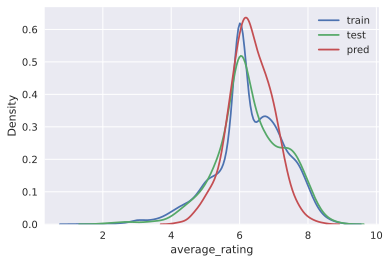

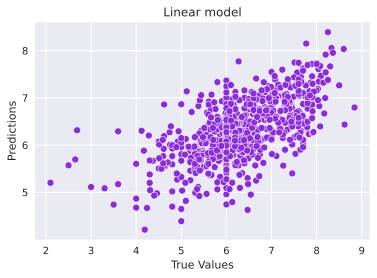

In [68]:
target_distr_linear(y_train, y_test, y_pred)   

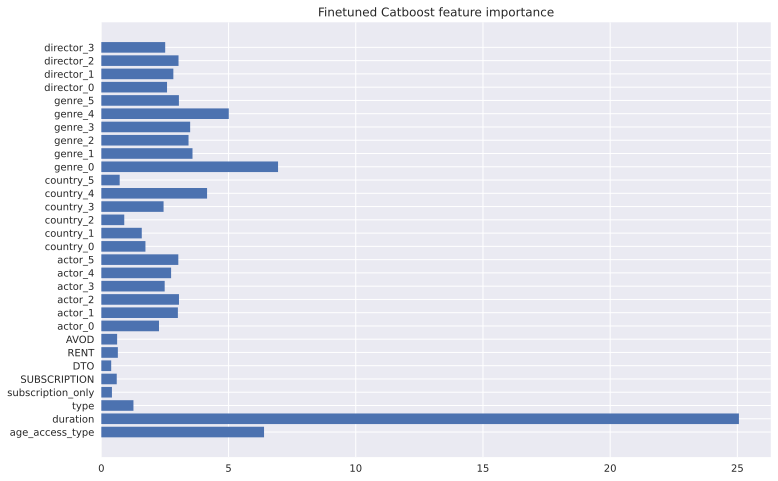

In [70]:
get_feature_imp(best_cat, train_dataset)

In [71]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.5852775419060763
RMSE:  0.7650343403443248
R2:    0.3948732319250431
MAE:   0.585389124176935
MedAE: 0.47692954693259715
------------------------------


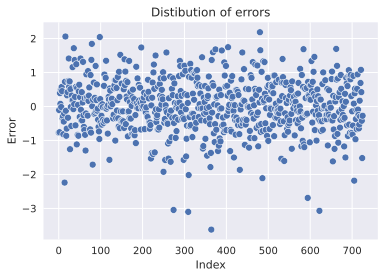

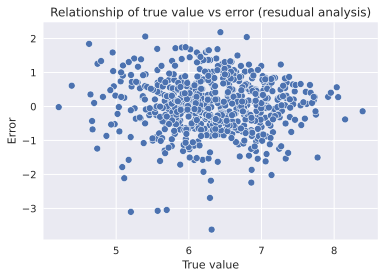

In [72]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)